In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [2]:
with open("headings.csv","r") as file:
    heading = file.readline()
    heading = heading.split(",")
    #print(heading)
dataset = pd.read_csv("dataset.csv",names=heading)
dataset.head(5)

id                                              title  \
0  1809.03478v1  Towards a Fatality-Aware Benchmark of Probabil...   
1  1809.03470v1     ViZDoom Competitions: Playing Doom from Pixels   
2  1809.03449v1  Exploring Machine Reading Comprehension with E...   
3  1809.03428v1  Not Just Privacy: Improving Performance of Pri...   
4  1809.03406v1                              Keep it stupid simple   

                                             authors  \
0  ["Wei Zhan", "Liting Sun", "Yeping Hu", "Jiach...   
1  ["Marek Wydmuch", "Micha\u0142 Kempka", "Wojci...   
2                         ["Chao Wang", "Hui Jiang"]   
3  ["Ji Wang", "Jianguo Zhang", "Weidong Bao", "X...   
4  ["Erik J Peterson", "Necati Alp M\u00fcyesser"...   

                                            abstract  \
0  Autonomous vehicles should be able to generate...   
1  This paper presents the first two editions of ...   
2  To apply general knowledge to machine reading ...   
3  The increasing demand for on-device deep learn...   
4  Deep reinforcement learning can match and exce...   

                                 subjects  class  is_pdf  is_source  \
0                      ["cs.RO", "cs.AI"]  cs.AI     NaN        NaN   
1  ["cs.AI", "cs.CV", "cs.LG", "stat.ML"]  cs.AI     NaN        NaN   
2                               ["cs.AI"]  cs.AI     NaN        NaN   
3  ["cs.LG", "cs.AI", "cs.DC", "stat.ML"]  cs.AI     NaN        NaN   
4                               ["cs.AI"]  cs.AI     NaN        NaN   

              pub_date          update_date  
0  2018-09-10 17:48:58  2018-09-10 17:48:58  
1  2018-09-10 17:41:39  2018-09-10 17:41:39  
2  2018-09-10 16:42:22  2018-09-10 16:42:22  
3  2018-09-10 16:09:58  2018-09-10 16:09:58  
4  2018-09-10 15:43:57  2018-09-10 15:43:57

In [3]:
# extract features from abstract
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams


# use english stop_words
stop_words =  list(stopwords.words('english'))

# make a function to split words and choose only alphabetic and words that are not in stop words list
def alphabetic_only(x_string):
    tokens = word_tokenize(x_string.lower())
    #bigrams = ngrams(token,2)
    # remove all tokens that are not alphabetic
    words = " ".join([word for word in tokens if word.isalpha() and word not in stop_words and len(word)>3])
    return words

def alphabetic_only_l(x_string):
    tokens = word_tokenize(x_string.lower())
    # remove all tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha() and word not in stop_words and len(word)>3]
    return words

In [4]:
title_clean = dataset.title.apply(lambda my_str: alphabetic_only(my_str))

In [5]:
title_clean.values

array(['towards benchmark probabilistic reaction prediction highly interactive driving scenarios',
       'vizdoom competitions playing doom pixels',
       'exploring machine reading comprehension explicit knowledge', ...,
       'gaussian process latent force models learning stochastic control physical systems',
       'commutativity commutative pairs differential equations',
       'stability analysis fractional differential equations unknown parameters'],
      dtype=object)

In [6]:
# extract only noun
import nltk

# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenized = nltk.word_tokenize(dataset.iloc[0].abstract.lower())
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

#nouns

In [7]:
def noun_only_sentence(x_string):
    string_list = x_string.lower().split(".")
    noun_sentence = []
    for my_str in string_list:
        #print(my_str)
        tokens = word_tokenize(my_str)
        #bigrams = ngrams(token,2)
        # remove all tokens that are not alphabetic
        is_noun = lambda pos: pos[:2] == 'NN'
        # do the nlp stuff
        nouns = [word for (word, pos) in nltk.pos_tag(tokens) if is_noun(pos)] 
        noun_sentence.append(nouns)
    return noun_sentence

In [8]:
# save abstract noun since it takes a long time to process
with open("abstract_noun.pickle","rb") as file:
    abstract_noun = pickle.load(file)

In [9]:
abstract_noun_list = []
abstract_noun_d = {}
i = 0
for abstract in abstract_noun:
    test = []
    for x in abstract:
        test.append(" ".join(x))
    abstract_noun_list.append(" ".join(test))
    abstract_noun_d[i] = test
    i+=1

In [293]:
label_class = dataset["class"].unique()

In [11]:
label_class

array(['cs.AI', 'cs.AR', 'cs.CC', 'cs.CE', 'cs.CG', 'cs.CL', 'cs.CR',
       'cs.CV', 'cs.CY', 'cs.DB', 'cs.DC', 'cs.DL', 'cs.DM', 'cs.DS',
       'cs.ET', 'cs.FL', 'cs.GL', 'cs.GR', 'cs.GT', 'cs.HC', 'cs.IR',
       'cs.IT', 'cs.LG', 'cs.LO', 'cs.MA', 'cs.MM', 'cs.MS', 'cs.NA',
       'cs.NE', 'cs.NI', 'cs.OH', 'cs.OS', 'cs.PF', 'cs.PL', 'cs.RO',
       'cs.SC', 'cs.SD', 'cs.SE', 'cs.SI', 'cs.SY'], dtype=object)

In [12]:
#?Tokenizer
# select abstract noun from observation list
import json
def labeling_subjects(subjects):
    subs = json.loads(subjects)
    output = np.zeros(len(label_class),dtype=int)
    for sub in [np.argwhere(label_class==sub) for sub in subs]:
        if len(sub)>0:
            output[sub] = 1
    return output

In [13]:
label_subjects = dataset.subjects.apply(lambda x: labeling_subjects(x)).values

In [14]:
import json
subjects_graphs = {}
for i,x in enumerate(dataset.subjects.values):
    subjects = json.loads(x)
    for subjectx in subjects:
        for subjecty in subjects:
            if subjectx not in label_class:
                continue
            if subjecty not in label_class:
                continue
            if subjectx!=subjecty:
                if subjectx not in subjects_graphs:
                    subjects_graphs[subjectx] = {}
                if subjecty not in subjects_graphs[subjectx]:
                    subjects_graphs[subjectx][subjecty] = {"count":0,"doc":[]}
                subjects_graphs[subjectx][subjecty]["count"]+=1
                subjects_graphs[subjectx][subjecty]["doc"].append(i)
    #break

In [15]:
list_papers = []
list_cat = ["cs.AI","cs.CV","cs.CY","cs.DB","cs.DL"]
for cat in list_cat:
    for key,x in subjects_graphs[cat].items():
        list_papers.extend(x["doc"])
list_papers = list(set(list_papers))

In [32]:
#list_papers
abstract_noun_d[1]

['paper editions doom ai competition',
 'challenge bots deathmatch shooter fps game doom',
 'bots decisions information i',
 'e',
 'screen buffer',
 'bots surroundings navigate opponents time',
 'aspects aspect game competition platform state art reinforcement learning algorithms',
 'paper rules solutions results statistics insight agents behaviors',
 'agents detail',
 'results competition lead conclusion learning doom bots humans game',
 'paper vizdoom environment platform research reinforcement learning perspective game doom',
 '']

In [34]:
len(abstract_noun_d)

37359

In [40]:
#title aware contents
#from textblob import TextBlob

abstract_title_set = []
j = 0
for abs_ind, title in enumerate(title_clean.values):
    j+=1
    title = list(set(title.split(" ")))
    #print("title",title)
    #print(abstract)
    #abstract_list = abstract.split(".")
    #print(abstract)
    abstract_list = abstract_noun_d[abs_ind]
    #print(abstract_list)
    # look at attention words in abstract
    abs_ok = []
    for t in title:
        for i,x in enumerate(abstract_list):
            if x.find(t)>=0:
                abs_ok.append(i)
    abs_ok = list(set(abs_ok))
    #print(np.array(abstract_list)[abs_ok])
    abs_noun_phrases = []
    abs_all = []
    for x in np.array(abstract_list)[abs_ok]:
        #blob = TextBlob(x)
        #print(blob.noun_phrases)
        #abs_noun_phrases.append(blob.noun_phrases)
        abs_all.append(x)
    
    abstract_title_set.append((title,abs_all,abs_noun_phrases))
    #if j > 3:
    #    break

In [43]:
abstract_title_set[1]

(['doom', 'playing', 'vizdoom', 'pixels', 'competitions'],
 ['paper editions doom ai competition',
  'challenge bots deathmatch shooter fps game doom',
  'paper vizdoom environment platform research reinforcement learning perspective game doom',
  'results competition lead conclusion learning doom bots humans game'],
 [])

In [50]:
testx = []
testxl = []
for x,z,_ in abstract_title_set:
    testx.append(". ".join(z))  

In [51]:
testx

['vehicles predictions behavior road users. predictions scenarios action future vehicles. framework problem formulation representation simplification evaluation prediction methods models pgm networks nn reinforcement learning irl. paper reaction prediction problem relationship reaction situation prediction problems. reasons intention motion indicator scenarios. order fatality consequences predictions planning brier score criticality pairs interacting entities. conservatism brier score consequences predictions. methods pgm nn irl reaction predictions scenario highway ramp. results baseline metrics mini benchmark',
 'paper editions doom ai competition. challenge bots deathmatch shooter fps game doom. paper vizdoom environment platform research reinforcement learning perspective game doom. results competition lead conclusion learning doom bots humans game',
 'knowledge machine comprehension mrc mrc approach data enrichment method model knowledge reader kar. kar extraction results data enr

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2)
tf = tf_vectorizer.fit_transform(testx)
tf_feature_names = tf_vectorizer.get_feature_names()

In [107]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(testx)

Using TensorFlow backend.


In [108]:
len(tokenizer.word_index)

39980

In [55]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
import random

random.seed(1984)

# set number of topics
# breakdown into two times of the classes
num_topics = 40

lda = LatentDirichletAllocation(n_topics=num_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [56]:
def display_topics(model, feature_names, no_top_words):
    topic_result = {}
    for topic_idx, topic in enumerate(model.components_):
        #print("Topic %d:" % (topic_idx))
        topic_result["Topic %d" % (topic_idx)] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        #print(" ".join([feature_names[i]
        #                for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topic_result

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
topic_df = pd.DataFrame(display_topics(lda, tf_feature_names, no_top_words))
#topic_df.to_csv("topic_lda.csv")

In [58]:
topic_df.to_csv("topic_lda_poster.csv")
topic_df

Topic 0     Topic 1       Topic 10     Topic 11       Topic 12  \
0          test  allocation     blockchain       matrix      algorithm   
1           law  regression   transactions  constraints        problem   
2         lines      market   augmentation     matrices     algorithms   
3       streams    mobility  summarization      product       problems   
4        report      demand      infection       tensor           time   
5        stream       price        economy   constraint   optimization   
6  intelligence  scheduling        bitcoin         rank          paper   
7     streaming     utility         indoor      algebra     complexity   
8  dependencies   contracts        rewards       coding         number   
9      machines      budget            p2p   operations  approximation   

    Topic 13    Topic 14       Topic 15     Topic 16     Topic 17    ...      \
0  detection     signals      functions      systems        group    ...       
1   security    feedback       function       system       groups    ...       
2    attacks         log         domain        paper    embedding    ...       
3     papers        term         target     approach        relay    ...       
4     attack   frequency         source      process  beamforming    ...       
5    packets  statistics           loss     analysis          lie    ...       
6      files    document        domains  information  descriptors    ...       
7     system   documents       transfer    framework     cascades    ...       
8     secure        norm     adaptation      results      tactile    ...       
9   workshop    stations  distributions      control  mathematica    ...       

          Topic 36       Topic 37      Topic 38   Topic 39    Topic 4  \
0            users        patches        method       time    service   
1             user          patch       methods   sequence       rate   
2           speech         angles        points     series    channel   
3  characteristics         minima         point      state   services   
4          queries     harvesting         value     states    quality   
5   recommendation            gcd         paper  sequences     access   
6            items       rigidity         phase       line      paths   
7           system           arms         order      parts   capacity   
8            sound     forwarding      distance  transform     scheme   
9      preferences  interruptions  distribution       file  resources   

       Topic 5    Topic 6         Topic 7      Topic 8    Topic 9  
0        robot    control         cluster      network    content  
1       robots   dynamics        profiles     networks       text  
2      objects  equations          outage        paper      topic  
3    behaviors       flow          intent       method     topics  
4     coverage    traffic         fortran  performance   messages  
5    formation  evolution  rehabilitation        model   contents  
6   navigation      model       attractor         data  coherence  
7   perception      block   organisations      results  agreement  
8  environment    density        citizens     approach         se  
9    obstacles   equation            eyes        image     scores  

[10 rows x 40 columns]

In [59]:
output_cluster = lda.transform(tf)

In [60]:
dataset["cluster"] = output_cluster.argmax(axis=1)

In [111]:
#pd.DataFrame({"a":{"2":1,}})
digest = {}
for x in dataset.groupby(["class","cluster"],as_index=False).count().iloc[:,[0,1,2]].values:
    if x[0] not in digest.keys():
        digest[x[0]] = {}
    if x[1] not in digest[x[0]].keys():
        digest[x[0]][x[1]] = x[2]
        
digest_pd = pd.DataFrame(digest).transpose()
digest_pd[pd.isnull(digest_pd)]=0

In [112]:
digest_pd.head()

0    1    2    3     4     5     6    7      8    9   ...     30  \
cs.AI  22.0  4.0  1.0  1.0   7.0   3.0   4.0  0.0  267.0  2.0  ...   25.0   
cs.AR  15.0  3.0  0.0  0.0  25.0   1.0   3.0  0.0   46.0  0.0  ...   10.0   
cs.CC  41.0  2.0  3.0  6.0   3.0   2.0   1.0  1.0   24.0  0.0  ...    3.0   
cs.CE  15.0  6.0  0.0  2.0   3.0  16.0  67.0  2.0  187.0  2.0  ...   27.0   
cs.CG  33.0  0.0  0.0  4.0   3.0   4.0   6.0  1.0   76.0  0.0  ...    9.0   

        31     32    33   34     35   36   37     38    39  
cs.AI  0.0   16.0   9.0  0.0    7.0  8.0  0.0   36.0   5.0  
cs.AR  8.0  714.0  29.0  0.0    1.0  1.0  0.0    1.0   2.0  
cs.CC  2.0   19.0   1.0  3.0   58.0  0.0  1.0   24.0  12.0  
cs.CE  4.0   82.0  23.0  3.0    3.0  1.0  4.0  137.0  11.0  
cs.CG  2.0    8.0   7.0  7.0  119.0  1.0  1.0  165.0  19.0  

[5 rows x 40 columns]

In [113]:
"""
t = digest_pd.values 
#print(t.shape)
for x in range(t.shape[0]):
    t[x,:] = t[x,:]/np.sum(t[x,:])
#for x in 
"""

'\nt = digest_pd.values \n#print(t.shape)\nfor x in range(t.shape[0]):\n    t[x,:] = t[x,:]/np.sum(t[x,:])\n#for x in \n'

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Text(0.5, 250.113320728006, 'Topics')

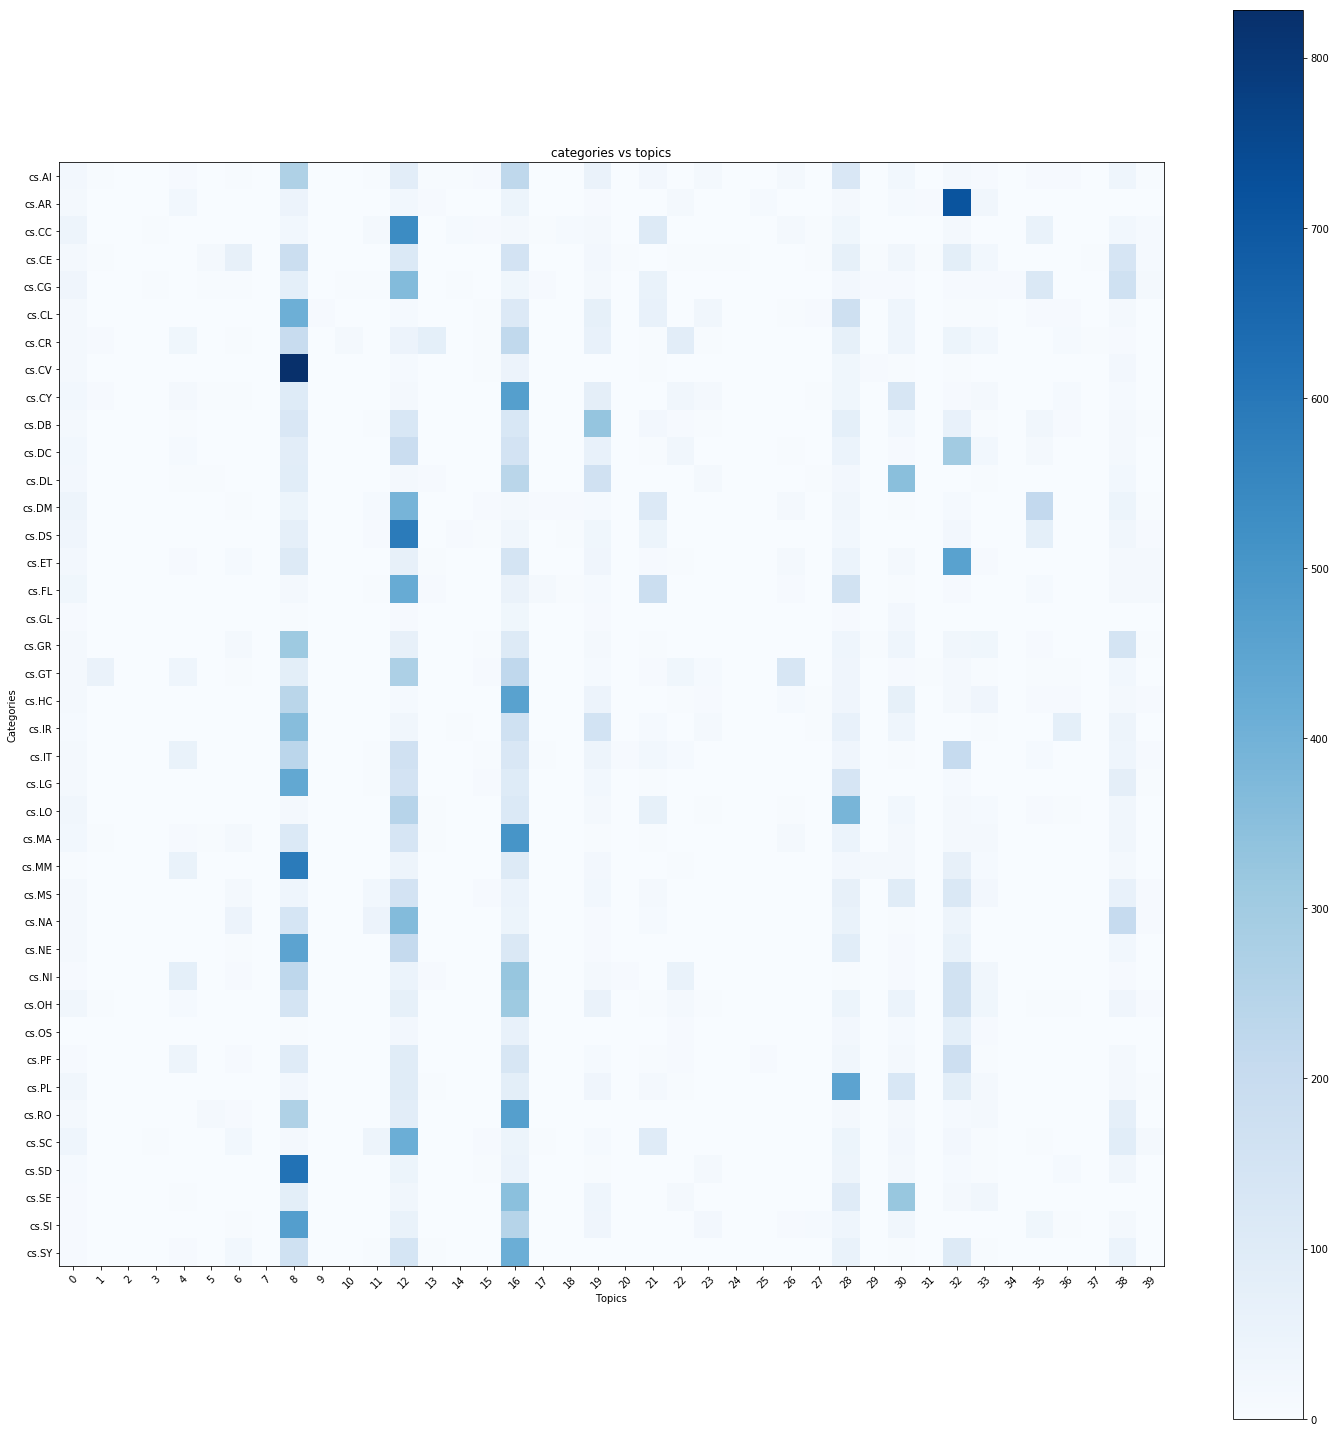

In [114]:
%matplotlib inline
import itertools

cmap = plt.cm.Blues
cm = digest_pd.as_matrix()
title="categories vs topics"

plt.figure(figsize=(20,20))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks_y = np.arange(len(digest_pd.index.values))
tick_marks_x = np.arange(len(digest_pd.columns.values))
plt.xticks(tick_marks_x, digest_pd.columns.values, rotation=45)
plt.yticks(tick_marks_y, digest_pd.index.values)

fmt = '.2f'
#if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "",
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Categories')
plt.xlabel('Topics')

In [103]:
from sklearn.preprocessing import normalize

t = digest_pd.values 
#print(t.shape)
for x in range(t.shape[1]):
    t[:,x] = t[:,x]/np.sum(t[:,x])
#for x in 

Text(0.5, 250.113320728006, 'Topics')

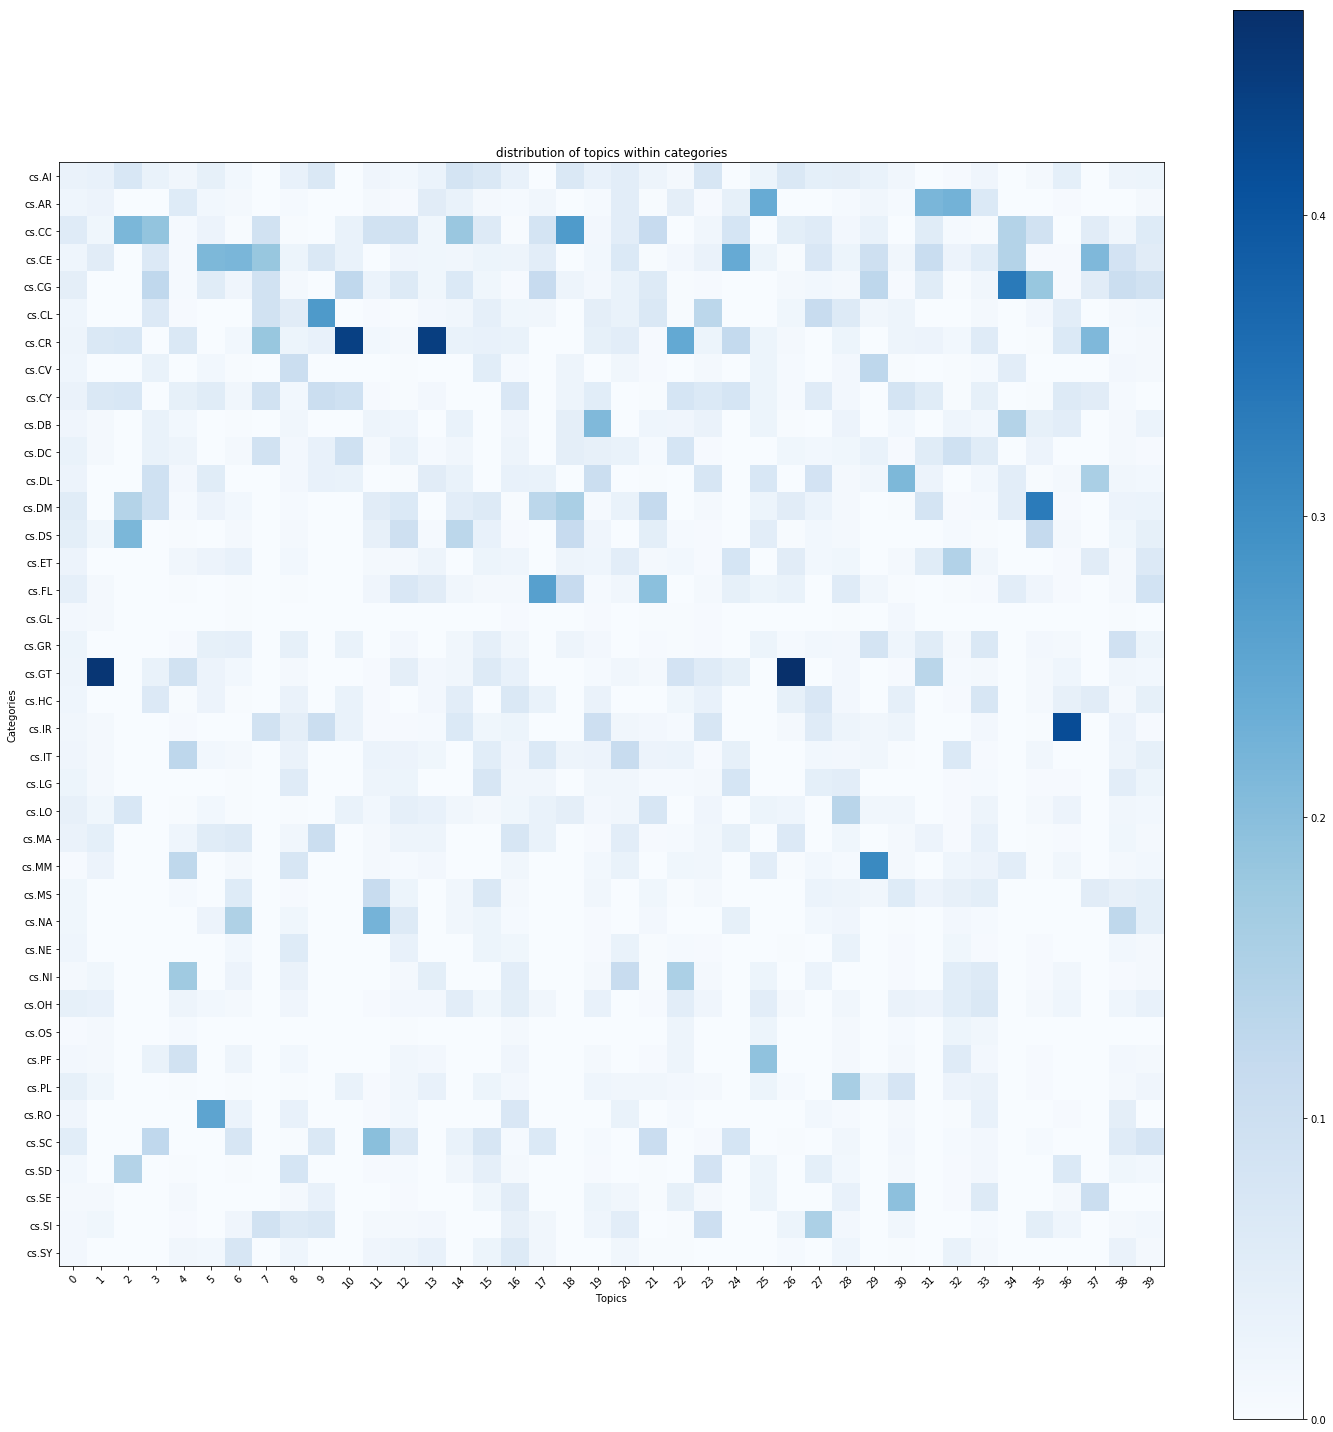

In [105]:
%matplotlib inline
import itertools

cmap = plt.cm.Blues
cm = t
title="distribution of topics within categories"

plt.figure(figsize=(20,20))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks_y = np.arange(len(digest_pd.index.values))
tick_marks_x = np.arange(len(digest_pd.columns.values))
plt.xticks(tick_marks_x, digest_pd.columns.values, rotation=45)
plt.yticks(tick_marks_y, digest_pd.index.values)

fmt = '.2f'
#if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "",
             horizontalalignment="center",
             color="white" if t[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Categories')
plt.xlabel('Topics')

In [115]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
from keras.utils.data_utils import get_file
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(np.array(abstract_noun_list))
#print(len(tokenizer.word_index))
corpus = {}
for key in abstract_noun_d.keys():
    item = abstract_noun_d[key]
    #print(key,item)
    corpus[key] = tokenizer.texts_to_sequences(item)
    #gasgd
#corpus = [tokenizer.texts_to_sequences(" ".join(x)) for x in abstract_noun]
#nb_samples = sum(len(s) for s in corpus)
V = len(tokenizer.word_index) + 1

In [116]:
V

48525

In [118]:
dim = 400
window_size = 2

In [120]:
from keras.models import Sequential,Model
from keras.layers import Dense, Embedding, Reshape,Input
from IPython.display import SVG
from keras.utils import np_utils
from keras.utils.data_utils import get_file

skipgram = Input(shape=(1,),name="input")
embedding = Embedding(input_dim=V,output_dim=dim, embeddings_initializer='glorot_uniform', input_length=1,name="embedding")(skipgram)
#skipgram.add(Embedding(input_dim=V, output_dim=dim, init='glorot_uniform', input_length=1))
reshape = Reshape((dim, ),name="reshape")(embedding)
skip_out = Dense(activation='softmax',name="skip_out",units=V)(reshape)
#skipgram.add(Reshape((dim, )))
#skipgram.add(Dense(input_dim=dim, output_dim=V, activation='softmax'))
#class_out = Dense(output_dim=40,activation='softmax',name='categories')(reshape)

skipgram_model = Model(inputs=[skipgram], outputs=[skip_out])

In [121]:
skipgram_model.compile(loss={"skip_out":"categorical_crossentropy"},optimizer="adadelta")
skipgram_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 1)                 0         
_________________________________________________________________
embedding (Embedding)        (None, 1, 400)            19410000  
_________________________________________________________________
reshape (Reshape)            (None, 400)               0         
_________________________________________________________________
skip_out (Dense)             (None, 48525)             19458525  
Total params: 38,868,525
Trainable params: 38,868,525
Non-trainable params: 0
_________________________________________________________________


In [122]:
skipgram_model.load_weights("skipgram-12000")

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
cvector = CountVectorizer()
bow = cvector.fit_transform(abstract_noun_list)

In [125]:
from keras.layers import Input
from keras.models import Model
import keras


model = Sequential()
# input layer
model.add(keras.layers.Dense(5000,input_shape=(bow.shape[1],),activation='relu'))

# hidden layer
model.add(keras.layers.Dense(1000,activation='relu'))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))

# output layer
model.add(keras.layers.Dense(len(label_class),activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [126]:
model.load_weights("cbow.h5")

In [127]:
with open("skipgram-12000.txt","w") as file:
    file.write('{} {}\n'.format(V-1, dim))
    vectors = skipgram_model.get_weights()[0]
    for word, i in tokenizer.word_index.items():
        str_vec = ' '.join(map(str, list(vectors[i, :])))
        file.write('{} {}\n'.format(word, str_vec))

In [184]:
import gensim
w2v = gensim.models.KeyedVectors.load_word2vec_format('./cbow_vector.txt', binary=False)
#w2v.most_similar(positive=['csai','cslg'],topn=100)

In [165]:
w2v.most_similar(positive=['game'],topn=10)

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('environments', 0.7961483001708984),
 ('players', 0.758110761642456),
 ('challenges', 0.7270612716674805),
 ('consequences', 0.7123011350631714),
 ('concept', 0.7105653882026672),
 ('plan', 0.7100780010223389),
 ('world', 0.7066256403923035),
 ('synthesis', 0.7046980857849121),
 ('games', 0.7037385702133179),
 ('risks', 0.7011364698410034)]

In [301]:
# get top 50 lda topics
num_words=15
topic_df2 = pd.DataFrame(display_topics(lda, tf_feature_names, num_words))

In [302]:
topic_words = np.array(list(set(topic_df2.values.reshape(num_words*40).tolist())))

In [303]:
feature_names = cvector.get_feature_names()

In [304]:
topic_feature = [feature_names.index(x) for x in topic_words]

In [305]:
input_vector=np.zeros((len(topic_feature),len(feature_names)),dtype=np.bool)

In [306]:
for i,x in enumerate(topic_feature):
    input_vector[i,x] = True

In [307]:
my_prediction = model.predict(input_vector)

In [308]:
my_prediction

array([[0.00336366, 0.00069616, 0.01923301, ..., 0.00373161, 0.00078043,
        0.00286472],
       [0.0003826 , 0.00020125, 0.00409655, ..., 0.00025736, 0.00043686,
        0.0003791 ],
       [0.0003004 , 0.00067816, 0.00209966, ..., 0.00484353, 0.00039074,
        0.00061163],
       ...,
       [0.00232454, 0.00067264, 0.00179459, ..., 0.00078048, 0.0005364 ,
        0.00127926],
       [0.00020208, 0.00119114, 0.00201686, ..., 0.00034341, 0.00044121,
        0.00033333],
       [0.00010786, 0.0002586 , 0.0000616 , ..., 0.00006474, 0.0132694 ,
        0.00303202]], dtype=float32)

In [320]:
topic_cat = np.argsort(my_prediction,axis=1)[:,::-1][:,0]
topic_prob = np.sort(my_prediction,axis=1)[:,::-1][:,0]
pd_words = pd.DataFrame(list(zip(topic_words,topic_feature,topic_cat,topic_prob)),columns=["words","feat","cat","prob"])

In [310]:
vector_class = []
v_label = []
for x in range(len(label_class)):
    x_words = pd_words[pd_words.cat==x].sort_values("prob")
    #print(x_words.words)
    vec = []
    try:
        for y in x_words.words.values:
            #print(y)
            vec.append(w2v.get_vector(y))
    except:
        None
        #print(np.array(vec))
        #print(np.mean(np.array(vec),axis=0))
    if len(vec)>0:
        vector_class.append(np.mean(np.array(vec),axis=0))
        v_label.append(label_class[x])


In [311]:
len(v_label)

39

In [312]:
test_vector = []
test_words = []
for x in topic_words:
    try:
        test_vector.append(w2v.get_vector(x))
        test_words.append(x)
    except:
        """
        """

In [313]:
test_vector.extend(vector_class)

In [314]:
test_words.extend(v_label)

In [315]:
len(test_vector)

584

In [317]:
?plt.annotate

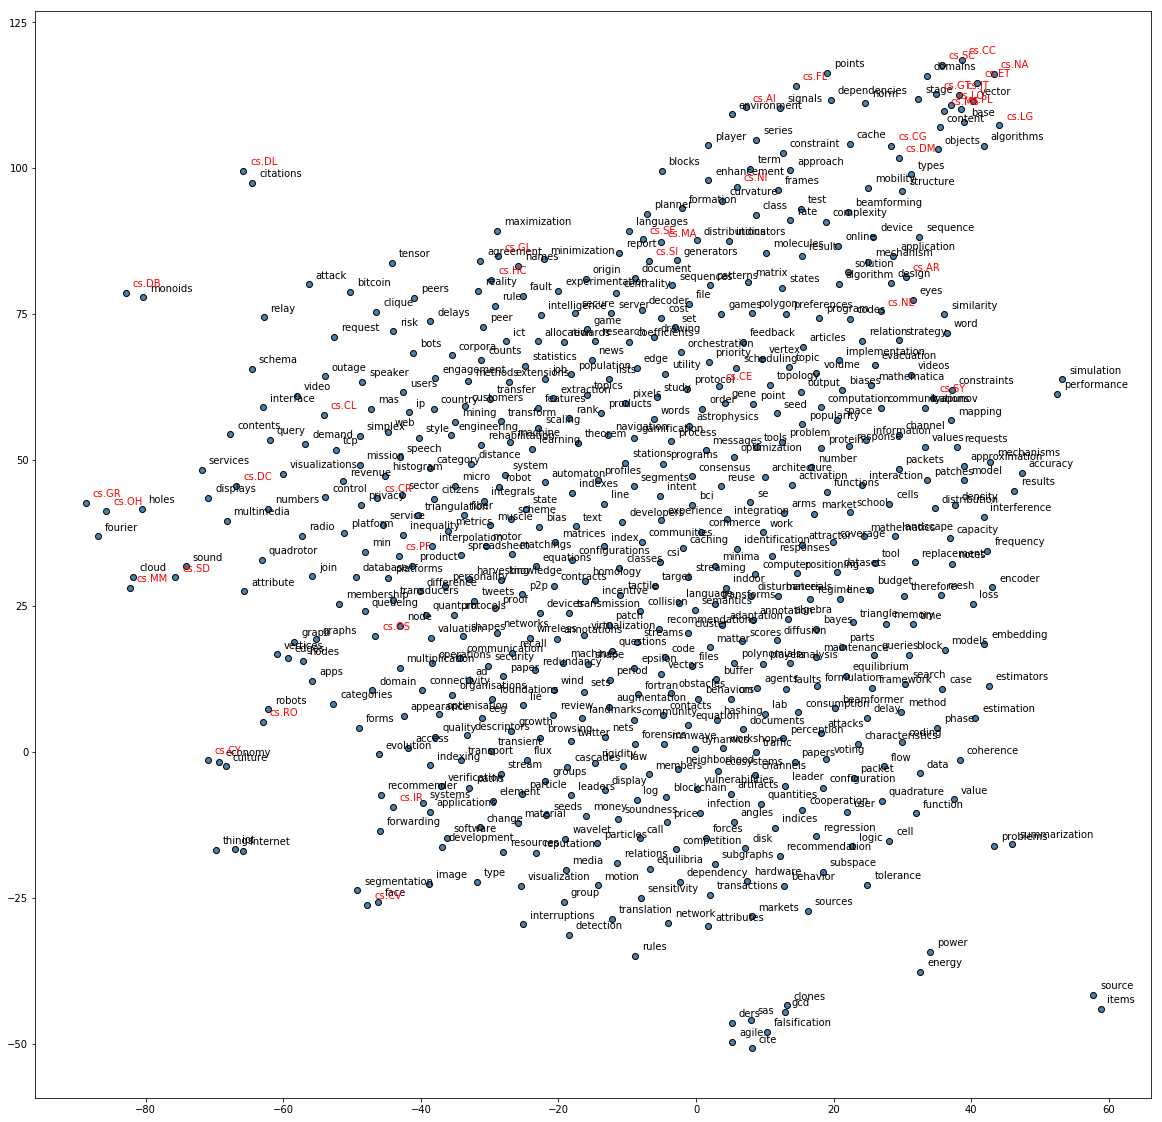

In [319]:
from sklearn.manifold import TSNE

#words = sum([[k] + v for k, v in similar_words.items()], [])
#words_ids = [word2id[w] for w in words]
#word_vectors = np.array([weights[idx] for idx in words_ids])
#print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(test_vector)
labels = test_words

plt.figure(figsize=(20, 20))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    if label not in (label_class):        
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')
    else:
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), color="red", textcoords='offset points')

In [136]:
print(label_class)
print(["cs.AI","cs.CV","cs.CY","cs.DB","cs.DL"])
print([np.argwhere(label_class==x)[0] for x in ["cs.AI","cs.CV","cs.CY","cs.DB","cs.DL"]])
np.argsort(category_embedding,axis=0)[::-1,:][:5,:]

['cs.AI' 'cs.AR' 'cs.CC' 'cs.CE' 'cs.CG' 'cs.CL' 'cs.CR' 'cs.CV' 'cs.CY'
 'cs.DB' 'cs.DC' 'cs.DL' 'cs.DM' 'cs.DS' 'cs.ET' 'cs.FL' 'cs.GL' 'cs.GR'
 'cs.GT' 'cs.HC' 'cs.IR' 'cs.IT' 'cs.LG' 'cs.LO' 'cs.MA' 'cs.MM' 'cs.MS'
 'cs.NA' 'cs.NE' 'cs.NI' 'cs.OH' 'cs.OS' 'cs.PF' 'cs.PL' 'cs.RO' 'cs.SC'
 'cs.SD' 'cs.SE' 'cs.SI' 'cs.SY']
['cs.AI', 'cs.CV', 'cs.CY', 'cs.DB', 'cs.DL']
[array([0]), array([7]), array([8]), array([9]), array([11])]


array([[   45,    19,    19,    39,    96,    60,   105,   131,   335,
          263,     1,   154,    19,    23,    19,    19,    19,     6,
           19,    19,   263,    19,  4510,    19,    96,    14,    19,
           39,    19,    19,    19,    23,    19,    19,    96,    19,
           19,    19,    29,    19],
       [   96,    39,    39,    30,    84,    39,   121,   273,   563,
          256,    19,   256,    39,    19,    39,    23,    14,     9,
           39,    23,   404,    39,  6383,    23,   105,    37,    23,
           19,    14,    23,    39,    19,    23,    23,   107,    23,
           14,    23,   107,    39],
       [  105,    14,    14,    19,    35,    23,    96,   118,  9781,
          195,    23,   335,    23,    39,    14,    39,    39,     2,
           23,    39,   402,    14, 11404,    39,   107,    19,    39,
           23,    39,    39,    23,    39,    14,    14,    57,    39,
           23,    14,   116,    23],
       [  107,    23,    23,    96,  

In [139]:
[token_label[x][0] for x in np.argsort(category_embedding,axis=0)[::-1,:][:20,:][:,11]]

['citation',
 'attacks',
 'diversity',
 'collection',
 'art',
 'layer',
 'scheme',
 'categories',
 'type',
 'value',
 'loss',
 'recommender',
 'embeddings',
 'solutions',
 'classifier',
 'manner',
 'paths',
 'twitter',
 'activity',
 'signal']

In [140]:
from keras.models import Sequential,Model
from keras.layers import Dense, Embedding, Reshape,Input
from IPython.display import SVG
from keras.utils import np_utils
from keras.utils.data_utils import get_file

skipgram_c = Input(shape=(1,),name="input")
embedding_c = Embedding(input_dim=V,output_dim=dim, init='glorot_uniform', input_length=1,name="embedding")(skipgram_c)
#skipgram.add(Embedding(input_dim=V, output_dim=dim, init='glorot_uniform', input_length=1))
reshape_c = Reshape((dim, ),name="reshape")(embedding_c)
class_out_c = Dense(output_dim=40,activation='softmax',name='categories')(reshape_c)

skipgram_category = Model(inputs=[skipgram_c], outputs=[class_out_c])

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(input_length=1, name="embedding", output_dim=100, embeddings_initializer="glorot_uniform", input_dim=12009)`
/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(name="categories", units=40, activation="softmax")`


In [141]:
skipgram_category.compile(loss="categorical_crossentropy",optimizer="adam")

In [142]:
skipgram_category.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 1)                 0         
_________________________________________________________________
embedding (Embedding)        (None, 1, 100)            1200900   
_________________________________________________________________
reshape (Reshape)            (None, 100)               0         
_________________________________________________________________
categories (Dense)           (None, 40)                4040      
Total params: 1,204,940
Trainable params: 1,204,940
Non-trainable params: 0
_________________________________________________________________


In [147]:
def generate_skipgram_class(aha,corpus, window_size, V,label_subjects):
    maxlen = window_size*2
    for z,ah in enumerate(aha):
        print(z)
        for j,words in enumerate(corpus[ah]):
            L = len(words)
            for index, word in enumerate(words):
                s = index-window_size
                e = index+window_size+1

                in_words = []
                labels = []
                label_class = []
                in_words.append([word])
                label_class.append(label_subjects[ah])

                #print(in_words)
                #print(labels)
                x = np.array(in_words,dtype=np.int32)
                y2 = np.array(label_class)
                yield (x, y2)

In [158]:
for ite in range(1):
    loss = 0.
    for x, y_class in generate_skipgram_class(list_papers,corpus, window_size, V,label_subjects):
        #print(x,y_class)
        #break
        #print(x)
        #print(y)
        #print(y_class)
        #loss += 
        skipgram_category.train_on_batch(x, y_class)

    print(ite, loss)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


KeyboardInterrupt: 

In [159]:
skipgram_category.predict(np.array([tokenizer.word_index["machine"]]))

array([[4.94530737e-01, 4.81335360e-10, 7.33277161e-10, 4.47051396e-10,
        4.74409234e-10, 7.95788713e-10, 8.27492463e-10, 3.77017036e-02,
        2.28411928e-02, 2.20218266e-04, 1.51890274e-02, 7.20454205e-04,
        3.82540916e-10, 1.49302641e-05, 5.91167892e-10, 6.75752121e-10,
        4.43529269e-10, 8.29624943e-03, 6.51466427e-03, 1.42929722e-02,
        3.79476976e-03, 2.22815826e-04, 3.24655384e-01, 3.53883843e-05,
        3.63335060e-03, 1.04594156e-02, 1.67912876e-05, 5.02743023e-05,
        1.49541423e-02, 7.69729912e-03, 3.77741755e-10, 4.67801298e-10,
        4.98378616e-10, 8.43924936e-05, 1.21948365e-02, 6.47067899e-10,
        5.34215150e-03, 1.61867100e-03, 1.49177769e-02, 3.91465306e-07]],
      dtype=float32)

In [164]:
np.argsort(skipgram_category.predict(np.array([tokenizer.word_index["learning"]])))[:,::-1]

array([[ 0, 22,  7, 28, 17,  8, 34, 25, 19, 10, 38, 20, 18, 29, 24, 36,
        37, 11, 21,  9, 27, 33, 23, 13, 26, 39,  5,  2,  6, 14, 35,  1,
         4, 15, 32, 30,  3, 31, 12, 16]])

In [166]:
#skipgram_category.save("skipgram-cat01.h5")

'cs.NE'

In [173]:
category_embedding = skipgram_category.predict(np.array(range(V)))

In [175]:
category_embedding.shape

(12009, 40)

In [187]:
skipgram_category.get_weights()[1].shape

(100, 40)

In [182]:
print(label_class)
print(["cs.AI","cs.CV","cs.CY","cs.DB","cs.DL"])
print([np.argwhere(label_class==x)[0] for x in ["cs.AI","cs.CV","cs.CY","cs.DB","cs.DL"]])
np.sort(category_embedding,axis=0)[::-1,:][:5,:]

['cs.AI' 'cs.AR' 'cs.CC' 'cs.CE' 'cs.CG' 'cs.CL' 'cs.CR' 'cs.CV' 'cs.CY'
 'cs.DB' 'cs.DC' 'cs.DL' 'cs.DM' 'cs.DS' 'cs.ET' 'cs.FL' 'cs.GL' 'cs.GR'
 'cs.GT' 'cs.HC' 'cs.IR' 'cs.IT' 'cs.LG' 'cs.LO' 'cs.MA' 'cs.MM' 'cs.MS'
 'cs.NA' 'cs.NE' 'cs.NI' 'cs.OH' 'cs.OS' 'cs.PF' 'cs.PL' 'cs.RO' 'cs.SC'
 'cs.SD' 'cs.SE' 'cs.SI' 'cs.SY']
['cs.AI', 'cs.CV', 'cs.CY', 'cs.DB', 'cs.DL']
[array([0]), array([7]), array([8]), array([9]), array([11])]


array([[9.52947259e-01, 5.51799362e-09, 1.57281583e-08, 1.03939426e-08,
        1.64155765e-08, 1.52398112e-08, 8.13712653e-09, 5.91754198e-01,
        3.86782706e-01, 2.60038916e-02, 5.44345081e-01, 4.69786525e-02,
        1.07660867e-08, 3.76951706e-04, 6.39787645e-09, 5.22558130e-09,
        1.24881883e-08, 5.28323352e-01, 1.03683405e-01, 2.52636135e-01,
        4.36526276e-02, 2.95771509e-02, 5.40493250e-01, 8.30869598e-04,
        8.37614611e-02, 3.00785273e-01, 9.29283997e-05, 6.64670393e-02,
        1.11802056e-01, 1.66040167e-01, 1.20020101e-08, 9.67740377e-09,
        5.39979350e-09, 2.30151834e-03, 2.49109879e-01, 1.32820803e-08,
        6.31333351e-01, 4.30751055e-01, 2.06602931e-01, 1.51342274e-05],
       [9.10502434e-01, 4.15553947e-09, 1.53218647e-08, 9.04224340e-09,
        1.22322916e-08, 1.04831290e-08, 5.53427348e-09, 5.84093690e-01,
        3.65037471e-01, 1.38163324e-02, 2.95903951e-01, 3.42091732e-02,
        9.15688148e-09, 2.59656430e-04, 6.14533224e-09, 4.94024

In [180]:
[token_label[x][0] for x in np.argsort(category_embedding,axis=0)[::-1,:][:20,:][:,7]]

['factor',
 'challenge',
 'quality',
 'rate',
 'comparison',
 'theory',
 'technology',
 'semantics',
 'conditions',
 'average',
 'collaboration',
 'matrix',
 'view',
 'understanding',
 'strategies',
 'session',
 'home',
 'framework',
 'millions',
 'initiative']

In [183]:
wordvs = "network"
stack = []
for x in wordvs.split(" "):
    stack.append(w2v.get_vector(x))
k12 = np.stack(stack,axis=0)
k12.mean(axis=0)
np.median(k12,axis=0)
#.stack(w2v.get_vector("analysis"))

array([ 0.37796876,  0.35235018, -0.34399098, -0.2980169 , -0.30408984,
        0.17606984, -0.3194309 ,  0.3606561 ,  0.36268416, -0.34742752,
       -0.1674323 ,  0.36896056,  0.34252328, -0.30508938, -0.34590682,
       -0.3489922 ,  0.15165927, -0.35179037,  0.35113707,  0.30514848,
       -0.34140438,  0.2897122 ,  0.16127905,  0.11865571,  0.35505491,
       -0.32265103, -0.338263  ,  0.32244104,  0.39457276,  0.39268303,
        0.3162973 , -0.2187956 ,  0.40123037,  0.3892822 ,  0.3530359 ,
        0.33576146,  0.35348663, -0.37120038,  0.36243385,  0.11726773,
        0.2776323 ,  0.3926836 ,  0.32532042, -0.35950857,  0.11451275,
       -0.37204787, -0.37480098,  0.38777813,  0.10980447, -0.31363502,
       -0.37605208, -0.41391775,  0.3716418 , -0.32681262,  0.33822012,
       -0.3019136 , -0.36572054, -0.32532796, -0.36008427, -0.29451066,
       -0.35226688,  0.38597298,  0.33755982,  0.31163478,  0.3472522 ,
       -0.28340125, -0.37227163, -0.3274322 , -0.3599462 ,  0.36

In [184]:
#w2v.most_similar(positive=['network'],negative=['convolutional'],topn=10)
#?w2v.most_similar_to_given
#w2v.most_similar_to_given(["network","analysis"])
w2v.similar_by_vector(np.median(k12,axis=0),topn=20)

[('network', 1.0),
 ('networks', 0.9909524917602539),
 ('detection', 0.9739964604377747),
 ('models', 0.9707892537117004),
 ('image', 0.9704773426055908),
 ('classification', 0.9699640274047852),
 ('inference', 0.9685539603233337),
 ('information', 0.9680296182632446),
 ('embedding', 0.9675806164741516),
 ('using', 0.9671037197113037),
 ('video', 0.9658486247062683),
 ('retrieval', 0.9654072523117065),
 ('multiple', 0.9652595520019531),
 ('online', 0.9650835990905762),
 ('generation', 0.9639086127281189),
 ('training', 0.9638806581497192),
 ('graph', 0.9633584022521973),
 ('search', 0.9627733826637268),
 ('communication', 0.9624412059783936),
 ('efficient', 0.9620755910873413)]

In [50]:
aha = set([1,2,3])
ehe = " ahahah ohohoh"
ehe.find("ah")

1

In [4]:
abstract_clean = dataset.abstract.apply(lambda my_str: alphabetic_only(my_str))

In [5]:
abstract_clean.head()

0    autonomous vehicles able generate accurate pro...
1    paper presents first editions visual doom comp...
2    apply general knowledge machine reading compre...
3    increasing demand deep learning services calls...
4    deep reinforcement learning match exceed human...
Name: abstract, dtype: object

In [575]:
from textblob import TextBlob
txt = dataset.iloc[35].abstract
blob = TextBlob(txt)
print(blob.noun_phrases)
#[u'natural language processing', 'nlp', u'computer science', u'artificial intelligence', u'computational linguistics']


['recent', 'neural models', 'data-to-text generation', 'data-driven end-to-end training', 'encoder-decoder networks', 'generate descriptions', 'critical issue', 'raw data', 'neural data-to-text generation', 'symbolic operations', 'operation-guided attention-based', 'sequence-to-sequence network', 'opatt', 'quantization module', 'operation results', 'utilize information', 'experiments', 'sports datasets']


In [26]:
# extract only noun
import nltk

# function to test if something is a noun
is_noun = lambda pos: pos[:2] == 'NN'
# do the nlp stuff
tokenized = nltk.word_tokenize(dataset.iloc[0].abstract.lower())
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

#nouns

In [46]:
def noun_only_sentence(x_string):
    string_list = x_string.lower().split(".")
    noun_sentence = []
    for my_str in string_list:
        #print(my_str)
        tokens = word_tokenize(my_str)
        #bigrams = ngrams(token,2)
        # remove all tokens that are not alphabetic
        is_noun = lambda pos: pos[:2] == 'NN'
        # do the nlp stuff
        nouns = [word for (word, pos) in nltk.pos_tag(tokens) if is_noun(pos)] 
        noun_sentence.append(nouns)
    return noun_sentence

In [51]:
abstract_noun = dataset.abstract.apply(lambda my_str: noun_only_sentence(my_str))

In [56]:
# save abstract noun since it takes a long time to process
with open("abstract_noun.pickle","wb") as file:
    pickle.dump(abstract_noun,file)

In [82]:
abstract_noun_list = []
for abstract in abstract_noun:
    test = []
    for x in abstract:
        test.append(" ".join(x))
    abstract_noun_list.append(" ".join(test))

In [158]:
len(abstract_noun_list)

37359

In [545]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# decrease to only using 1thousands feature
no_features = 5000
#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features)
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf = tfidf_vectorizer.fit_transform(abstract_noun_list)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features)
#tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2)
tf = tf_vectorizer.fit_transform(abstract_noun_list)
tf_feature_names = tf_vectorizer.get_feature_names()

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [563]:
tfidf_array = np.array(tfidf_feature_names)

In [569]:
#?np.argsort
tfidf_array[np.argsort(tfidf.sum(axis=0))[:,:1000:-1]]

array([['data', 'model', 'algorithm', ..., 'metapaths', 'radiators',
        'typists']], dtype='<U33')

In [92]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

?LatentDirichletAllocation

In [186]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

# set number of topics
# breakdown into two times of the classes
num_topics = 40

lda = LatentDirichletAllocation(n_topics=num_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [190]:
tf_feature_names

['10',
 '16',
 '17',
 '_1',
 '_2',
 '_n',
 '_q',
 'abilities',
 'ability',
 'ablation',
 'above',
 'absence',
 'absolute',
 'absorption',
 'abstract',
 'abstraction',
 'abstractions',
 'abstracts',
 'abundance',
 'abuse',
 'ac',
 'academia',
 'acceleration',
 'accelerator',
 'accelerators',
 'accelerometer',
 'acceptance',
 'access',
 'accesses',
 'accessibility',
 'accident',
 'accidents',
 'accordance',
 'account',
 'accountability',
 'accounting',
 'accounts',
 'accumulation',
 'accuracies',
 'accuracy',
 'accurate',
 'achievement',
 'achievements',
 'achieves',
 'acm',
 'acquisition',
 'act',
 'action',
 'actions',
 'activation',
 'activations',
 'activities',
 'activity',
 'actor',
 'actors',
 'acts',
 'actuation',
 'actuator',
 'actuators',
 'ad',
 'adam',
 'adaptability',
 'adaptation',
 'adaptations',
 'adaptivity',
 'adc',
 'adder',
 'adders',
 'addition',
 'additions',
 'address',
 'addresses',
 'adequacy',
 'adjacency',
 'adjoint',
 'adjustment',
 'adjustments',
 'administra

In [94]:
#with open("lda-poster.pickle","wb") as file:
#    pickle.dump(lda,file)

In [484]:
def display_topics(model, feature_names, no_top_words):
    topic_result = {}
    for topic_idx, topic in enumerate(model.components_):
        #print("Topic %d:" % (topic_idx))
        topic_result["Topic %d" % (topic_idx)] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        #print(" ".join([feature_names[i]
        #                for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topic_result

no_top_words = 50
#display_topics(nmf, tfidf_feature_names, no_top_words)
topic_df = pd.DataFrame(display_topics(lda, tf_feature_names, no_top_words))
#topic_df.to_csv("topic_lda.csv")

In [487]:
topic_df.to_csv("topic_lda_poster.csv")

In [489]:
# build vocabularies from the topics
topic_vocabs = []
for topic in topic_df.columns:
    for word in topic_df.loc[:,topic]:
        topic_vocabs.append(word)

In [494]:
topic_vocabs = list(set(topic_vocabs))

In [495]:
len(topic_vocabs)

1472

In [195]:
tfidf_key = {}
for i,x in  enumerate(tfidf_feature_names):
    tfidf_key[x] = i

In [208]:
# clean up words using filtered features only
abstract_filter = []
for abstract in abstract_noun:
    testx = []
    for x in abstract:
        testy = []
        for y in x:
            #print(y)
            try:
                tfidf_key[y]
                testy.append(y)
            except:
                pass
        if len(testy) > 0:
            testx.append(testy)
    if len(testx)>0:
        abstract_filter.append(testx)
    

In [215]:
abstract_filter_list = []
for abstract in abstract_filter:
    test = []
    for x in abstract:
        test.append(" ".join(x))
    abstract_filter_list.append(" ".join(test))

In [527]:
abstract_filter

[[['vehicles', 'predictions', 'behavior', 'road', 'users'],
  ['predictions', 'scenarios', 'action', 'future', 'vehicles'],
  ['framework',
   'problem',
   'formulation',
   'representation',
   'simplification',
   'evaluation',
   'prediction',
   'methods',
   'models',
   'networks',
   'nn',
   'reinforcement',
   'learning'],
  ['paper',
   'reaction',
   'prediction',
   'problem',
   'relationship',
   'reaction',
   'situation',
   'prediction',
   'problems'],
  ['trajectories',
   'motion',
   'intention',
   'representation',
   'probabilities',
   'trajectory',
   'methods'],
  ['reasons', 'intention', 'motion', 'indicator', 'scenarios'],
  ['score', 'baseline', 'evaluation'],
  ['order',
   'consequences',
   'predictions',
   'planning',
   'score',
   'criticality',
   'pairs',
   'interacting',
   'entities'],
  ['score', 'consequences', 'predictions'],
  ['methods', 'nn', 'reaction', 'predictions', 'scenario', 'highway'],
  ['results', 'baseline', 'metrics', 'mini', 

In [529]:
abstract_filter_topic = []
for abstract in abstract_filter:
    test = []
    for x in abstract:
        testy = []
        for y in x:
            #print(y)
            if y in topic_vocabs:
                testy.append(y)
        #testy = list(set(testy))
        #test.append(" ".join(testy))
        test.append(testy)
    abstract_filter_topic.append(test)

In [599]:
abstract_filter_topic2 = []
for abstract in abstract_filter:
    test = []
    for x in abstract:
        testy = []
        for y in x:
            #print(y)
            if y in topic_vocabs:
                testy.append(y)
                test.append(y)
        #testy = list(set(testy))
        #test.append(" ".join(testy))
        #test.append(testy)
        test = list(set(test))
    abstract_filter_topic2.append(test)

In [601]:
length = 0
for x in abstract_filter_topic2:
    if length < len(x):
        length = len(x)

In [602]:
length

70

In [614]:
abstract_filter_list_topic2 = []
for x in abstract_filter_topic2:
    abstract_filter_list_topic2.append(" ".join(x))

In [616]:
abstract_filter_list_topic2

['behavior evaluation trajectories vehicles prediction methods order representation motion baseline problems method learning action networks trajectory metrics scenarios results problem reaction scenario properties users models entities score reinforcement formulation paper probabilities predictions road analysis relationship indicator planning scores framework',
 'algorithms platform bots solutions decisions challenge information competition buffer time art learning lead behaviors game results research state agents statistics reinforcement paper environment rules',
 'level set prediction variation answer performance match amount method data relations results role approach model score development settings dataset training knowledge machine',
 'privacy system device effectiveness capacity information transformation solution impact applications image robustness mechanism performance demand noise influence inference method perturbation learning networks data budget cloud services results 

In [625]:
len(list(generate_data(tokenizer.texts_to_sequences(abstract_filter_list_topic2[0:1]),35,V)))

abstract 0 length 39 index 0
abstract 0 length 39 index 1
abstract 0 length 39 index 2
abstract 0 length 39 index 3
abstract 0 length 39 index 4
abstract 0 length 39 index 5
abstract 0 length 39 index 6
abstract 0 length 39 index 7
abstract 0 length 39 index 8
abstract 0 length 39 index 9
abstract 0 length 39 index 10
abstract 0 length 39 index 11
abstract 0 length 39 index 12
abstract 0 length 39 index 13
abstract 0 length 39 index 14
abstract 0 length 39 index 15
abstract 0 length 39 index 16
abstract 0 length 39 index 17
abstract 0 length 39 index 18
abstract 0 length 39 index 19
abstract 0 length 39 index 20
abstract 0 length 39 index 21
abstract 0 length 39 index 22
abstract 0 length 39 index 23
abstract 0 length 39 index 24
abstract 0 length 39 index 25
abstract 0 length 39 index 26
abstract 0 length 39 index 27
abstract 0 length 39 index 28
abstract 0 length 39 index 29
abstract 0 length 39 index 30
abstract 0 length 39 index 31
abstract 0 length 39 index 32
abstract 0 length 39

39

In [216]:
abstract_filter_list

['vehicles predictions behavior road users predictions scenarios action future vehicles framework problem formulation representation simplification evaluation prediction methods models networks nn reinforcement learning paper reaction prediction problem relationship reaction situation prediction problems trajectories motion intention representation probabilities trajectory methods reasons intention motion indicator scenarios score baseline evaluation order consequences predictions planning score criticality pairs interacting entities score consequences predictions methods nn reaction predictions scenario highway results baseline metrics mini benchmark analysis properties method baseline scores',
 'paper ai competition challenge bots fps game bots decisions information screen buffer bots surroundings opponents time aspects aspect game competition platform state art reinforcement learning algorithms paper rules solutions results statistics insight agents behaviors agents detail results c

In [256]:
label_class = dataset["class"].unique()
label_class

array(['cs.AI', 'cs.AR', 'cs.CC', 'cs.CE', 'cs.CG', 'cs.CL', 'cs.CR',
       'cs.CV', 'cs.CY', 'cs.DB', 'cs.DC', 'cs.DL', 'cs.DM', 'cs.DS',
       'cs.ET', 'cs.FL', 'cs.GL', 'cs.GR', 'cs.GT', 'cs.HC', 'cs.IR',
       'cs.IT', 'cs.LG', 'cs.LO', 'cs.MA', 'cs.MM', 'cs.MS', 'cs.NA',
       'cs.NE', 'cs.NI', 'cs.OH', 'cs.OS', 'cs.PF', 'cs.PL', 'cs.RO',
       'cs.SC', 'cs.SD', 'cs.SE', 'cs.SI', 'cs.SY'], dtype=object)

In [236]:
def generate_skipgram(corpus, window_size, V):
    maxlen = window_size*2
    for words in corpus:
        L = len(words)
        for index, word in enumerate(words):
            s = index-window_size
            e = index+window_size+1
                    
            in_words = []
            labels = []
            for i in range(s, e):
                if i != index and 0 <= i < L:
                    in_words.append([word] )
                    labels.append(words[i])

            x = np.array(in_words,dtype=np.int32)
            y = np_utils.to_categorical(labels, V)
            yield (x, y)

In [176]:
def generate_data(corpus, window_size, V):
    maxlen = window_size*2
    for aha,words in enumerate(corpus):
        L = len(words)
        for index, word in enumerate(words):
            print("abstract",aha,"length",L,"index",index)    
            contexts = []
            labels   = []            
            s = index - window_size
            e = index + window_size + 1
            
            contexts.append([words[i] for i in range(s, e) if 0 <= i < L and i != index])
            labels.append(word)
            
            x = sequence.pad_sequences(contexts, maxlen=maxlen)
            y = np_utils.to_categorical(labels, V)
            yield (x, y)

In [321]:
dataset

id                                              title  \
0      1809.03478v1  Towards a Fatality-Aware Benchmark of Probabil...   
1      1809.03470v1     ViZDoom Competitions: Playing Doom from Pixels   
2      1809.03449v1  Exploring Machine Reading Comprehension with E...   
3      1809.03428v1  Not Just Privacy: Improving Performance of Pri...   
4      1809.03406v1                              Keep it stupid simple   
5      1809.03363v1   Torchbearer: A Model Fitting Library for PyTorch   
6      1809.03359v1  Improving Optimization Bounds using Machine Le...   
7      1809.03272v1  Privacy-Preserving Deep Learning for any Activ...   
8      1809.03260v1  Automated Test Generation to Detect Individual...   
9      1809.03202v1  Learning Sequence Encoders for Temporal Knowle...   
10     1809.03200v1  Decentralized Cooperative Planning for Automat...   
11     1809.03194v1  Improving Response Selection in Multi-turn Dia...   
12     1809.03152v1  A Multi-Agent Reinforcement Learning Method fo...   
13     1809.03149v1  Learning to Advertise with Adaptive Exposure v...   
14     1809.03125v1  The LKPY Package for Recommender Systems Exper...   
15     1809.03119v1  Memristive LSTM network hardware architecture ...   
16     1809.03084v1  Efficient Counterfactual Learning from Bandit ...   
17     1809.03075v1  Online Convex Optimization for Sequential Deci...   
18     1809.03073v1  Sample Complexity of Nonparametric Semi-Superv...   
19     1809.03051v1        Attentional Multi-Reading Sarcasm Detection   
20     1809.03044v1  How clever is the FiLM model, and how clever c...   
21     1809.03001v1  Evidence-based lean logic profiles for concept...   
22     1809.02992v1  Speeding Up Neural Machine Translation Decodin...   
23     1809.02927v1  Generic Probabilistic Interactive Situation Re...   
24     1809.02926v1  Probabilistic Prediction of Interactive Drivin...   
25     1809.02909v1  Elliptical Distributions-Based Weights-Determi...   
26     1809.02906v1  End-to-end Language Identification using NetFV...   
27     1809.02904v1  A Continuous Information Gain Measure to Find ...   
28     1809.02869v1  Modelling User's Theory of AI's Mind in Intera...   
29     1809.02855v1  iDriveSense: Dynamic Route Planning Involving ...   
...             ...                                                ...   
37329  1709.07816v1  Partition-based Unscented Kalman Filter for Re...   
37330  1709.07569v1  A Novel Decomposition for Control of DC Circui...   
37331  1709.07544v1  Robust Detection of Biasing Attacks on Misappr...   
37332  1709.07523v1  Hamilton-Jacobi Reachability: A Brief Overview...   
37333  1709.07399v1  EXPOSE the Line Failures following a Cyber-Phy...   
37334  1709.07333v2                           Symbolic Optimal Control   
37335  1709.06934v1              REACT to Cyber Attacks on Power Grids   
37336  1709.06809v1  Block-Diagonal Solutions to Lyapunov Inequalit...   
37337  1709.06661v1  Simulation-based reachability analysis for non...   
37338  1709.06645v2  Closed-Loop Statistical Verification of Stocha...   
37339  1709.06590v3  Time-Optimal Collaborative Guidance Using the ...   
37340  1709.06499v1  Embedding Constrained Model Predictive Control...   
37341  1709.06407v1  Modeling and Control of Inverted Flight of a V...   
37342  1709.06888v2  On the Timed Temporal Logic Planning of Couple...   
37343  1709.06193v1  Synchronization Patterns in Networks of Kuramo...   
37344  1709.06155v2     A dissipativity theorem for p-dominant systems   
37345  1709.06000v1  Stabilization of Cascaded Two-Port Networked S...   
37346  1709.05907v1  A Generalized Framework for Kullback-Leibler M...   
37347  1709.05715v4  Optimal Battery Control Under Cycle Aging Mech...   
37348  1709.05652v1  Robust Attitude Tracking Control of Aerobatic ...   
37349  1709.05596v5  Further insights into the damping-induced self...   
37350  1709.05529v1  Explicit Solution for Constrained Stochastic L...   
37351  1709.05528v2  

In [328]:
from itertools import combinations
from itertools import permutations
import json
#?combinations
[x[0] for x in list(permutations(json.loads(dataset.iloc[3].subjects),2))]

['cs.LG',
 'cs.LG',
 'cs.LG',
 'cs.AI',
 'cs.AI',
 'cs.AI',
 'cs.DC',
 'cs.DC',
 'cs.DC',
 'stat.ML',
 'stat.ML',
 'stat.ML']

In [329]:
[x[1] for x in list(permutations(json.loads(dataset.iloc[3].subjects),2))]

['cs.AI',
 'cs.DC',
 'stat.ML',
 'cs.LG',
 'cs.DC',
 'stat.ML',
 'cs.LG',
 'cs.AI',
 'stat.ML',
 'cs.LG',
 'cs.AI',
 'cs.DC']

In [402]:
def generate_cbow_label(corpus, window_size, V, label):
    maxlen = window_size*2 # for label
    for aha,words in enumerate(corpus):
        L = len(words)
        print("abstract",aha,"length",L)            
        for index, word in enumerate(words):
            #print("abstract",aha,"length",L,"index",index)    
            contexts = []
            labels   = []            
            s = index - window_size
            e = index + window_size + 1
            
            contexts.append([words[i] for i in range(s, e) if 0 <= i < L and i != index])
            labels.append(word)
            
            
            #label_comb = list(permutations(json.loads(label),2))
            #x_comb = [x[0] for x in list(permutations(json.loads(dataset.iloc[3].subjects),2))]
            #y_comb = [x[1] for x in list(permutations(json.loads(dataset.iloc[3].subjects),2))]
            #y_comb.extend(labels)
            """
            for add_label in label[aha]:
                #print(add_label)
                contexts[0].append(add_label)
                #print(contexts)
            """
            x = sequence.pad_sequences(contexts, maxlen=maxlen)
            y = np_utils.to_categorical(labels, V)
            for add_label in label[aha]:
                x_res = x.copy()
                x_res=x_res.tolist()
                x_res[0].append(add_label)
                #print(x_res[0])
                x_res = sequence.pad_sequences([x_res[0]], maxlen=maxlen+1)
                yield (x_res, y)

In [639]:
def label_token(label,tokenizer):
    label_list = json.loads(label)
    result_label = []
    for my_label in label_list:
        try:
            result_label.append(tokenizer.word_index[my_label.lower().replace(".","")])
        except:
            pass
    return result_label
label_set = dataset.subjects.apply(lambda x:label_token(x,tokenizer)).values
label_set2 = dataset.subjects.apply(lambda x:label_token(x,tokenizer2)).values

In [383]:
list(generate_cbow_label(corpus[0:1],2,V,label_set))

abstract 0 length 75 index 0
[0, 0, 628, 116, 4973]
[0, 0, 628, 116, 4940]
abstract 0 length 75 index 1
[0, 343, 116, 851, 4973]
[0, 343, 116, 851, 4940]
abstract 0 length 75 index 2
[343, 628, 851, 33, 4973]
[343, 628, 851, 33, 4940]
abstract 0 length 75 index 3
[628, 116, 33, 628, 4973]
[628, 116, 33, 628, 4940]
abstract 0 length 75 index 4
[116, 851, 628, 213, 4973]
[116, 851, 628, 213, 4940]
abstract 0 length 75 index 5
[851, 33, 213, 520, 4973]
[851, 33, 213, 520, 4940]
abstract 0 length 75 index 6
[33, 628, 520, 642, 4973]
[33, 628, 520, 642, 4940]
abstract 0 length 75 index 7
[628, 213, 642, 343, 4973]
[628, 213, 642, 343, 4940]
abstract 0 length 75 index 8
[213, 520, 343, 22, 4973]
[213, 520, 343, 22, 4940]
abstract 0 length 75 index 9
[520, 642, 22, 4, 4973]
[520, 642, 22, 4, 4940]
abstract 0 length 75 index 10
[642, 343, 4, 360, 4973]
[642, 343, 4, 360, 4940]
abstract 0 length 75 index 11
[343, 22, 360, 96, 4973]
[343, 22, 360, 96, 4940]
abstract 0 length 75 index 12
[22, 4, 

[(array([[   0,    0,  628,  116, 4973]], dtype=int32),
  array([0., 0., 0., ..., 0., 0., 0.])),
 (array([[   0,    0,  628,  116, 4940]], dtype=int32),
  array([0., 0., 0., ..., 0., 0., 0.])),
 (array([[   0,  343,  116,  851, 4973]], dtype=int32),
  array([0., 0., 0., ..., 0., 0., 0.])),
 (array([[   0,  343,  116,  851, 4940]], dtype=int32),
  array([0., 0., 0., ..., 0., 0., 0.])),
 (array([[ 343,  628,  851,   33, 4973]], dtype=int32),
  array([0., 0., 0., ..., 0., 0., 0.])),
 (array([[ 343,  628,  851,   33, 4940]], dtype=int32),
  array([0., 0., 0., ..., 0., 0., 0.])),
 (array([[ 628,  116,   33,  628, 4973]], dtype=int32),
  array([0., 0., 0., ..., 0., 0., 0.])),
 (array([[ 628,  116,   33,  628, 4940]], dtype=int32),
  array([0., 0., 0., ..., 0., 0., 0.])),
 (array([[ 116,  851,  628,  213, 4973]], dtype=int32),
  array([0., 0., 0., ..., 0., 0., 0.])),
 (array([[ 116,  851,  628,  213, 4940]], dtype=int32),
  array([0., 0., 0., ..., 0., 0., 0.])),
 (array([[ 851,   33,  213,  5

In [411]:
label_set.shape

(37359,)

In [395]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
from keras.utils.data_utils import get_file
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(abstract_filter_list)
corpus = tokenizer.texts_to_sequences(abstract_filter_list)
nb_samples = sum(len(s) for s in corpus)
V = len(tokenizer.word_index) + 1

In [626]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
from keras.utils.data_utils import get_file
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(abstract_filter_list_topic2)
corpus2 = tokenizer2.texts_to_sequences(abstract_filter_list_topic2)
nb_samples = sum(len(s) for s in corpus)
V2 = len(tokenizer2.word_index) + 1

In [641]:
tokenizer2.fit_on_texts([" ".join(label_class).replace(".","")])
V2 = len(tokenizer2.word_index) + 1

In [396]:
tokenizer.fit_on_texts([" ".join(label_class).replace(".","")])

In [635]:
corpus2

[[108,
  75,
  582,
  399,
  150,
  18,
  26,
  92,
  334,
  364,
  25,
  11,
  30,
  469,
  20,
  602,
  232,
  161,
  2,
  4,
  1131,
  300,
  45,
  51,
  21,
  578,
  554,
  533,
  318,
  1,
  634,
  496,
  800,
  17,
  370,
  918,
  386,
  620,
  24],
 [19,
  226,
  1373,
  77,
  368,
  145,
  16,
  818,
  1002,
  9,
  332,
  30,
  1110,
  456,
  218,
  2,
  27,
  52,
  172,
  457,
  533,
  1,
  105,
  304],
 [82,
  23,
  150,
  511,
  717,
  7,
  1042,
  169,
  11,
  3,
  345,
  2,
  173,
  6,
  5,
  554,
  79,
  290,
  90,
  98,
  71,
  62],
 [458,
  10,
  322,
  114,
  271,
  16,
  460,
  39,
  137,
  22,
  94,
  312,
  154,
  7,
  376,
  195,
  366,
  262,
  11,
  952,
  30,
  20,
  3,
  796,
  387,
  210,
  2,
  76,
  886,
  32,
  6,
  124,
  485,
  558,
  239,
  31,
  49,
  17,
  14,
  98,
  24],
 [121, 533, 105, 1111, 338, 7, 218, 213, 14, 220, 679, 30, 5, 20, 243],
 [3,
  82,
  1247,
  700,
  484,
  103,
  239,
  489,
  793,
  1107,
  25,
  5,
  80,
  207,
  30,
  100,
  13

In [397]:
V = len(tokenizer.word_index) + 1

In [304]:
# class name will be lower cased without . 
tokenizer.word_index["cset"]

4954

In [259]:
label_class

array(['cs.AI', 'cs.AR', 'cs.CC', 'cs.CE', 'cs.CG', 'cs.CL', 'cs.CR',
       'cs.CV', 'cs.CY', 'cs.DB', 'cs.DC', 'cs.DL', 'cs.DM', 'cs.DS',
       'cs.ET', 'cs.FL', 'cs.GL', 'cs.GR', 'cs.GT', 'cs.HC', 'cs.IR',
       'cs.IT', 'cs.LG', 'cs.LO', 'cs.MA', 'cs.MM', 'cs.MS', 'cs.NA',
       'cs.NE', 'cs.NI', 'cs.OH', 'cs.OS', 'cs.PF', 'cs.PL', 'cs.RO',
       'cs.SC', 'cs.SD', 'cs.SE', 'cs.SI', 'cs.SY'], dtype=object)

In [247]:
from keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=V, window_size=10) for wid in corpus[0:1]]

In [255]:
skip_grams[0][0]

[[116, 4082],
 [628, 4822],
 [18, 484],
 [92, 642],
 [356, 245],
 [642, 4423],
 [634, 667],
 [520, 3514],
 [670, 27],
 [4496, 2437],
 [1610, 96],
 [628, 607],
 [1429, 3825],
 [4, 628],
 [5, 714],
 [17, 1598],
 [27, 670],
 [360, 1982],
 [494, 213],
 [33, 628],
 [4, 1982],
 [667, 831],
 [22, 520],
 [642, 130],
 [96, 520],
 [96, 3409],
 [3410, 4816],
 [2, 1610],
 [18, 628],
 [10, 2017],
 [18, 96],
 [130, 130],
 [628, 4],
 [18, 407],
 [18, 4496],
 [1610, 3190],
 [27, 1167],
 [628, 4016],
 [676, 4902],
 [2141, 92],
 [360, 3952],
 [323, 1018],
 [56, 2107],
 [487, 1919],
 [1122, 494],
 [323, 3952],
 [201, 485],
 [130, 49],
 [356, 213],
 [628, 3410],
 [130, 3702],
 [30, 3730],
 [487, 16],
 [4496, 1429],
 [17, 2470],
 [494, 1429],
 [628, 654],
 [654, 18],
 [5, 654],
 [1429, 2876],
 [484, 2472],
 [130, 3897],
 [628, 667],
 [201, 1025],
 [92, 3952],
 [842, 4191],
 [929, 349],
 [18, 1924],
 [116, 360],
 [667, 3115],
 [343, 1836],
 [360, 4177],
 [18, 4680],
 [130, 3214],
 [16, 130],
 [4, 18],
 [491

In [243]:
#list(generate_data(corpus[0:2],1,V))
#list(generate_data([[1],[1,2],[1,2,3]],1,V))
list(generate_skipgram(corpus[0:1],2,V))[0][0]

array([[343],
       [343]], dtype=int32)

In [220]:
dim = 100
window_size=2

In [412]:
cbow = Sequential()
cbow.add(Embedding(input_dim=V, output_dim=dim, input_length=window_size*2+1))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(dim,)))
cbow.add(Dense(V, activation='softmax'))

In [413]:
cbow.compile(loss='categorical_crossentropy', optimizer='adadelta')

In [414]:
cbow.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 5, 100)            497900    
_________________________________________________________________
lambda_10 (Lambda)           (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 4979)              502879    
Total params: 1,000,779
Trainable params: 1,000,779
Non-trainable params: 0
_________________________________________________________________


In [643]:
dim=100
window_size=35
cbow2 = Sequential()
cbow2.add(Embedding(input_dim=V2, output_dim=dim, input_length=window_size*2+1))
cbow2.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(dim,)))
cbow2.add(Dense(V2, activation='softmax'))

In [644]:
cbow2.compile(loss='categorical_crossentropy', optimizer='adadelta')
cbow2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 71, 100)           149900    
_________________________________________________________________
lambda_13 (Lambda)           (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1499)              151399    
Total params: 301,299
Trainable params: 301,299
Non-trainable params: 0
_________________________________________________________________


In [415]:
"""
for ite in range(1):
    loss = 0.
    for x, y in generate_cbow_label(corpus, window_size, V,label_set):
        #print(y.reshape(1,len(y)))
        #loss += cbow.train_on_batch(x, y)
        loss += cbow.train_on_batch(x, y.reshape(1,len(y)))

    print(ite, loss)

abstract 0 length 75
abstract 1 length 52
abstract 2 length 52
abstract 3 length 75
abstract 4 length 26
abstract 5 length 28
abstract 6 length 55
abstract 7 length 58
abstract 8 length 46
abstract 9 length 43
abstract 10 length 48
abstract 11 length 47
abstract 12 length 65
abstract 13 length 58
abstract 14 length 57
abstract 15 length 56
abstract 16 length 34
abstract 17 length 68
abstract 18 length 51
abstract 19 length 38
abstract 20 length 32
abstract 21 length 66
abstract 22 length 37
abstract 23 length 61
abstract 24 length 49
abstract 25 length 26
abstract 26 length 40
abstract 27 length 45
abstract 28 length 64
abstract 29 length 80
abstract 30 length 52
abstract 31 length 29
abstract 32 length 41
abstract 33 length 56
abstract 34 length 59
abstract 35 length 34
abstract 36 length 57
abstract 37 length 52
abstract 38 length 52
abstract 39 length 42
abstract 40 length 48
abstract 41 length 49
abstract 42 length 31
abstract 43 length 31
abstract 44 length 50
abstract 45 length 2

abstract 362 length 47
abstract 363 length 33
abstract 364 length 21
abstract 365 length 59
abstract 366 length 49
abstract 367 length 37
abstract 368 length 38
abstract 369 length 60
abstract 370 length 47
abstract 371 length 51
abstract 372 length 55
abstract 373 length 25
abstract 374 length 47
abstract 375 length 27
abstract 376 length 36
abstract 377 length 31
abstract 378 length 71
abstract 379 length 48
abstract 380 length 93
abstract 381 length 61
abstract 382 length 33
abstract 383 length 61
abstract 384 length 32
abstract 385 length 33
abstract 386 length 46
abstract 387 length 56
abstract 388 length 22
abstract 389 length 81
abstract 390 length 55
abstract 391 length 73
abstract 392 length 86
abstract 393 length 68
abstract 394 length 40
abstract 395 length 46
abstract 396 length 29
abstract 397 length 28
abstract 398 length 42
abstract 399 length 44
abstract 400 length 37
abstract 401 length 50
abstract 402 length 52
abstract 403 length 29
abstract 404 length 44
abstract 40

abstract 719 length 36
abstract 720 length 25
abstract 721 length 39
abstract 722 length 18
abstract 723 length 45
abstract 724 length 24
abstract 725 length 40
abstract 726 length 57
abstract 727 length 33
abstract 728 length 60
abstract 729 length 29
abstract 730 length 48
abstract 731 length 40
abstract 732 length 40
abstract 733 length 50
abstract 734 length 53
abstract 735 length 42
abstract 736 length 41
abstract 737 length 31
abstract 738 length 83
abstract 739 length 53
abstract 740 length 48
abstract 741 length 16
abstract 742 length 43
abstract 743 length 40
abstract 744 length 33
abstract 745 length 34
abstract 746 length 39
abstract 747 length 42
abstract 748 length 50
abstract 749 length 57
abstract 750 length 52
abstract 751 length 36
abstract 752 length 82
abstract 753 length 46
abstract 754 length 53
abstract 755 length 57
abstract 756 length 60
abstract 757 length 21
abstract 758 length 42
abstract 759 length 52
abstract 760 length 36
abstract 761 length 39
abstract 76

abstract 1073 length 57
abstract 1074 length 75
abstract 1075 length 72
abstract 1076 length 69
abstract 1077 length 40
abstract 1078 length 57
abstract 1079 length 69
abstract 1080 length 77
abstract 1081 length 52
abstract 1082 length 77
abstract 1083 length 80
abstract 1084 length 83
abstract 1085 length 75
abstract 1086 length 53
abstract 1087 length 58
abstract 1088 length 88
abstract 1089 length 43
abstract 1090 length 54
abstract 1091 length 40
abstract 1092 length 48
abstract 1093 length 75
abstract 1094 length 65
abstract 1095 length 77
abstract 1096 length 90
abstract 1097 length 89
abstract 1098 length 58
abstract 1099 length 54
abstract 1100 length 83
abstract 1101 length 79
abstract 1102 length 89
abstract 1103 length 59
abstract 1104 length 67
abstract 1105 length 69
abstract 1106 length 73
abstract 1107 length 34
abstract 1108 length 34
abstract 1109 length 37
abstract 1110 length 72
abstract 1111 length 56
abstract 1112 length 42
abstract 1113 length 18
abstract 1114 le

abstract 1415 length 45
abstract 1416 length 68
abstract 1417 length 53
abstract 1418 length 36
abstract 1419 length 85
abstract 1420 length 74
abstract 1421 length 62
abstract 1422 length 47
abstract 1423 length 88
abstract 1424 length 46
abstract 1425 length 56
abstract 1426 length 25
abstract 1427 length 50
abstract 1428 length 51
abstract 1429 length 28
abstract 1430 length 39
abstract 1431 length 20
abstract 1432 length 36
abstract 1433 length 43
abstract 1434 length 49
abstract 1435 length 63
abstract 1436 length 34
abstract 1437 length 19
abstract 1438 length 46
abstract 1439 length 48
abstract 1440 length 73
abstract 1441 length 63
abstract 1442 length 65
abstract 1443 length 24
abstract 1444 length 48
abstract 1445 length 25
abstract 1446 length 25
abstract 1447 length 33
abstract 1448 length 16
abstract 1449 length 85
abstract 1450 length 45
abstract 1451 length 80
abstract 1452 length 70
abstract 1453 length 29
abstract 1454 length 75
abstract 1455 length 55
abstract 1456 le

abstract 1757 length 45
abstract 1758 length 21
abstract 1759 length 67
abstract 1760 length 62
abstract 1761 length 59
abstract 1762 length 57
abstract 1763 length 8
abstract 1764 length 48
abstract 1765 length 68
abstract 1766 length 42
abstract 1767 length 28
abstract 1768 length 26
abstract 1769 length 45
abstract 1770 length 55
abstract 1771 length 75
abstract 1772 length 55
abstract 1773 length 70
abstract 1774 length 50
abstract 1775 length 49
abstract 1776 length 70
abstract 1777 length 70
abstract 1778 length 43
abstract 1779 length 55
abstract 1780 length 43
abstract 1781 length 59
abstract 1782 length 31
abstract 1783 length 59
abstract 1784 length 73
abstract 1785 length 38
abstract 1786 length 74
abstract 1787 length 14
abstract 1788 length 40
abstract 1789 length 32
abstract 1790 length 21
abstract 1791 length 39
abstract 1792 length 53
abstract 1793 length 40
abstract 1794 length 66
abstract 1795 length 24
abstract 1796 length 59
abstract 1797 length 52
abstract 1798 len

abstract 2099 length 20
abstract 2100 length 38
abstract 2101 length 37
abstract 2102 length 71
abstract 2103 length 46
abstract 2104 length 36
abstract 2105 length 34
abstract 2106 length 32
abstract 2107 length 33
abstract 2108 length 63
abstract 2109 length 30
abstract 2110 length 29
abstract 2111 length 63
abstract 2112 length 51
abstract 2113 length 39
abstract 2114 length 72
abstract 2115 length 57
abstract 2116 length 59
abstract 2117 length 32
abstract 2118 length 25
abstract 2119 length 27
abstract 2120 length 15
abstract 2121 length 46
abstract 2122 length 67
abstract 2123 length 38
abstract 2124 length 33
abstract 2125 length 43
abstract 2126 length 62
abstract 2127 length 39
abstract 2128 length 57
abstract 2129 length 14
abstract 2130 length 37
abstract 2131 length 33
abstract 2132 length 48
abstract 2133 length 63
abstract 2134 length 28
abstract 2135 length 36
abstract 2136 length 69
abstract 2137 length 45
abstract 2138 length 10
abstract 2139 length 45
abstract 2140 le

abstract 2441 length 53
abstract 2442 length 26
abstract 2443 length 62
abstract 2444 length 51
abstract 2445 length 18
abstract 2446 length 60
abstract 2447 length 17
abstract 2448 length 73
abstract 2449 length 62
abstract 2450 length 31
abstract 2451 length 35
abstract 2452 length 26
abstract 2453 length 36
abstract 2454 length 41
abstract 2455 length 80
abstract 2456 length 59
abstract 2457 length 53
abstract 2458 length 60
abstract 2459 length 63
abstract 2460 length 37
abstract 2461 length 75
abstract 2462 length 85
abstract 2463 length 61
abstract 2464 length 33
abstract 2465 length 30
abstract 2466 length 62
abstract 2467 length 11
abstract 2468 length 60
abstract 2469 length 10
abstract 2470 length 14
abstract 2471 length 58
abstract 2472 length 30
abstract 2473 length 16
abstract 2474 length 55
abstract 2475 length 11
abstract 2476 length 33
abstract 2477 length 7
abstract 2478 length 5
abstract 2479 length 27
abstract 2480 length 28
abstract 2481 length 15
abstract 2482 leng

abstract 2783 length 41
abstract 2784 length 18
abstract 2785 length 77
abstract 2786 length 48
abstract 2787 length 37
abstract 2788 length 45
abstract 2789 length 13
abstract 2790 length 42
abstract 2791 length 62
abstract 2792 length 71
abstract 2793 length 33
abstract 2794 length 27
abstract 2795 length 11
abstract 2796 length 25
abstract 2797 length 37
abstract 2798 length 36
abstract 2799 length 54
abstract 2800 length 25
abstract 2801 length 40
abstract 2802 length 59
abstract 2803 length 67
abstract 2804 length 66
abstract 2805 length 40
abstract 2806 length 56
abstract 2807 length 48
abstract 2808 length 55
abstract 2809 length 24
abstract 2810 length 55
abstract 2811 length 16
abstract 2812 length 56
abstract 2813 length 37
abstract 2814 length 33
abstract 2815 length 58
abstract 2816 length 14
abstract 2817 length 18
abstract 2818 length 61
abstract 2819 length 44
abstract 2820 length 64
abstract 2821 length 4
abstract 2822 length 60
abstract 2823 length 19
abstract 2824 len

abstract 3125 length 34
abstract 3126 length 52
abstract 3127 length 33
abstract 3128 length 32
abstract 3129 length 49
abstract 3130 length 34
abstract 3131 length 71
abstract 3132 length 50
abstract 3133 length 30
abstract 3134 length 58
abstract 3135 length 33
abstract 3136 length 61
abstract 3137 length 58
abstract 3138 length 62
abstract 3139 length 31
abstract 3140 length 71
abstract 3141 length 63
abstract 3142 length 85
abstract 3143 length 73
abstract 3144 length 40
abstract 3145 length 52
abstract 3146 length 54
abstract 3147 length 77
abstract 3148 length 74
abstract 3149 length 55
abstract 3150 length 45
abstract 3151 length 27
abstract 3152 length 40
abstract 3153 length 47
abstract 3154 length 44
abstract 3155 length 74
abstract 3156 length 44
abstract 3157 length 38
abstract 3158 length 68
abstract 3159 length 57
abstract 3160 length 32
abstract 3161 length 51
abstract 3162 length 47
abstract 3163 length 36
abstract 3164 length 29
abstract 3165 length 54
abstract 3166 le

abstract 3467 length 73
abstract 3468 length 42
abstract 3469 length 34
abstract 3470 length 45
abstract 3471 length 50
abstract 3472 length 49
abstract 3473 length 35
abstract 3474 length 46
abstract 3475 length 57
abstract 3476 length 40
abstract 3477 length 70
abstract 3478 length 56
abstract 3479 length 24
abstract 3480 length 29
abstract 3481 length 36
abstract 3482 length 64
abstract 3483 length 32
abstract 3484 length 38
abstract 3485 length 35
abstract 3486 length 23
abstract 3487 length 49
abstract 3488 length 62
abstract 3489 length 41
abstract 3490 length 21
abstract 3491 length 77
abstract 3492 length 40
abstract 3493 length 48
abstract 3494 length 86
abstract 3495 length 47
abstract 3496 length 33
abstract 3497 length 64
abstract 3498 length 36
abstract 3499 length 41
abstract 3500 length 40
abstract 3501 length 53
abstract 3502 length 17
abstract 3503 length 67
abstract 3504 length 50
abstract 3505 length 52
abstract 3506 length 62
abstract 3507 length 54
abstract 3508 le

abstract 3809 length 50
abstract 3810 length 68
abstract 3811 length 42
abstract 3812 length 69
abstract 3813 length 47
abstract 3814 length 61
abstract 3815 length 49
abstract 3816 length 15
abstract 3817 length 23
abstract 3818 length 22
abstract 3819 length 46
abstract 3820 length 68
abstract 3821 length 52
abstract 3822 length 46
abstract 3823 length 51
abstract 3824 length 30
abstract 3825 length 66
abstract 3826 length 62
abstract 3827 length 70
abstract 3828 length 38
abstract 3829 length 37
abstract 3830 length 46
abstract 3831 length 54
abstract 3832 length 49
abstract 3833 length 62
abstract 3834 length 69
abstract 3835 length 47
abstract 3836 length 49
abstract 3837 length 54
abstract 3838 length 32
abstract 3839 length 40
abstract 3840 length 56
abstract 3841 length 35
abstract 3842 length 82
abstract 3843 length 53
abstract 3844 length 65
abstract 3845 length 21
abstract 3846 length 38
abstract 3847 length 85
abstract 3848 length 55
abstract 3849 length 46
abstract 3850 le

abstract 4151 length 33
abstract 4152 length 79
abstract 4153 length 32
abstract 4154 length 27
abstract 4155 length 42
abstract 4156 length 23
abstract 4157 length 16
abstract 4158 length 26
abstract 4159 length 78
abstract 4160 length 56
abstract 4161 length 33
abstract 4162 length 38
abstract 4163 length 51
abstract 4164 length 38
abstract 4165 length 37
abstract 4166 length 24
abstract 4167 length 35
abstract 4168 length 27
abstract 4169 length 45
abstract 4170 length 44
abstract 4171 length 50
abstract 4172 length 53
abstract 4173 length 55
abstract 4174 length 46
abstract 4175 length 48
abstract 4176 length 24
abstract 4177 length 17
abstract 4178 length 32
abstract 4179 length 24
abstract 4180 length 24
abstract 4181 length 58
abstract 4182 length 29
abstract 4183 length 42
abstract 4184 length 26
abstract 4185 length 17
abstract 4186 length 59
abstract 4187 length 66
abstract 4188 length 23
abstract 4189 length 15
abstract 4190 length 51
abstract 4191 length 49
abstract 4192 le

abstract 4493 length 30
abstract 4494 length 33
abstract 4495 length 42
abstract 4496 length 49
abstract 4497 length 30
abstract 4498 length 33
abstract 4499 length 28
abstract 4500 length 39
abstract 4501 length 33
abstract 4502 length 78
abstract 4503 length 40
abstract 4504 length 34
abstract 4505 length 26
abstract 4506 length 29
abstract 4507 length 39
abstract 4508 length 41
abstract 4509 length 50
abstract 4510 length 56
abstract 4511 length 22
abstract 4512 length 56
abstract 4513 length 9
abstract 4514 length 34
abstract 4515 length 27
abstract 4516 length 27
abstract 4517 length 54
abstract 4518 length 73
abstract 4519 length 31
abstract 4520 length 15
abstract 4521 length 27
abstract 4522 length 10
abstract 4523 length 69
abstract 4524 length 44
abstract 4525 length 51
abstract 4526 length 25
abstract 4527 length 53
abstract 4528 length 9
abstract 4529 length 15
abstract 4530 length 24
abstract 4531 length 82
abstract 4532 length 37
abstract 4533 length 55
abstract 4534 leng

abstract 4835 length 28
abstract 4836 length 9
abstract 4837 length 20
abstract 4838 length 41
abstract 4839 length 9
abstract 4840 length 19
abstract 4841 length 23
abstract 4842 length 46
abstract 4843 length 30
abstract 4844 length 22
abstract 4845 length 31
abstract 4846 length 36
abstract 4847 length 27
abstract 4848 length 36
abstract 4849 length 14
abstract 4850 length 35
abstract 4851 length 31
abstract 4852 length 17
abstract 4853 length 20
abstract 4854 length 9
abstract 4855 length 42
abstract 4856 length 56
abstract 4857 length 49
abstract 4858 length 31
abstract 4859 length 14
abstract 4860 length 23
abstract 4861 length 43
abstract 4862 length 51
abstract 4863 length 37
abstract 4864 length 31
abstract 4865 length 25
abstract 4866 length 37
abstract 4867 length 27
abstract 4868 length 57
abstract 4869 length 62
abstract 4870 length 14
abstract 4871 length 43
abstract 4872 length 14
abstract 4873 length 59
abstract 4874 length 64
abstract 4875 length 24
abstract 4876 lengt

abstract 5177 length 54
abstract 5178 length 20
abstract 5179 length 26
abstract 5180 length 37
abstract 5181 length 29
abstract 5182 length 44
abstract 5183 length 3
abstract 5184 length 43
abstract 5185 length 21
abstract 5186 length 58
abstract 5187 length 36
abstract 5188 length 59
abstract 5189 length 27
abstract 5190 length 35
abstract 5191 length 47
abstract 5192 length 19
abstract 5193 length 39
abstract 5194 length 44
abstract 5195 length 46
abstract 5196 length 32
abstract 5197 length 42
abstract 5198 length 25
abstract 5199 length 31
abstract 5200 length 40
abstract 5201 length 41
abstract 5202 length 47
abstract 5203 length 58
abstract 5204 length 33
abstract 5205 length 39
abstract 5206 length 39
abstract 5207 length 58
abstract 5208 length 26
abstract 5209 length 19
abstract 5210 length 26
abstract 5211 length 32
abstract 5212 length 32
abstract 5213 length 49
abstract 5214 length 44
abstract 5215 length 38
abstract 5216 length 30
abstract 5217 length 37
abstract 5218 len

abstract 5519 length 32
abstract 5520 length 29
abstract 5521 length 32
abstract 5522 length 74
abstract 5523 length 42
abstract 5524 length 52
abstract 5525 length 28
abstract 5526 length 46
abstract 5527 length 32
abstract 5528 length 30
abstract 5529 length 49
abstract 5530 length 71
abstract 5531 length 37
abstract 5532 length 63
abstract 5533 length 48
abstract 5534 length 32
abstract 5535 length 46
abstract 5536 length 41
abstract 5537 length 45
abstract 5538 length 41
abstract 5539 length 43
abstract 5540 length 80
abstract 5541 length 83
abstract 5542 length 48
abstract 5543 length 43
abstract 5544 length 33
abstract 5545 length 42
abstract 5546 length 23
abstract 5547 length 30
abstract 5548 length 50
abstract 5549 length 35
abstract 5550 length 32
abstract 5551 length 24
abstract 5552 length 76
abstract 5553 length 56
abstract 5554 length 57
abstract 5555 length 24
abstract 5556 length 30
abstract 5557 length 64
abstract 5558 length 37
abstract 5559 length 53
abstract 5560 le

abstract 5861 length 28
abstract 5862 length 32
abstract 5863 length 32
abstract 5864 length 30
abstract 5865 length 35
abstract 5866 length 69
abstract 5867 length 20
abstract 5868 length 46
abstract 5869 length 40
abstract 5870 length 44
abstract 5871 length 48
abstract 5872 length 33
abstract 5873 length 48
abstract 5874 length 36
abstract 5875 length 20
abstract 5876 length 28
abstract 5877 length 33
abstract 5878 length 25
abstract 5879 length 34
abstract 5880 length 49
abstract 5881 length 23
abstract 5882 length 30
abstract 5883 length 22
abstract 5884 length 56
abstract 5885 length 49
abstract 5886 length 33
abstract 5887 length 37
abstract 5888 length 40
abstract 5889 length 27
abstract 5890 length 34
abstract 5891 length 36
abstract 5892 length 26
abstract 5893 length 41
abstract 5894 length 43
abstract 5895 length 39
abstract 5896 length 48
abstract 5897 length 16
abstract 5898 length 67
abstract 5899 length 63
abstract 5900 length 45
abstract 5901 length 43
abstract 5902 le

abstract 6203 length 38
abstract 6204 length 37
abstract 6205 length 51
abstract 6206 length 41
abstract 6207 length 45
abstract 6208 length 79
abstract 6209 length 65
abstract 6210 length 51
abstract 6211 length 56
abstract 6212 length 37
abstract 6213 length 51
abstract 6214 length 62
abstract 6215 length 54
abstract 6216 length 52
abstract 6217 length 52
abstract 6218 length 37
abstract 6219 length 58
abstract 6220 length 58
abstract 6221 length 49
abstract 6222 length 49
abstract 6223 length 81
abstract 6224 length 54
abstract 6225 length 66
abstract 6226 length 66
abstract 6227 length 65
abstract 6228 length 59
abstract 6229 length 39
abstract 6230 length 37
abstract 6231 length 66
abstract 6232 length 57
abstract 6233 length 58
abstract 6234 length 42
abstract 6235 length 24
abstract 6236 length 69
abstract 6237 length 51
abstract 6238 length 46
abstract 6239 length 90
abstract 6240 length 43
abstract 6241 length 56
abstract 6242 length 84
abstract 6243 length 48
abstract 6244 le

abstract 6545 length 32
abstract 6546 length 93
abstract 6547 length 79
abstract 6548 length 71
abstract 6549 length 37
abstract 6550 length 47
abstract 6551 length 42
abstract 6552 length 78
abstract 6553 length 47
abstract 6554 length 65
abstract 6555 length 48
abstract 6556 length 30
abstract 6557 length 32
abstract 6558 length 47
abstract 6559 length 26
abstract 6560 length 59
abstract 6561 length 44
abstract 6562 length 44
abstract 6563 length 65
abstract 6564 length 31
abstract 6565 length 45
abstract 6566 length 34
abstract 6567 length 57
abstract 6568 length 48
abstract 6569 length 39
abstract 6570 length 67
abstract 6571 length 48
abstract 6572 length 40
abstract 6573 length 68
abstract 6574 length 23
abstract 6575 length 34
abstract 6576 length 80
abstract 6577 length 41
abstract 6578 length 42
abstract 6579 length 46
abstract 6580 length 76
abstract 6581 length 56
abstract 6582 length 57
abstract 6583 length 76
abstract 6584 length 35
abstract 6585 length 52
abstract 6586 le

abstract 6887 length 58
abstract 6888 length 58
abstract 6889 length 28
abstract 6890 length 39
abstract 6891 length 45
abstract 6892 length 59
abstract 6893 length 46
abstract 6894 length 30
abstract 6895 length 45
abstract 6896 length 63
abstract 6897 length 64
abstract 6898 length 20
abstract 6899 length 38
abstract 6900 length 54
abstract 6901 length 62
abstract 6902 length 55
abstract 6903 length 53
abstract 6904 length 84
abstract 6905 length 37
abstract 6906 length 41
abstract 6907 length 36
abstract 6908 length 62
abstract 6909 length 25
abstract 6910 length 55
abstract 6911 length 46
abstract 6912 length 64
abstract 6913 length 51
abstract 6914 length 51
abstract 6915 length 40
abstract 6916 length 31
abstract 6917 length 78
abstract 6918 length 47
abstract 6919 length 71
abstract 6920 length 49
abstract 6921 length 77
abstract 6922 length 50
abstract 6923 length 39
abstract 6924 length 25
abstract 6925 length 18
abstract 6926 length 27
abstract 6927 length 63
abstract 6928 le

abstract 7229 length 57
abstract 7230 length 55
abstract 7231 length 34
abstract 7232 length 20
abstract 7233 length 62
abstract 7234 length 61
abstract 7235 length 40
abstract 7236 length 58
abstract 7237 length 68
abstract 7238 length 61
abstract 7239 length 39
abstract 7240 length 58
abstract 7241 length 83
abstract 7242 length 41
abstract 7243 length 26
abstract 7244 length 41
abstract 7245 length 34
abstract 7246 length 30
abstract 7247 length 43
abstract 7248 length 59
abstract 7249 length 62
abstract 7250 length 44
abstract 7251 length 53
abstract 7252 length 41
abstract 7253 length 52
abstract 7254 length 45
abstract 7255 length 45
abstract 7256 length 47
abstract 7257 length 40
abstract 7258 length 76
abstract 7259 length 36
abstract 7260 length 76
abstract 7261 length 47
abstract 7262 length 51
abstract 7263 length 30
abstract 7264 length 49
abstract 7265 length 67
abstract 7266 length 35
abstract 7267 length 69
abstract 7268 length 39
abstract 7269 length 58
abstract 7270 le

abstract 7571 length 52
abstract 7572 length 54
abstract 7573 length 80
abstract 7574 length 43
abstract 7575 length 46
abstract 7576 length 32
abstract 7577 length 48
abstract 7578 length 57
abstract 7579 length 44
abstract 7580 length 72
abstract 7581 length 48
abstract 7582 length 46
abstract 7583 length 34
abstract 7584 length 49
abstract 7585 length 51
abstract 7586 length 49
abstract 7587 length 52
abstract 7588 length 43
abstract 7589 length 42
abstract 7590 length 56
abstract 7591 length 71
abstract 7592 length 55
abstract 7593 length 47
abstract 7594 length 45
abstract 7595 length 42
abstract 7596 length 53
abstract 7597 length 50
abstract 7598 length 70
abstract 7599 length 50
abstract 7600 length 48
abstract 7601 length 55
abstract 7602 length 57
abstract 7603 length 30
abstract 7604 length 18
abstract 7605 length 37
abstract 7606 length 43
abstract 7607 length 38
abstract 7608 length 49
abstract 7609 length 36
abstract 7610 length 39
abstract 7611 length 71
abstract 7612 le

abstract 7913 length 44
abstract 7914 length 35
abstract 7915 length 43
abstract 7916 length 31
abstract 7917 length 46
abstract 7918 length 43
abstract 7919 length 65
abstract 7920 length 68
abstract 7921 length 46
abstract 7922 length 65
abstract 7923 length 37
abstract 7924 length 35
abstract 7925 length 73
abstract 7926 length 21
abstract 7927 length 35
abstract 7928 length 40
abstract 7929 length 61
abstract 7930 length 44
abstract 7931 length 62
abstract 7932 length 64
abstract 7933 length 42
abstract 7934 length 34
abstract 7935 length 44
abstract 7936 length 60
abstract 7937 length 56
abstract 7938 length 47
abstract 7939 length 34
abstract 7940 length 55
abstract 7941 length 23
abstract 7942 length 63
abstract 7943 length 37
abstract 7944 length 48
abstract 7945 length 42
abstract 7946 length 22
abstract 7947 length 21
abstract 7948 length 50
abstract 7949 length 57
abstract 7950 length 37
abstract 7951 length 52
abstract 7952 length 59
abstract 7953 length 46
abstract 7954 le

abstract 8255 length 53
abstract 8256 length 79
abstract 8257 length 9
abstract 8258 length 76
abstract 8259 length 38
abstract 8260 length 30
abstract 8261 length 67
abstract 8262 length 47
abstract 8263 length 40
abstract 8264 length 47
abstract 8265 length 21
abstract 8266 length 29
abstract 8267 length 30
abstract 8268 length 83
abstract 8269 length 85
abstract 8270 length 51
abstract 8271 length 20
abstract 8272 length 44
abstract 8273 length 32
abstract 8274 length 29
abstract 8275 length 57
abstract 8276 length 63
abstract 8277 length 37
abstract 8278 length 40
abstract 8279 length 73
abstract 8280 length 32
abstract 8281 length 36
abstract 8282 length 28
abstract 8283 length 40
abstract 8284 length 56
abstract 8285 length 46
abstract 8286 length 45
abstract 8287 length 30
abstract 8288 length 95
abstract 8289 length 46
abstract 8290 length 55
abstract 8291 length 49
abstract 8292 length 44
abstract 8293 length 55
abstract 8294 length 57
abstract 8295 length 37
abstract 8296 len

abstract 8597 length 60
abstract 8598 length 46
abstract 8599 length 27
abstract 8600 length 37
abstract 8601 length 30
abstract 8602 length 38
abstract 8603 length 17
abstract 8604 length 49
abstract 8605 length 66
abstract 8606 length 40
abstract 8607 length 46
abstract 8608 length 73
abstract 8609 length 33
abstract 8610 length 82
abstract 8611 length 82
abstract 8612 length 28
abstract 8613 length 51
abstract 8614 length 44
abstract 8615 length 56
abstract 8616 length 63
abstract 8617 length 56
abstract 8618 length 42
abstract 8619 length 49
abstract 8620 length 36
abstract 8621 length 42
abstract 8622 length 38
abstract 8623 length 33
abstract 8624 length 28
abstract 8625 length 70
abstract 8626 length 33
abstract 8627 length 52
abstract 8628 length 81
abstract 8629 length 32
abstract 8630 length 58
abstract 8631 length 73
abstract 8632 length 49
abstract 8633 length 24
abstract 8634 length 48
abstract 8635 length 51
abstract 8636 length 31
abstract 8637 length 42
abstract 8638 le

abstract 8939 length 58
abstract 8940 length 30
abstract 8941 length 61
abstract 8942 length 21
abstract 8943 length 39
abstract 8944 length 34
abstract 8945 length 73
abstract 8946 length 52
abstract 8947 length 24
abstract 8948 length 67
abstract 8949 length 26
abstract 8950 length 49
abstract 8951 length 40
abstract 8952 length 47
abstract 8953 length 52
abstract 8954 length 42
abstract 8955 length 46
abstract 8956 length 20
abstract 8957 length 42
abstract 8958 length 46
abstract 8959 length 31
abstract 8960 length 36
abstract 8961 length 74
abstract 8962 length 59
abstract 8963 length 80
abstract 8964 length 69
abstract 8965 length 35
abstract 8966 length 49
abstract 8967 length 67
abstract 8968 length 48
abstract 8969 length 13
abstract 8970 length 10
abstract 8971 length 45
abstract 8972 length 13
abstract 8973 length 43
abstract 8974 length 61
abstract 8975 length 60
abstract 8976 length 42
abstract 8977 length 24
abstract 8978 length 50
abstract 8979 length 39
abstract 8980 le

abstract 9281 length 59
abstract 9282 length 44
abstract 9283 length 32
abstract 9284 length 48
abstract 9285 length 63
abstract 9286 length 65
abstract 9287 length 42
abstract 9288 length 63
abstract 9289 length 75
abstract 9290 length 67
abstract 9291 length 45
abstract 9292 length 64
abstract 9293 length 81
abstract 9294 length 38
abstract 9295 length 18
abstract 9296 length 62
abstract 9297 length 59
abstract 9298 length 34
abstract 9299 length 44
abstract 9300 length 79
abstract 9301 length 50
abstract 9302 length 48
abstract 9303 length 26
abstract 9304 length 45
abstract 9305 length 56
abstract 9306 length 51
abstract 9307 length 37
abstract 9308 length 50
abstract 9309 length 101
abstract 9310 length 80
abstract 9311 length 33
abstract 9312 length 14
abstract 9313 length 42
abstract 9314 length 74
abstract 9315 length 95
abstract 9316 length 85
abstract 9317 length 59
abstract 9318 length 64
abstract 9319 length 77
abstract 9320 length 34
abstract 9321 length 59
abstract 9322 l

abstract 9623 length 11
abstract 9624 length 77
abstract 9625 length 23
abstract 9626 length 58
abstract 9627 length 67
abstract 9628 length 65
abstract 9629 length 37
abstract 9630 length 45
abstract 9631 length 88
abstract 9632 length 52
abstract 9633 length 47
abstract 9634 length 74
abstract 9635 length 42
abstract 9636 length 65
abstract 9637 length 71
abstract 9638 length 47
abstract 9639 length 32
abstract 9640 length 39
abstract 9641 length 47
abstract 9642 length 61
abstract 9643 length 22
abstract 9644 length 24
abstract 9645 length 48
abstract 9646 length 56
abstract 9647 length 80
abstract 9648 length 39
abstract 9649 length 30
abstract 9650 length 36
abstract 9651 length 44
abstract 9652 length 18
abstract 9653 length 33
abstract 9654 length 22
abstract 9655 length 13
abstract 9656 length 57
abstract 9657 length 55
abstract 9658 length 43
abstract 9659 length 84
abstract 9660 length 37
abstract 9661 length 65
abstract 9662 length 69
abstract 9663 length 56
abstract 9664 le

abstract 9965 length 60
abstract 9966 length 61
abstract 9967 length 67
abstract 9968 length 68
abstract 9969 length 29
abstract 9970 length 46
abstract 9971 length 58
abstract 9972 length 41
abstract 9973 length 52
abstract 9974 length 55
abstract 9975 length 78
abstract 9976 length 69
abstract 9977 length 55
abstract 9978 length 62
abstract 9979 length 73
abstract 9980 length 47
abstract 9981 length 56
abstract 9982 length 46
abstract 9983 length 54
abstract 9984 length 48
abstract 9985 length 51
abstract 9986 length 74
abstract 9987 length 45
abstract 9988 length 56
abstract 9989 length 60
abstract 9990 length 87
abstract 9991 length 54
abstract 9992 length 33
abstract 9993 length 55
abstract 9994 length 58
abstract 9995 length 44
abstract 9996 length 78
abstract 9997 length 34
abstract 9998 length 66
abstract 9999 length 39
abstract 10000 length 72
abstract 10001 length 35
abstract 10002 length 73
abstract 10003 length 64
abstract 10004 length 43
abstract 10005 length 50
abstract 1

abstract 10295 length 83
abstract 10296 length 34
abstract 10297 length 56
abstract 10298 length 68
abstract 10299 length 42
abstract 10300 length 52
abstract 10301 length 57
abstract 10302 length 62
abstract 10303 length 38
abstract 10304 length 43
abstract 10305 length 52
abstract 10306 length 68
abstract 10307 length 78
abstract 10308 length 42
abstract 10309 length 29
abstract 10310 length 91
abstract 10311 length 55
abstract 10312 length 59
abstract 10313 length 83
abstract 10314 length 74
abstract 10315 length 67
abstract 10316 length 43
abstract 10317 length 45
abstract 10318 length 40
abstract 10319 length 43
abstract 10320 length 47
abstract 10321 length 47
abstract 10322 length 53
abstract 10323 length 42
abstract 10324 length 55
abstract 10325 length 85
abstract 10326 length 32
abstract 10327 length 38
abstract 10328 length 59
abstract 10329 length 38
abstract 10330 length 64
abstract 10331 length 41
abstract 10332 length 35
abstract 10333 length 48
abstract 10334 length 25


abstract 10623 length 20
abstract 10624 length 20
abstract 10625 length 31
abstract 10626 length 38
abstract 10627 length 65
abstract 10628 length 86
abstract 10629 length 44
abstract 10630 length 37
abstract 10631 length 38
abstract 10632 length 55
abstract 10633 length 64
abstract 10634 length 47
abstract 10635 length 45
abstract 10636 length 61
abstract 10637 length 35
abstract 10638 length 60
abstract 10639 length 82
abstract 10640 length 62
abstract 10641 length 48
abstract 10642 length 59
abstract 10643 length 89
abstract 10644 length 18
abstract 10645 length 79
abstract 10646 length 37
abstract 10647 length 41
abstract 10648 length 13
abstract 10649 length 11
abstract 10650 length 55
abstract 10651 length 82
abstract 10652 length 73
abstract 10653 length 24
abstract 10654 length 48
abstract 10655 length 59
abstract 10656 length 81
abstract 10657 length 74
abstract 10658 length 51
abstract 10659 length 70
abstract 10660 length 40
abstract 10661 length 93
abstract 10662 length 60


abstract 10951 length 45
abstract 10952 length 34
abstract 10953 length 58
abstract 10954 length 45
abstract 10955 length 50
abstract 10956 length 74
abstract 10957 length 46
abstract 10958 length 74
abstract 10959 length 64
abstract 10960 length 58
abstract 10961 length 53
abstract 10962 length 64
abstract 10963 length 74
abstract 10964 length 72
abstract 10965 length 22
abstract 10966 length 46
abstract 10967 length 27
abstract 10968 length 36
abstract 10969 length 51
abstract 10970 length 47
abstract 10971 length 75
abstract 10972 length 36
abstract 10973 length 59
abstract 10974 length 55
abstract 10975 length 42
abstract 10976 length 64
abstract 10977 length 31
abstract 10978 length 32
abstract 10979 length 76
abstract 10980 length 88
abstract 10981 length 52
abstract 10982 length 52
abstract 10983 length 52
abstract 10984 length 32
abstract 10985 length 37
abstract 10986 length 14
abstract 10987 length 81
abstract 10988 length 42
abstract 10989 length 59
abstract 10990 length 32


abstract 11279 length 64
abstract 11280 length 54
abstract 11281 length 63
abstract 11282 length 60
abstract 11283 length 44
abstract 11284 length 47
abstract 11285 length 45
abstract 11286 length 28
abstract 11287 length 43
abstract 11288 length 34
abstract 11289 length 41
abstract 11290 length 26
abstract 11291 length 28
abstract 11292 length 24
abstract 11293 length 17
abstract 11294 length 37
abstract 11295 length 23
abstract 11296 length 59
abstract 11297 length 64
abstract 11298 length 70
abstract 11299 length 40
abstract 11300 length 44
abstract 11301 length 87
abstract 11302 length 23
abstract 11303 length 26
abstract 11304 length 46
abstract 11305 length 54
abstract 11306 length 37
abstract 11307 length 51
abstract 11308 length 64
abstract 11309 length 15
abstract 11310 length 45
abstract 11311 length 42
abstract 11312 length 15
abstract 11313 length 6
abstract 11314 length 25
abstract 11315 length 59
abstract 11316 length 41
abstract 11317 length 39
abstract 11318 length 68
a

abstract 11607 length 48
abstract 11608 length 68
abstract 11609 length 55
abstract 11610 length 36
abstract 11611 length 35
abstract 11612 length 38
abstract 11613 length 59
abstract 11614 length 38
abstract 11615 length 49
abstract 11616 length 29
abstract 11617 length 59
abstract 11618 length 48
abstract 11619 length 59
abstract 11620 length 28
abstract 11621 length 47
abstract 11622 length 36
abstract 11623 length 33
abstract 11624 length 56
abstract 11625 length 50
abstract 11626 length 15
abstract 11627 length 45
abstract 11628 length 56
abstract 11629 length 29
abstract 11630 length 41
abstract 11631 length 42
abstract 11632 length 28
abstract 11633 length 25
abstract 11634 length 57
abstract 11635 length 80
abstract 11636 length 37
abstract 11637 length 71
abstract 11638 length 60
abstract 11639 length 52
abstract 11640 length 40
abstract 11641 length 39
abstract 11642 length 39
abstract 11643 length 64
abstract 11644 length 74
abstract 11645 length 31
abstract 11646 length 73


abstract 11935 length 31
abstract 11936 length 60
abstract 11937 length 15
abstract 11938 length 52
abstract 11939 length 41
abstract 11940 length 74
abstract 11941 length 45
abstract 11942 length 26
abstract 11943 length 18
abstract 11944 length 27
abstract 11945 length 70
abstract 11946 length 28
abstract 11947 length 48
abstract 11948 length 46
abstract 11949 length 7
abstract 11950 length 64
abstract 11951 length 30
abstract 11952 length 33
abstract 11953 length 16
abstract 11954 length 33
abstract 11955 length 60
abstract 11956 length 28
abstract 11957 length 40
abstract 11958 length 39
abstract 11959 length 31
abstract 11960 length 25
abstract 11961 length 49
abstract 11962 length 28
abstract 11963 length 76
abstract 11964 length 47
abstract 11965 length 61
abstract 11966 length 45
abstract 11967 length 32
abstract 11968 length 54
abstract 11969 length 4
abstract 11970 length 36
abstract 11971 length 16
abstract 11972 length 54
abstract 11973 length 25
abstract 11974 length 41
ab

abstract 12264 length 44
abstract 12265 length 47
abstract 12266 length 43
abstract 12267 length 59
abstract 12268 length 41
abstract 12269 length 62
abstract 12270 length 33
abstract 12271 length 52
abstract 12272 length 10
abstract 12273 length 40
abstract 12274 length 27
abstract 12275 length 70
abstract 12276 length 51
abstract 12277 length 60
abstract 12278 length 14
abstract 12279 length 18
abstract 12280 length 28
abstract 12281 length 11
abstract 12282 length 66
abstract 12283 length 41
abstract 12284 length 21
abstract 12285 length 62
abstract 12286 length 29
abstract 12287 length 59
abstract 12288 length 55
abstract 12289 length 21
abstract 12290 length 34
abstract 12291 length 23
abstract 12292 length 9
abstract 12293 length 40
abstract 12294 length 41
abstract 12295 length 18
abstract 12296 length 29
abstract 12297 length 32
abstract 12298 length 24
abstract 12299 length 31
abstract 12300 length 37
abstract 12301 length 36
abstract 12302 length 47
abstract 12303 length 49
a

abstract 12593 length 17
abstract 12594 length 13
abstract 12595 length 28
abstract 12596 length 46
abstract 12597 length 32
abstract 12598 length 10
abstract 12599 length 14
abstract 12600 length 14
abstract 12601 length 43
abstract 12602 length 45
abstract 12603 length 28
abstract 12604 length 31
abstract 12605 length 31
abstract 12606 length 37
abstract 12607 length 39
abstract 12608 length 10
abstract 12609 length 41
abstract 12610 length 18
abstract 12611 length 60
abstract 12612 length 32
abstract 12613 length 9
abstract 12614 length 15
abstract 12615 length 44
abstract 12616 length 48
abstract 12617 length 33
abstract 12618 length 10
abstract 12619 length 23
abstract 12620 length 15
abstract 12621 length 43
abstract 12622 length 12
abstract 12623 length 34
abstract 12624 length 36
abstract 12625 length 26
abstract 12626 length 51
abstract 12627 length 20
abstract 12628 length 37
abstract 12629 length 45
abstract 12630 length 36
abstract 12631 length 20
abstract 12632 length 41
a

abstract 12923 length 42
abstract 12924 length 70
abstract 12925 length 54
abstract 12926 length 26
abstract 12927 length 54
abstract 12928 length 61
abstract 12929 length 56
abstract 12930 length 11
abstract 12931 length 74
abstract 12932 length 52
abstract 12933 length 51
abstract 12934 length 28
abstract 12935 length 24
abstract 12936 length 35
abstract 12937 length 28
abstract 12938 length 17
abstract 12939 length 7
abstract 12940 length 18
abstract 12941 length 17
abstract 12942 length 34
abstract 12943 length 41
abstract 12944 length 36
abstract 12945 length 29
abstract 12946 length 30
abstract 12947 length 12
abstract 12948 length 30
abstract 12949 length 16
abstract 12950 length 57
abstract 12951 length 26
abstract 12952 length 52
abstract 12953 length 23
abstract 12954 length 32
abstract 12955 length 33
abstract 12956 length 55
abstract 12957 length 31
abstract 12958 length 24
abstract 12959 length 35
abstract 12960 length 12
abstract 12961 length 50
abstract 12962 length 12
a

abstract 13252 length 44
abstract 13253 length 26
abstract 13254 length 16
abstract 13255 length 45
abstract 13256 length 56
abstract 13257 length 52
abstract 13258 length 53
abstract 13259 length 51
abstract 13260 length 30
abstract 13261 length 23
abstract 13262 length 19
abstract 13263 length 33
abstract 13264 length 36
abstract 13265 length 74
abstract 13266 length 41
abstract 13267 length 31
abstract 13268 length 55
abstract 13269 length 22
abstract 13270 length 44
abstract 13271 length 42
abstract 13272 length 45
abstract 13273 length 30
abstract 13274 length 27
abstract 13275 length 48
abstract 13276 length 33
abstract 13277 length 43
abstract 13278 length 24
abstract 13279 length 40
abstract 13280 length 23
abstract 13281 length 54
abstract 13282 length 54
abstract 13283 length 67
abstract 13284 length 68
abstract 13285 length 32
abstract 13286 length 24
abstract 13287 length 33
abstract 13288 length 38
abstract 13289 length 61
abstract 13290 length 44
abstract 13291 length 47


abstract 13580 length 66
abstract 13581 length 28
abstract 13582 length 9
abstract 13583 length 58
abstract 13584 length 41
abstract 13585 length 35
abstract 13586 length 67
abstract 13587 length 46
abstract 13588 length 36
abstract 13589 length 49
abstract 13590 length 47
abstract 13591 length 25
abstract 13592 length 25
abstract 13593 length 59
abstract 13594 length 38
abstract 13595 length 55
abstract 13596 length 42
abstract 13597 length 62
abstract 13598 length 24
abstract 13599 length 55
abstract 13600 length 56
abstract 13601 length 62
abstract 13602 length 58
abstract 13603 length 44
abstract 13604 length 89
abstract 13605 length 17
abstract 13606 length 49
abstract 13607 length 45
abstract 13608 length 69
abstract 13609 length 64
abstract 13610 length 63
abstract 13611 length 45
abstract 13612 length 55
abstract 13613 length 43
abstract 13614 length 90
abstract 13615 length 63
abstract 13616 length 48
abstract 13617 length 13
abstract 13618 length 25
abstract 13619 length 42
a

abstract 13908 length 71
abstract 13909 length 48
abstract 13910 length 44
abstract 13911 length 62
abstract 13912 length 34
abstract 13913 length 39
abstract 13914 length 69
abstract 13915 length 39
abstract 13916 length 48
abstract 13917 length 53
abstract 13918 length 33
abstract 13919 length 62
abstract 13920 length 64
abstract 13921 length 53
abstract 13922 length 57
abstract 13923 length 39
abstract 13924 length 62
abstract 13925 length 46
abstract 13926 length 76
abstract 13927 length 46
abstract 13928 length 26
abstract 13929 length 15
abstract 13930 length 60
abstract 13931 length 7
abstract 13932 length 42
abstract 13933 length 50
abstract 13934 length 19
abstract 13935 length 27
abstract 13936 length 36
abstract 13937 length 38
abstract 13938 length 41
abstract 13939 length 30
abstract 13940 length 70
abstract 13941 length 61
abstract 13942 length 56
abstract 13943 length 60
abstract 13944 length 69
abstract 13945 length 56
abstract 13946 length 50
abstract 13947 length 72
a

abstract 14236 length 16
abstract 14237 length 75
abstract 14238 length 49
abstract 14239 length 47
abstract 14240 length 58
abstract 14241 length 68
abstract 14242 length 44
abstract 14243 length 79
abstract 14244 length 48
abstract 14245 length 43
abstract 14246 length 18
abstract 14247 length 38
abstract 14248 length 14
abstract 14249 length 63
abstract 14250 length 45
abstract 14251 length 3
abstract 14252 length 65
abstract 14253 length 51
abstract 14254 length 66
abstract 14255 length 17
abstract 14256 length 46
abstract 14257 length 65
abstract 14258 length 15
abstract 14259 length 49
abstract 14260 length 62
abstract 14261 length 31
abstract 14262 length 36
abstract 14263 length 25
abstract 14264 length 36
abstract 14265 length 29
abstract 14266 length 63
abstract 14267 length 46
abstract 14268 length 71
abstract 14269 length 64
abstract 14270 length 45
abstract 14271 length 55
abstract 14272 length 37
abstract 14273 length 40
abstract 14274 length 65
abstract 14275 length 35
a

abstract 14564 length 53
abstract 14565 length 54
abstract 14566 length 21
abstract 14567 length 75
abstract 14568 length 29
abstract 14569 length 40
abstract 14570 length 31
abstract 14571 length 73
abstract 14572 length 48
abstract 14573 length 20
abstract 14574 length 41
abstract 14575 length 42
abstract 14576 length 40
abstract 14577 length 50
abstract 14578 length 57
abstract 14579 length 55
abstract 14580 length 34
abstract 14581 length 26
abstract 14582 length 56
abstract 14583 length 50
abstract 14584 length 64
abstract 14585 length 61
abstract 14586 length 57
abstract 14587 length 60
abstract 14588 length 35
abstract 14589 length 47
abstract 14590 length 42
abstract 14591 length 54
abstract 14592 length 33
abstract 14593 length 56
abstract 14594 length 38
abstract 14595 length 63
abstract 14596 length 70
abstract 14597 length 52
abstract 14598 length 39
abstract 14599 length 57
abstract 14600 length 43
abstract 14601 length 20
abstract 14602 length 36
abstract 14603 length 50


abstract 14892 length 62
abstract 14893 length 20
abstract 14894 length 22
abstract 14895 length 31
abstract 14896 length 34
abstract 14897 length 20
abstract 14898 length 24
abstract 14899 length 30
abstract 14900 length 26
abstract 14901 length 27
abstract 14902 length 32
abstract 14903 length 29
abstract 14904 length 24
abstract 14905 length 29
abstract 14906 length 51
abstract 14907 length 31
abstract 14908 length 81
abstract 14909 length 43
abstract 14910 length 29
abstract 14911 length 27
abstract 14912 length 51
abstract 14913 length 36
abstract 14914 length 81
abstract 14915 length 71
abstract 14916 length 39
abstract 14917 length 18
abstract 14918 length 83
abstract 14919 length 25
abstract 14920 length 27
abstract 14921 length 19
abstract 14922 length 37
abstract 14923 length 50
abstract 14924 length 46
abstract 14925 length 45
abstract 14926 length 16
abstract 14927 length 26
abstract 14928 length 17
abstract 14929 length 26
abstract 14930 length 30
abstract 14931 length 34


abstract 15221 length 16
abstract 15222 length 28
abstract 15223 length 56
abstract 15224 length 54
abstract 15225 length 26
abstract 15226 length 57
abstract 15227 length 22
abstract 15228 length 26
abstract 15229 length 35
abstract 15230 length 9
abstract 15231 length 44
abstract 15232 length 48
abstract 15233 length 25
abstract 15234 length 25
abstract 15235 length 63
abstract 15236 length 35
abstract 15237 length 43
abstract 15238 length 28
abstract 15239 length 56
abstract 15240 length 7
abstract 15241 length 33
abstract 15242 length 47
abstract 15243 length 22
abstract 15244 length 33
abstract 15245 length 57
abstract 15246 length 41
abstract 15247 length 19
abstract 15248 length 17
abstract 15249 length 27
abstract 15250 length 49
abstract 15251 length 24
abstract 15252 length 25
abstract 15253 length 26
abstract 15254 length 32
abstract 15255 length 34
abstract 15256 length 34
abstract 15257 length 35
abstract 15258 length 18
abstract 15259 length 8
abstract 15260 length 54
abs

abstract 15550 length 24
abstract 15551 length 38
abstract 15552 length 38
abstract 15553 length 72
abstract 15554 length 23
abstract 15555 length 23
abstract 15556 length 69
abstract 15557 length 18
abstract 15558 length 38
abstract 15559 length 26
abstract 15560 length 19
abstract 15561 length 33
abstract 15562 length 41
abstract 15563 length 29
abstract 15564 length 53
abstract 15565 length 25
abstract 15566 length 29
abstract 15567 length 35
abstract 15568 length 18
abstract 15569 length 30
abstract 15570 length 46
abstract 15571 length 12
abstract 15572 length 38
abstract 15573 length 18
abstract 15574 length 13
abstract 15575 length 38
abstract 15576 length 56
abstract 15577 length 27
abstract 15578 length 24
abstract 15579 length 22
abstract 15580 length 50
abstract 15581 length 55
abstract 15582 length 36
abstract 15583 length 43
abstract 15584 length 9
abstract 15585 length 50
abstract 15586 length 14
abstract 15587 length 18
abstract 15588 length 17
abstract 15589 length 11
a

abstract 15879 length 30
abstract 15880 length 9
abstract 15881 length 19
abstract 15882 length 18
abstract 15883 length 22
abstract 15884 length 65
abstract 15885 length 22
abstract 15886 length 33
abstract 15887 length 24
abstract 15888 length 33
abstract 15889 length 38
abstract 15890 length 21
abstract 15891 length 16
abstract 15892 length 28
abstract 15893 length 18
abstract 15894 length 18
abstract 15895 length 32
abstract 15896 length 28
abstract 15897 length 33
abstract 15898 length 39
abstract 15899 length 27
abstract 15900 length 43
abstract 15901 length 46
abstract 15902 length 16
abstract 15903 length 35
abstract 15904 length 23
abstract 15905 length 36
abstract 15906 length 21
abstract 15907 length 39
abstract 15908 length 21
abstract 15909 length 20
abstract 15910 length 57
abstract 15911 length 39
abstract 15912 length 22
abstract 15913 length 28
abstract 15914 length 19
abstract 15915 length 7
abstract 15916 length 37
abstract 15917 length 42
abstract 15918 length 54
ab

abstract 16208 length 21
abstract 16209 length 11
abstract 16210 length 58
abstract 16211 length 46
abstract 16212 length 18
abstract 16213 length 85
abstract 16214 length 61
abstract 16215 length 46
abstract 16216 length 41
abstract 16217 length 54
abstract 16218 length 40
abstract 16219 length 48
abstract 16220 length 16
abstract 16221 length 22
abstract 16222 length 28
abstract 16223 length 45
abstract 16224 length 39
abstract 16225 length 30
abstract 16226 length 67
abstract 16227 length 36
abstract 16228 length 57
abstract 16229 length 39
abstract 16230 length 60
abstract 16231 length 51
abstract 16232 length 83
abstract 16233 length 46
abstract 16234 length 57
abstract 16235 length 59
abstract 16236 length 43
abstract 16237 length 24
abstract 16238 length 31
abstract 16239 length 64
abstract 16240 length 67
abstract 16241 length 24
abstract 16242 length 72
abstract 16243 length 35
abstract 16244 length 48
abstract 16245 length 61
abstract 16246 length 35
abstract 16247 length 71


abstract 16536 length 51
abstract 16537 length 63
abstract 16538 length 35
abstract 16539 length 42
abstract 16540 length 29
abstract 16541 length 35
abstract 16542 length 27
abstract 16543 length 44
abstract 16544 length 33
abstract 16545 length 37
abstract 16546 length 24
abstract 16547 length 48
abstract 16548 length 61
abstract 16549 length 32
abstract 16550 length 70
abstract 16551 length 58
abstract 16552 length 22
abstract 16553 length 32
abstract 16554 length 43
abstract 16555 length 62
abstract 16556 length 45
abstract 16557 length 28
abstract 16558 length 48
abstract 16559 length 86
abstract 16560 length 60
abstract 16561 length 57
abstract 16562 length 22
abstract 16563 length 44
abstract 16564 length 33
abstract 16565 length 32
abstract 16566 length 33
abstract 16567 length 24
abstract 16568 length 41
abstract 16569 length 33
abstract 16570 length 58
abstract 16571 length 46
abstract 16572 length 39
abstract 16573 length 28
abstract 16574 length 31
abstract 16575 length 56


abstract 16864 length 17
abstract 16865 length 59
abstract 16866 length 20
abstract 16867 length 24
abstract 16868 length 63
abstract 16869 length 47
abstract 16870 length 67
abstract 16871 length 41
abstract 16872 length 51
abstract 16873 length 22
abstract 16874 length 29
abstract 16875 length 18
abstract 16876 length 34
abstract 16877 length 15
abstract 16878 length 56
abstract 16879 length 55
abstract 16880 length 5
abstract 16881 length 17
abstract 16882 length 51
abstract 16883 length 31
abstract 16884 length 26
abstract 16885 length 52
abstract 16886 length 16
abstract 16887 length 66
abstract 16888 length 60
abstract 16889 length 35
abstract 16890 length 71
abstract 16891 length 29
abstract 16892 length 74
abstract 16893 length 58
abstract 16894 length 30
abstract 16895 length 30
abstract 16896 length 16
abstract 16897 length 57
abstract 16898 length 25
abstract 16899 length 40
abstract 16900 length 34
abstract 16901 length 13
abstract 16902 length 32
abstract 16903 length 26
a

abstract 17192 length 40
abstract 17193 length 47
abstract 17194 length 63
abstract 17195 length 43
abstract 17196 length 26
abstract 17197 length 53
abstract 17198 length 33
abstract 17199 length 65
abstract 17200 length 28
abstract 17201 length 59
abstract 17202 length 21
abstract 17203 length 30
abstract 17204 length 30
abstract 17205 length 22
abstract 17206 length 24
abstract 17207 length 31
abstract 17208 length 21
abstract 17209 length 30
abstract 17210 length 36
abstract 17211 length 55
abstract 17212 length 49
abstract 17213 length 53
abstract 17214 length 70
abstract 17215 length 24
abstract 17216 length 79
abstract 17217 length 21
abstract 17218 length 65
abstract 17219 length 38
abstract 17220 length 45
abstract 17221 length 37
abstract 17222 length 55
abstract 17223 length 40
abstract 17224 length 35
abstract 17225 length 24
abstract 17226 length 8
abstract 17227 length 67
abstract 17228 length 24
abstract 17229 length 36
abstract 17230 length 25
abstract 17231 length 69
a

abstract 17520 length 55
abstract 17521 length 23
abstract 17522 length 71
abstract 17523 length 71
abstract 17524 length 61
abstract 17525 length 38
abstract 17526 length 19
abstract 17527 length 76
abstract 17528 length 66
abstract 17529 length 38
abstract 17530 length 26
abstract 17531 length 29
abstract 17532 length 72
abstract 17533 length 32
abstract 17534 length 40
abstract 17535 length 30
abstract 17536 length 36
abstract 17537 length 31
abstract 17538 length 30
abstract 17539 length 45
abstract 17540 length 65
abstract 17541 length 56
abstract 17542 length 72
abstract 17543 length 53
abstract 17544 length 49
abstract 17545 length 27
abstract 17546 length 36
abstract 17547 length 46
abstract 17548 length 21
abstract 17549 length 62
abstract 17550 length 43
abstract 17551 length 26
abstract 17552 length 52
abstract 17553 length 59
abstract 17554 length 70
abstract 17555 length 37
abstract 17556 length 77
abstract 17557 length 51
abstract 17558 length 27
abstract 17559 length 24


abstract 17848 length 27
abstract 17849 length 54
abstract 17850 length 28
abstract 17851 length 40
abstract 17852 length 17
abstract 17853 length 52
abstract 17854 length 24
abstract 17855 length 17
abstract 17856 length 42
abstract 17857 length 51
abstract 17858 length 33
abstract 17859 length 12
abstract 17860 length 38
abstract 17861 length 35
abstract 17862 length 33
abstract 17863 length 7
abstract 17864 length 36
abstract 17865 length 46
abstract 17866 length 74
abstract 17867 length 85
abstract 17868 length 79
abstract 17869 length 34
abstract 17870 length 25
abstract 17871 length 40
abstract 17872 length 33
abstract 17873 length 77
abstract 17874 length 63
abstract 17875 length 11
abstract 17876 length 35
abstract 17877 length 20
abstract 17878 length 32
abstract 17879 length 34
abstract 17880 length 79
abstract 17881 length 32
abstract 17882 length 33
abstract 17883 length 84
abstract 17884 length 51
abstract 17885 length 33
abstract 17886 length 57
abstract 17887 length 46
a

abstract 18176 length 44
abstract 18177 length 36
abstract 18178 length 30
abstract 18179 length 59
abstract 18180 length 78
abstract 18181 length 54
abstract 18182 length 73
abstract 18183 length 69
abstract 18184 length 43
abstract 18185 length 62
abstract 18186 length 78
abstract 18187 length 48
abstract 18188 length 47
abstract 18189 length 61
abstract 18190 length 73
abstract 18191 length 13
abstract 18192 length 69
abstract 18193 length 41
abstract 18194 length 48
abstract 18195 length 43
abstract 18196 length 25
abstract 18197 length 49
abstract 18198 length 47
abstract 18199 length 39
abstract 18200 length 19
abstract 18201 length 39
abstract 18202 length 59
abstract 18203 length 67
abstract 18204 length 33
abstract 18205 length 35
abstract 18206 length 54
abstract 18207 length 58
abstract 18208 length 70
abstract 18209 length 56
abstract 18210 length 35
abstract 18211 length 40
abstract 18212 length 45
abstract 18213 length 46
abstract 18214 length 37
abstract 18215 length 55


abstract 18504 length 47
abstract 18505 length 56
abstract 18506 length 42
abstract 18507 length 32
abstract 18508 length 47
abstract 18509 length 15
abstract 18510 length 38
abstract 18511 length 36
abstract 18512 length 60
abstract 18513 length 50
abstract 18514 length 60
abstract 18515 length 30
abstract 18516 length 29
abstract 18517 length 39
abstract 18518 length 76
abstract 18519 length 56
abstract 18520 length 57
abstract 18521 length 61
abstract 18522 length 41
abstract 18523 length 53
abstract 18524 length 30
abstract 18525 length 59
abstract 18526 length 24
abstract 18527 length 30
abstract 18528 length 30
abstract 18529 length 42
abstract 18530 length 50
abstract 18531 length 45
abstract 18532 length 41
abstract 18533 length 56
abstract 18534 length 45
abstract 18535 length 73
abstract 18536 length 24
abstract 18537 length 54
abstract 18538 length 73
abstract 18539 length 23
abstract 18540 length 36
abstract 18541 length 42
abstract 18542 length 75
abstract 18543 length 35


abstract 18832 length 79
abstract 18833 length 26
abstract 18834 length 44
abstract 18835 length 56
abstract 18836 length 28
abstract 18837 length 45
abstract 18838 length 55
abstract 18839 length 50
abstract 18840 length 41
abstract 18841 length 40
abstract 18842 length 49
abstract 18843 length 31
abstract 18844 length 16
abstract 18845 length 43
abstract 18846 length 39
abstract 18847 length 28
abstract 18848 length 37
abstract 18849 length 34
abstract 18850 length 29
abstract 18851 length 16
abstract 18852 length 63
abstract 18853 length 60
abstract 18854 length 14
abstract 18855 length 39
abstract 18856 length 47
abstract 18857 length 44
abstract 18858 length 44
abstract 18859 length 78
abstract 18860 length 27
abstract 18861 length 6
abstract 18862 length 88
abstract 18863 length 33
abstract 18864 length 52
abstract 18865 length 37
abstract 18866 length 55
abstract 18867 length 60
abstract 18868 length 13
abstract 18869 length 26
abstract 18870 length 57
abstract 18871 length 45
a

abstract 19160 length 60
abstract 19161 length 41
abstract 19162 length 21
abstract 19163 length 35
abstract 19164 length 37
abstract 19165 length 59
abstract 19166 length 63
abstract 19167 length 47
abstract 19168 length 41
abstract 19169 length 35
abstract 19170 length 55
abstract 19171 length 50
abstract 19172 length 84
abstract 19173 length 39
abstract 19174 length 71
abstract 19175 length 44
abstract 19176 length 68
abstract 19177 length 37
abstract 19178 length 29
abstract 19179 length 40
abstract 19180 length 38
abstract 19181 length 103
abstract 19182 length 52
abstract 19183 length 50
abstract 19184 length 52
abstract 19185 length 46
abstract 19186 length 60
abstract 19187 length 42
abstract 19188 length 57
abstract 19189 length 22
abstract 19190 length 29
abstract 19191 length 26
abstract 19192 length 42
abstract 19193 length 68
abstract 19194 length 26
abstract 19195 length 26
abstract 19196 length 54
abstract 19197 length 37
abstract 19198 length 60
abstract 19199 length 87

abstract 19488 length 43
abstract 19489 length 51
abstract 19490 length 73
abstract 19491 length 34
abstract 19492 length 26
abstract 19493 length 37
abstract 19494 length 35
abstract 19495 length 44
abstract 19496 length 67
abstract 19497 length 44
abstract 19498 length 50
abstract 19499 length 61
abstract 19500 length 57
abstract 19501 length 37
abstract 19502 length 56
abstract 19503 length 50
abstract 19504 length 49
abstract 19505 length 51
abstract 19506 length 48
abstract 19507 length 62
abstract 19508 length 67
abstract 19509 length 41
abstract 19510 length 46
abstract 19511 length 55
abstract 19512 length 42
abstract 19513 length 58
abstract 19514 length 51
abstract 19515 length 28
abstract 19516 length 48
abstract 19517 length 39
abstract 19518 length 46
abstract 19519 length 35
abstract 19520 length 46
abstract 19521 length 69
abstract 19522 length 78
abstract 19523 length 39
abstract 19524 length 40
abstract 19525 length 37
abstract 19526 length 47
abstract 19527 length 72


abstract 19816 length 52
abstract 19817 length 68
abstract 19818 length 31
abstract 19819 length 75
abstract 19820 length 35
abstract 19821 length 49
abstract 19822 length 59
abstract 19823 length 42
abstract 19824 length 49
abstract 19825 length 34
abstract 19826 length 29
abstract 19827 length 34
abstract 19828 length 43
abstract 19829 length 67
abstract 19830 length 71
abstract 19831 length 67
abstract 19832 length 32
abstract 19833 length 75
abstract 19834 length 48
abstract 19835 length 42
abstract 19836 length 61
abstract 19837 length 51
abstract 19838 length 35
abstract 19839 length 43
abstract 19840 length 65
abstract 19841 length 50
abstract 19842 length 23
abstract 19843 length 38
abstract 19844 length 54
abstract 19845 length 16
abstract 19846 length 62
abstract 19847 length 40
abstract 19848 length 80
abstract 19849 length 33
abstract 19850 length 63
abstract 19851 length 49
abstract 19852 length 10
abstract 19853 length 59
abstract 19854 length 32
abstract 19855 length 35


abstract 20144 length 26
abstract 20145 length 87
abstract 20146 length 70
abstract 20147 length 56
abstract 20148 length 70
abstract 20149 length 72
abstract 20150 length 36
abstract 20151 length 33
abstract 20152 length 76
abstract 20153 length 47
abstract 20154 length 36
abstract 20155 length 25
abstract 20156 length 60
abstract 20157 length 65
abstract 20158 length 61
abstract 20159 length 35
abstract 20160 length 63
abstract 20161 length 38
abstract 20162 length 26
abstract 20163 length 24
abstract 20164 length 42
abstract 20165 length 40
abstract 20166 length 71
abstract 20167 length 44
abstract 20168 length 38
abstract 20169 length 10
abstract 20170 length 48
abstract 20171 length 75
abstract 20172 length 47
abstract 20173 length 54
abstract 20174 length 40
abstract 20175 length 66
abstract 20176 length 75
abstract 20177 length 25
abstract 20178 length 41
abstract 20179 length 38
abstract 20180 length 68
abstract 20181 length 45
abstract 20182 length 31
abstract 20183 length 54


abstract 20472 length 30
abstract 20473 length 29
abstract 20474 length 40
abstract 20475 length 47
abstract 20476 length 30
abstract 20477 length 60
abstract 20478 length 31
abstract 20479 length 39
abstract 20480 length 12
abstract 20481 length 60
abstract 20482 length 52
abstract 20483 length 39
abstract 20484 length 34
abstract 20485 length 31
abstract 20486 length 12
abstract 20487 length 61
abstract 20488 length 46
abstract 20489 length 69
abstract 20490 length 34
abstract 20491 length 53
abstract 20492 length 48
abstract 20493 length 64
abstract 20494 length 69
abstract 20495 length 24
abstract 20496 length 46
abstract 20497 length 55
abstract 20498 length 49
abstract 20499 length 10
abstract 20500 length 46
abstract 20501 length 46
abstract 20502 length 35
abstract 20503 length 25
abstract 20504 length 37
abstract 20505 length 57
abstract 20506 length 53
abstract 20507 length 70
abstract 20508 length 45
abstract 20509 length 44
abstract 20510 length 42
abstract 20511 length 69


abstract 20800 length 30
abstract 20801 length 32
abstract 20802 length 30
abstract 20803 length 78
abstract 20804 length 45
abstract 20805 length 42
abstract 20806 length 29
abstract 20807 length 24
abstract 20808 length 42
abstract 20809 length 43
abstract 20810 length 34
abstract 20811 length 32
abstract 20812 length 34
abstract 20813 length 40
abstract 20814 length 34
abstract 20815 length 34
abstract 20816 length 22
abstract 20817 length 26
abstract 20818 length 29
abstract 20819 length 49
abstract 20820 length 73
abstract 20821 length 59
abstract 20822 length 45
abstract 20823 length 81
abstract 20824 length 27
abstract 20825 length 69
abstract 20826 length 45
abstract 20827 length 58
abstract 20828 length 20
abstract 20829 length 61
abstract 20830 length 76
abstract 20831 length 51
abstract 20832 length 66
abstract 20833 length 45
abstract 20834 length 27
abstract 20835 length 39
abstract 20836 length 51
abstract 20837 length 65
abstract 20838 length 36
abstract 20839 length 50


abstract 21128 length 32
abstract 21129 length 46
abstract 21130 length 57
abstract 21131 length 58
abstract 21132 length 49
abstract 21133 length 23
abstract 21134 length 43
abstract 21135 length 15
abstract 21136 length 48
abstract 21137 length 54
abstract 21138 length 27
abstract 21139 length 37
abstract 21140 length 40
abstract 21141 length 42
abstract 21142 length 59
abstract 21143 length 46
abstract 21144 length 19
abstract 21145 length 34
abstract 21146 length 55
abstract 21147 length 65
abstract 21148 length 26
abstract 21149 length 49
abstract 21150 length 61
abstract 21151 length 46
abstract 21152 length 51
abstract 21153 length 48
abstract 21154 length 32
abstract 21155 length 81
abstract 21156 length 19
abstract 21157 length 41
abstract 21158 length 25
abstract 21159 length 26
abstract 21160 length 42
abstract 21161 length 43
abstract 21162 length 58
abstract 21163 length 57
abstract 21164 length 45
abstract 21165 length 74
abstract 21166 length 42
abstract 21167 length 40


abstract 21456 length 45
abstract 21457 length 68
abstract 21458 length 77
abstract 21459 length 33
abstract 21460 length 43
abstract 21461 length 30
abstract 21462 length 32
abstract 21463 length 46
abstract 21464 length 38
abstract 21465 length 40
abstract 21466 length 46
abstract 21467 length 34
abstract 21468 length 49
abstract 21469 length 59
abstract 21470 length 41
abstract 21471 length 32
abstract 21472 length 37
abstract 21473 length 22
abstract 21474 length 33
abstract 21475 length 26
abstract 21476 length 37
abstract 21477 length 50
abstract 21478 length 54
abstract 21479 length 46
abstract 21480 length 31
abstract 21481 length 33
abstract 21482 length 58
abstract 21483 length 44
abstract 21484 length 57
abstract 21485 length 44
abstract 21486 length 63
abstract 21487 length 23
abstract 21488 length 18
abstract 21489 length 45
abstract 21490 length 44
abstract 21491 length 51
abstract 21492 length 75
abstract 21493 length 56
abstract 21494 length 30
abstract 21495 length 54


abstract 21784 length 19
abstract 21785 length 63
abstract 21786 length 64
abstract 21787 length 35
abstract 21788 length 34
abstract 21789 length 34
abstract 21790 length 55
abstract 21791 length 52
abstract 21792 length 42
abstract 21793 length 22
abstract 21794 length 50
abstract 21795 length 35
abstract 21796 length 24
abstract 21797 length 34
abstract 21798 length 36
abstract 21799 length 36
abstract 21800 length 40
abstract 21801 length 55
abstract 21802 length 48
abstract 21803 length 33
abstract 21804 length 41
abstract 21805 length 86
abstract 21806 length 36
abstract 21807 length 78
abstract 21808 length 62
abstract 21809 length 30
abstract 21810 length 77
abstract 21811 length 37
abstract 21812 length 68
abstract 21813 length 39
abstract 21814 length 29
abstract 21815 length 56
abstract 21816 length 67
abstract 21817 length 22
abstract 21818 length 40
abstract 21819 length 52
abstract 21820 length 38
abstract 21821 length 44
abstract 21822 length 43
abstract 21823 length 73


abstract 22112 length 26
abstract 22113 length 47
abstract 22114 length 15
abstract 22115 length 37
abstract 22116 length 10
abstract 22117 length 35
abstract 22118 length 56
abstract 22119 length 27
abstract 22120 length 30
abstract 22121 length 30
abstract 22122 length 34
abstract 22123 length 51
abstract 22124 length 16
abstract 22125 length 19
abstract 22126 length 19
abstract 22127 length 47
abstract 22128 length 27
abstract 22129 length 50
abstract 22130 length 46
abstract 22131 length 17
abstract 22132 length 75
abstract 22133 length 32
abstract 22134 length 34
abstract 22135 length 50
abstract 22136 length 30
abstract 22137 length 18
abstract 22138 length 34
abstract 22139 length 43
abstract 22140 length 20
abstract 22141 length 74
abstract 22142 length 42
abstract 22143 length 32
abstract 22144 length 27
abstract 22145 length 13
abstract 22146 length 31
abstract 22147 length 26
abstract 22148 length 28
abstract 22149 length 38
abstract 22150 length 52
abstract 22151 length 34


abstract 22441 length 49
abstract 22442 length 20
abstract 22443 length 42
abstract 22444 length 6
abstract 22445 length 24
abstract 22446 length 42
abstract 22447 length 19
abstract 22448 length 25
abstract 22449 length 43
abstract 22450 length 37
abstract 22451 length 79
abstract 22452 length 63
abstract 22453 length 41
abstract 22454 length 23
abstract 22455 length 41
abstract 22456 length 28
abstract 22457 length 14
abstract 22458 length 49
abstract 22459 length 83
abstract 22460 length 42
abstract 22461 length 38
abstract 22462 length 18
abstract 22463 length 32
abstract 22464 length 50
abstract 22465 length 9
abstract 22466 length 30
abstract 22467 length 17
abstract 22468 length 64
abstract 22469 length 49
abstract 22470 length 17
abstract 22471 length 13
abstract 22472 length 48
abstract 22473 length 30
abstract 22474 length 56
abstract 22475 length 26
abstract 22476 length 31
abstract 22477 length 39
abstract 22478 length 32
abstract 22479 length 28
abstract 22480 length 22
ab

abstract 22770 length 41
abstract 22771 length 46
abstract 22772 length 27
abstract 22773 length 72
abstract 22774 length 40
abstract 22775 length 51
abstract 22776 length 34
abstract 22777 length 60
abstract 22778 length 60
abstract 22779 length 5
abstract 22780 length 19
abstract 22781 length 70
abstract 22782 length 40
abstract 22783 length 44
abstract 22784 length 38
abstract 22785 length 58
abstract 22786 length 12
abstract 22787 length 42
abstract 22788 length 31
abstract 22789 length 44
abstract 22790 length 51
abstract 22791 length 26
abstract 22792 length 25
abstract 22793 length 32
abstract 22794 length 20
abstract 22795 length 22
abstract 22796 length 19
abstract 22797 length 31
abstract 22798 length 33
abstract 22799 length 38
abstract 22800 length 30
abstract 22801 length 31
abstract 22802 length 52
abstract 22803 length 32
abstract 22804 length 22
abstract 22805 length 19
abstract 22806 length 43
abstract 22807 length 16
abstract 22808 length 42
abstract 22809 length 53
a

abstract 23098 length 62
abstract 23099 length 16
abstract 23100 length 36
abstract 23101 length 27
abstract 23102 length 54
abstract 23103 length 50
abstract 23104 length 38
abstract 23105 length 42
abstract 23106 length 18
abstract 23107 length 49
abstract 23108 length 52
abstract 23109 length 39
abstract 23110 length 46
abstract 23111 length 41
abstract 23112 length 55
abstract 23113 length 63
abstract 23114 length 35
abstract 23115 length 40
abstract 23116 length 48
abstract 23117 length 77
abstract 23118 length 63
abstract 23119 length 42
abstract 23120 length 38
abstract 23121 length 82
abstract 23122 length 28
abstract 23123 length 27
abstract 23124 length 36
abstract 23125 length 81
abstract 23126 length 72
abstract 23127 length 37
abstract 23128 length 63
abstract 23129 length 39
abstract 23130 length 25
abstract 23131 length 51
abstract 23132 length 46
abstract 23133 length 37
abstract 23134 length 41
abstract 23135 length 44
abstract 23136 length 49
abstract 23137 length 46


abstract 23426 length 87
abstract 23427 length 31
abstract 23428 length 49
abstract 23429 length 31
abstract 23430 length 51
abstract 23431 length 33
abstract 23432 length 39
abstract 23433 length 55
abstract 23434 length 55
abstract 23435 length 50
abstract 23436 length 64
abstract 23437 length 58
abstract 23438 length 30
abstract 23439 length 52
abstract 23440 length 26
abstract 23441 length 15
abstract 23442 length 41
abstract 23443 length 47
abstract 23444 length 62
abstract 23445 length 48
abstract 23446 length 47
abstract 23447 length 59
abstract 23448 length 55
abstract 23449 length 47
abstract 23450 length 74
abstract 23451 length 17
abstract 23452 length 34
abstract 23453 length 52
abstract 23454 length 33
abstract 23455 length 51
abstract 23456 length 52
abstract 23457 length 64
abstract 23458 length 54
abstract 23459 length 47
abstract 23460 length 53
abstract 23461 length 50
abstract 23462 length 36
abstract 23463 length 48
abstract 23464 length 20
abstract 23465 length 39


abstract 23754 length 26
abstract 23755 length 46
abstract 23756 length 33
abstract 23757 length 84
abstract 23758 length 49
abstract 23759 length 68
abstract 23760 length 32
abstract 23761 length 50
abstract 23762 length 53
abstract 23763 length 27
abstract 23764 length 27
abstract 23765 length 52
abstract 23766 length 61
abstract 23767 length 51
abstract 23768 length 43
abstract 23769 length 18
abstract 23770 length 52
abstract 23771 length 91
abstract 23772 length 13
abstract 23773 length 49
abstract 23774 length 30
abstract 23775 length 35
abstract 23776 length 20
abstract 23777 length 80
abstract 23778 length 51
abstract 23779 length 65
abstract 23780 length 49
abstract 23781 length 48
abstract 23782 length 38
abstract 23783 length 42
abstract 23784 length 67
abstract 23785 length 84
abstract 23786 length 60
abstract 23787 length 39
abstract 23788 length 34
abstract 23789 length 43
abstract 23790 length 17
abstract 23791 length 39
abstract 23792 length 57
abstract 23793 length 40


abstract 24082 length 43
abstract 24083 length 40
abstract 24084 length 69
abstract 24085 length 27
abstract 24086 length 48
abstract 24087 length 50
abstract 24088 length 77
abstract 24089 length 30
abstract 24090 length 61
abstract 24091 length 22
abstract 24092 length 43
abstract 24093 length 68
abstract 24094 length 56
abstract 24095 length 59
abstract 24096 length 30
abstract 24097 length 57
abstract 24098 length 36
abstract 24099 length 33
abstract 24100 length 45
abstract 24101 length 42
abstract 24102 length 42
abstract 24103 length 34
abstract 24104 length 47
abstract 24105 length 63
abstract 24106 length 36
abstract 24107 length 37
abstract 24108 length 70
abstract 24109 length 36
abstract 24110 length 32
abstract 24111 length 84
abstract 24112 length 47
abstract 24113 length 49
abstract 24114 length 51
abstract 24115 length 44
abstract 24116 length 31
abstract 24117 length 27
abstract 24118 length 37
abstract 24119 length 55
abstract 24120 length 38
abstract 24121 length 54


abstract 24410 length 49
abstract 24411 length 36
abstract 24412 length 36
abstract 24413 length 39
abstract 24414 length 41
abstract 24415 length 34
abstract 24416 length 29
abstract 24417 length 50
abstract 24418 length 47
abstract 24419 length 41
abstract 24420 length 38
abstract 24421 length 41
abstract 24422 length 44
abstract 24423 length 53
abstract 24424 length 65
abstract 24425 length 47
abstract 24426 length 75
abstract 24427 length 46
abstract 24428 length 46
abstract 24429 length 77
abstract 24430 length 33
abstract 24431 length 43
abstract 24432 length 24
abstract 24433 length 20
abstract 24434 length 25
abstract 24435 length 69
abstract 24436 length 25
abstract 24437 length 39
abstract 24438 length 52
abstract 24439 length 65
abstract 24440 length 67
abstract 24441 length 42
abstract 24442 length 40
abstract 24443 length 69
abstract 24444 length 62
abstract 24445 length 18
abstract 24446 length 60
abstract 24447 length 60
abstract 24448 length 61
abstract 24449 length 87


abstract 24738 length 49
abstract 24739 length 43
abstract 24740 length 24
abstract 24741 length 34
abstract 24742 length 59
abstract 24743 length 62
abstract 24744 length 41
abstract 24745 length 38
abstract 24746 length 60
abstract 24747 length 60
abstract 24748 length 69
abstract 24749 length 84
abstract 24750 length 23
abstract 24751 length 25
abstract 24752 length 57
abstract 24753 length 38
abstract 24754 length 46
abstract 24755 length 37
abstract 24756 length 57
abstract 24757 length 63
abstract 24758 length 83
abstract 24759 length 41
abstract 24760 length 42
abstract 24761 length 41
abstract 24762 length 31
abstract 24763 length 38
abstract 24764 length 55
abstract 24765 length 36
abstract 24766 length 50
abstract 24767 length 106
abstract 24768 length 57
abstract 24769 length 47
abstract 24770 length 62
abstract 24771 length 47
abstract 24772 length 42
abstract 24773 length 63
abstract 24774 length 50
abstract 24775 length 32
abstract 24776 length 51
abstract 24777 length 36

abstract 25066 length 28
abstract 25067 length 51
abstract 25068 length 43
abstract 25069 length 41
abstract 25070 length 51
abstract 25071 length 63
abstract 25072 length 46
abstract 25073 length 19
abstract 25074 length 47
abstract 25075 length 48
abstract 25076 length 17
abstract 25077 length 30
abstract 25078 length 50
abstract 25079 length 42
abstract 25080 length 31
abstract 25081 length 45
abstract 25082 length 40
abstract 25083 length 34
abstract 25084 length 52
abstract 25085 length 39
abstract 25086 length 20
abstract 25087 length 59
abstract 25088 length 69
abstract 25089 length 35
abstract 25090 length 53
abstract 25091 length 55
abstract 25092 length 45
abstract 25093 length 44
abstract 25094 length 14
abstract 25095 length 47
abstract 25096 length 38
abstract 25097 length 19
abstract 25098 length 50
abstract 25099 length 45
abstract 25100 length 51
abstract 25101 length 33
abstract 25102 length 28
abstract 25103 length 46
abstract 25104 length 40
abstract 25105 length 13


abstract 25395 length 24
abstract 25396 length 40
abstract 25397 length 9
abstract 25398 length 26
abstract 25399 length 37
abstract 25400 length 35
abstract 25401 length 18
abstract 25402 length 50
abstract 25403 length 23
abstract 25404 length 41
abstract 25405 length 41
abstract 25406 length 52
abstract 25407 length 11
abstract 25408 length 53
abstract 25409 length 44
abstract 25410 length 29
abstract 25411 length 27
abstract 25412 length 23
abstract 25413 length 34
abstract 25414 length 40
abstract 25415 length 53
abstract 25416 length 34
abstract 25417 length 58
abstract 25418 length 22
abstract 25419 length 62
abstract 25420 length 72
abstract 25421 length 38
abstract 25422 length 25
abstract 25423 length 27
abstract 25424 length 63
abstract 25425 length 41
abstract 25426 length 36
abstract 25427 length 26
abstract 25428 length 57
abstract 25429 length 61
abstract 25430 length 45
abstract 25431 length 32
abstract 25432 length 35
abstract 25433 length 76
abstract 25434 length 43
a

abstract 25724 length 51
abstract 25725 length 44
abstract 25726 length 8
abstract 25727 length 26
abstract 25728 length 33
abstract 25729 length 12
abstract 25730 length 44
abstract 25731 length 52
abstract 25732 length 32
abstract 25733 length 37
abstract 25734 length 29
abstract 25735 length 37
abstract 25736 length 51
abstract 25737 length 48
abstract 25738 length 28
abstract 25739 length 41
abstract 25740 length 30
abstract 25741 length 22
abstract 25742 length 74
abstract 25743 length 37
abstract 25744 length 43
abstract 25745 length 25
abstract 25746 length 48
abstract 25747 length 53
abstract 25748 length 39
abstract 25749 length 29
abstract 25750 length 36
abstract 25751 length 61
abstract 25752 length 45
abstract 25753 length 18
abstract 25754 length 90
abstract 25755 length 69
abstract 25756 length 41
abstract 25757 length 77
abstract 25758 length 28
abstract 25759 length 64
abstract 25760 length 35
abstract 25761 length 44
abstract 25762 length 53
abstract 25763 length 38
a

abstract 26052 length 38
abstract 26053 length 32
abstract 26054 length 58
abstract 26055 length 53
abstract 26056 length 25
abstract 26057 length 32
abstract 26058 length 45
abstract 26059 length 45
abstract 26060 length 25
abstract 26061 length 27
abstract 26062 length 28
abstract 26063 length 52
abstract 26064 length 26
abstract 26065 length 46
abstract 26066 length 48
abstract 26067 length 23
abstract 26068 length 53
abstract 26069 length 53
abstract 26070 length 37
abstract 26071 length 55
abstract 26072 length 38
abstract 26073 length 61
abstract 26074 length 57
abstract 26075 length 14
abstract 26076 length 64
abstract 26077 length 64
abstract 26078 length 75
abstract 26079 length 62
abstract 26080 length 34
abstract 26081 length 46
abstract 26082 length 38
abstract 26083 length 54
abstract 26084 length 33
abstract 26085 length 34
abstract 26086 length 81
abstract 26087 length 33
abstract 26088 length 18
abstract 26089 length 22
abstract 26090 length 49
abstract 26091 length 68


abstract 26380 length 63
abstract 26381 length 36
abstract 26382 length 24
abstract 26383 length 47
abstract 26384 length 23
abstract 26385 length 19
abstract 26386 length 44
abstract 26387 length 16
abstract 26388 length 31
abstract 26389 length 60
abstract 26390 length 25
abstract 26391 length 22
abstract 26392 length 56
abstract 26393 length 65
abstract 26394 length 40
abstract 26395 length 23
abstract 26396 length 53
abstract 26397 length 24
abstract 26398 length 56
abstract 26399 length 18
abstract 26400 length 20
abstract 26401 length 33
abstract 26402 length 40
abstract 26403 length 57
abstract 26404 length 53
abstract 26405 length 20
abstract 26406 length 27
abstract 26407 length 43
abstract 26408 length 54
abstract 26409 length 15
abstract 26410 length 27
abstract 26411 length 45
abstract 26412 length 34
abstract 26413 length 50
abstract 26414 length 65
abstract 26415 length 39
abstract 26416 length 38
abstract 26417 length 54
abstract 26418 length 34
abstract 26419 length 34


abstract 26708 length 85
abstract 26709 length 57
abstract 26710 length 48
abstract 26711 length 56
abstract 26712 length 60
abstract 26713 length 74
abstract 26714 length 70
abstract 26715 length 35
abstract 26716 length 49
abstract 26717 length 39
abstract 26718 length 70
abstract 26719 length 38
abstract 26720 length 64
abstract 26721 length 39
abstract 26722 length 38
abstract 26723 length 43
abstract 26724 length 37
abstract 26725 length 23
abstract 26726 length 45
abstract 26727 length 80
abstract 26728 length 28
abstract 26729 length 32
abstract 26730 length 28
abstract 26731 length 57
abstract 26732 length 64
abstract 26733 length 34
abstract 26734 length 29
abstract 26735 length 54
abstract 26736 length 17
abstract 26737 length 49
abstract 26738 length 55
abstract 26739 length 52
abstract 26740 length 33
abstract 26741 length 44
abstract 26742 length 47
abstract 26743 length 18
abstract 26744 length 63
abstract 26745 length 41
abstract 26746 length 74
abstract 26747 length 68


abstract 27036 length 73
abstract 27037 length 30
abstract 27038 length 73
abstract 27039 length 32
abstract 27040 length 59
abstract 27041 length 69
abstract 27042 length 47
abstract 27043 length 34
abstract 27044 length 45
abstract 27045 length 44
abstract 27046 length 63
abstract 27047 length 17
abstract 27048 length 30
abstract 27049 length 32
abstract 27050 length 72
abstract 27051 length 28
abstract 27052 length 56
abstract 27053 length 53
abstract 27054 length 46
abstract 27055 length 72
abstract 27056 length 38
abstract 27057 length 28
abstract 27058 length 40
abstract 27059 length 25
abstract 27060 length 21
abstract 27061 length 65
abstract 27062 length 66
abstract 27063 length 32
abstract 27064 length 45
abstract 27065 length 85
abstract 27066 length 77
abstract 27067 length 86
abstract 27068 length 73
abstract 27069 length 74
abstract 27070 length 79
abstract 27071 length 18
abstract 27072 length 19
abstract 27073 length 25
abstract 27074 length 31
abstract 27075 length 49


abstract 27364 length 44
abstract 27365 length 66
abstract 27366 length 59
abstract 27367 length 36
abstract 27368 length 76
abstract 27369 length 75
abstract 27370 length 32
abstract 27371 length 39
abstract 27372 length 59
abstract 27373 length 69
abstract 27374 length 21
abstract 27375 length 16
abstract 27376 length 21
abstract 27377 length 40
abstract 27378 length 3
abstract 27379 length 26
abstract 27380 length 36
abstract 27381 length 57
abstract 27382 length 62
abstract 27383 length 39
abstract 27384 length 39
abstract 27385 length 29
abstract 27386 length 46
abstract 27387 length 37
abstract 27388 length 37
abstract 27389 length 56
abstract 27390 length 59
abstract 27391 length 42
abstract 27392 length 53
abstract 27393 length 52
abstract 27394 length 38
abstract 27395 length 61
abstract 27396 length 74
abstract 27397 length 58
abstract 27398 length 21
abstract 27399 length 51
abstract 27400 length 58
abstract 27401 length 69
abstract 27402 length 65
abstract 27403 length 45
a

abstract 27692 length 65
abstract 27693 length 57
abstract 27694 length 41
abstract 27695 length 57
abstract 27696 length 67
abstract 27697 length 25
abstract 27698 length 33
abstract 27699 length 42
abstract 27700 length 66
abstract 27701 length 74
abstract 27702 length 70
abstract 27703 length 65
abstract 27704 length 61
abstract 27705 length 47
abstract 27706 length 20
abstract 27707 length 69
abstract 27708 length 69
abstract 27709 length 36
abstract 27710 length 59
abstract 27711 length 53
abstract 27712 length 36
abstract 27713 length 65
abstract 27714 length 37
abstract 27715 length 60
abstract 27716 length 72
abstract 27717 length 52
abstract 27718 length 59
abstract 27719 length 27
abstract 27720 length 74
abstract 27721 length 51
abstract 27722 length 50
abstract 27723 length 73
abstract 27724 length 42
abstract 27725 length 60
abstract 27726 length 65
abstract 27727 length 44
abstract 27728 length 77
abstract 27729 length 65
abstract 27730 length 34
abstract 27731 length 60


abstract 28020 length 48
abstract 28021 length 25
abstract 28022 length 43
abstract 28023 length 90
abstract 28024 length 89
abstract 28025 length 54
abstract 28026 length 28
abstract 28027 length 10
abstract 28028 length 15
abstract 28029 length 47
abstract 28030 length 45
abstract 28031 length 60
abstract 28032 length 60
abstract 28033 length 57
abstract 28034 length 54
abstract 28035 length 48
abstract 28036 length 82
abstract 28037 length 52
abstract 28038 length 66
abstract 28039 length 51
abstract 28040 length 64
abstract 28041 length 73
abstract 28042 length 50
abstract 28043 length 26
abstract 28044 length 70
abstract 28045 length 61
abstract 28046 length 37
abstract 28047 length 19
abstract 28048 length 47
abstract 28049 length 52
abstract 28050 length 58
abstract 28051 length 54
abstract 28052 length 40
abstract 28053 length 58
abstract 28054 length 80
abstract 28055 length 82
abstract 28056 length 45
abstract 28057 length 61
abstract 28058 length 42
abstract 28059 length 51


abstract 28348 length 42
abstract 28349 length 79
abstract 28350 length 42
abstract 28351 length 43
abstract 28352 length 64
abstract 28353 length 41
abstract 28354 length 58
abstract 28355 length 77
abstract 28356 length 37
abstract 28357 length 69
abstract 28358 length 33
abstract 28359 length 71
abstract 28360 length 60
abstract 28361 length 60
abstract 28362 length 58
abstract 28363 length 48
abstract 28364 length 39
abstract 28365 length 61
abstract 28366 length 77
abstract 28367 length 33
abstract 28368 length 69
abstract 28369 length 88
abstract 28370 length 45
abstract 28371 length 44
abstract 28372 length 38
abstract 28373 length 57
abstract 28374 length 26
abstract 28375 length 61
abstract 28376 length 70
abstract 28377 length 54
abstract 28378 length 40
abstract 28379 length 58
abstract 28380 length 42
abstract 28381 length 63
abstract 28382 length 56
abstract 28383 length 68
abstract 28384 length 65
abstract 28385 length 54
abstract 28386 length 65
abstract 28387 length 49


abstract 28676 length 32
abstract 28677 length 62
abstract 28678 length 18
abstract 28679 length 46
abstract 28680 length 55
abstract 28681 length 56
abstract 28682 length 51
abstract 28683 length 95
abstract 28684 length 38
abstract 28685 length 29
abstract 28686 length 52
abstract 28687 length 46
abstract 28688 length 58
abstract 28689 length 67
abstract 28690 length 45
abstract 28691 length 74
abstract 28692 length 28
abstract 28693 length 38
abstract 28694 length 53
abstract 28695 length 28
abstract 28696 length 53
abstract 28697 length 54
abstract 28698 length 32
abstract 28699 length 67
abstract 28700 length 29
abstract 28701 length 39
abstract 28702 length 53
abstract 28703 length 25
abstract 28704 length 55
abstract 28705 length 43
abstract 28706 length 28
abstract 28707 length 4
abstract 28708 length 25
abstract 28709 length 48
abstract 28710 length 25
abstract 28711 length 28
abstract 28712 length 62
abstract 28713 length 52
abstract 28714 length 55
abstract 28715 length 28
a

abstract 29005 length 50
abstract 29006 length 86
abstract 29007 length 33
abstract 29008 length 42
abstract 29009 length 37
abstract 29010 length 42
abstract 29011 length 43
abstract 29012 length 36
abstract 29013 length 15
abstract 29014 length 37
abstract 29015 length 21
abstract 29016 length 18
abstract 29017 length 33
abstract 29018 length 46
abstract 29019 length 31
abstract 29020 length 29
abstract 29021 length 50
abstract 29022 length 75
abstract 29023 length 47
abstract 29024 length 39
abstract 29025 length 23
abstract 29026 length 23
abstract 29027 length 59
abstract 29028 length 30
abstract 29029 length 48
abstract 29030 length 18
abstract 29031 length 30
abstract 29032 length 20
abstract 29033 length 41
abstract 29034 length 55
abstract 29035 length 26
abstract 29036 length 17
abstract 29037 length 62
abstract 29038 length 29
abstract 29039 length 24
abstract 29040 length 17
abstract 29041 length 95
abstract 29042 length 37
abstract 29043 length 17
abstract 29044 length 4
a

abstract 29333 length 30
abstract 29334 length 27
abstract 29335 length 29
abstract 29336 length 66
abstract 29337 length 44
abstract 29338 length 20
abstract 29339 length 24
abstract 29340 length 45
abstract 29341 length 24
abstract 29342 length 40
abstract 29343 length 84
abstract 29344 length 22
abstract 29345 length 67
abstract 29346 length 36
abstract 29347 length 50
abstract 29348 length 13
abstract 29349 length 25
abstract 29350 length 67
abstract 29351 length 52
abstract 29352 length 38
abstract 29353 length 47
abstract 29354 length 13
abstract 29355 length 29
abstract 29356 length 34
abstract 29357 length 42
abstract 29358 length 36
abstract 29359 length 40
abstract 29360 length 39
abstract 29361 length 38
abstract 29362 length 55
abstract 29363 length 21
abstract 29364 length 62
abstract 29365 length 52
abstract 29366 length 59
abstract 29367 length 23
abstract 29368 length 43
abstract 29369 length 15
abstract 29370 length 58
abstract 29371 length 33
abstract 29372 length 44


abstract 29661 length 58
abstract 29662 length 44
abstract 29663 length 37
abstract 29664 length 35
abstract 29665 length 57
abstract 29666 length 26
abstract 29667 length 46
abstract 29668 length 85
abstract 29669 length 36
abstract 29670 length 20
abstract 29671 length 20
abstract 29672 length 20
abstract 29673 length 8
abstract 29674 length 45
abstract 29675 length 53
abstract 29676 length 50
abstract 29677 length 41
abstract 29678 length 32
abstract 29679 length 25
abstract 29680 length 19
abstract 29681 length 23
abstract 29682 length 71
abstract 29683 length 30
abstract 29684 length 36
abstract 29685 length 44
abstract 29686 length 48
abstract 29687 length 49
abstract 29688 length 31
abstract 29689 length 64
abstract 29690 length 41
abstract 29691 length 47
abstract 29692 length 29
abstract 29693 length 57
abstract 29694 length 63
abstract 29695 length 61
abstract 29696 length 40
abstract 29697 length 72
abstract 29698 length 59
abstract 29699 length 48
abstract 29700 length 42
a

abstract 29989 length 39
abstract 29990 length 18
abstract 29991 length 44
abstract 29992 length 58
abstract 29993 length 92
abstract 29994 length 68
abstract 29995 length 19
abstract 29996 length 40
abstract 29997 length 47
abstract 29998 length 49
abstract 29999 length 35
abstract 30000 length 76
abstract 30001 length 55
abstract 30002 length 48
abstract 30003 length 83
abstract 30004 length 86
abstract 30005 length 55
abstract 30006 length 70
abstract 30007 length 50
abstract 30008 length 70
abstract 30009 length 9
abstract 30010 length 65
abstract 30011 length 48
abstract 30012 length 51
abstract 30013 length 21
abstract 30014 length 57
abstract 30015 length 61
abstract 30016 length 45
abstract 30017 length 36
abstract 30018 length 68
abstract 30019 length 23
abstract 30020 length 20
abstract 30021 length 30
abstract 30022 length 35
abstract 30023 length 28
abstract 30024 length 56
abstract 30025 length 62
abstract 30026 length 48
abstract 30027 length 85
abstract 30028 length 39
a

abstract 30317 length 37
abstract 30318 length 53
abstract 30319 length 19
abstract 30320 length 57
abstract 30321 length 49
abstract 30322 length 79
abstract 30323 length 51
abstract 30324 length 29
abstract 30325 length 55
abstract 30326 length 53
abstract 30327 length 67
abstract 30328 length 51
abstract 30329 length 25
abstract 30330 length 20
abstract 30331 length 49
abstract 30332 length 35
abstract 30333 length 44
abstract 30334 length 26
abstract 30335 length 5
abstract 30336 length 60
abstract 30337 length 43
abstract 30338 length 71
abstract 30339 length 57
abstract 30340 length 57
abstract 30341 length 27
abstract 30342 length 65
abstract 30343 length 31
abstract 30344 length 50
abstract 30345 length 46
abstract 30346 length 58
abstract 30347 length 35
abstract 30348 length 32
abstract 30349 length 44
abstract 30350 length 34
abstract 30351 length 54
abstract 30352 length 71
abstract 30353 length 33
abstract 30354 length 54
abstract 30355 length 54
abstract 30356 length 34
a

abstract 30645 length 44
abstract 30646 length 69
abstract 30647 length 31
abstract 30648 length 34
abstract 30649 length 70
abstract 30650 length 57
abstract 30651 length 26
abstract 30652 length 37
abstract 30653 length 30
abstract 30654 length 54
abstract 30655 length 35
abstract 30656 length 32
abstract 30657 length 74
abstract 30658 length 55
abstract 30659 length 45
abstract 30660 length 66
abstract 30661 length 54
abstract 30662 length 16
abstract 30663 length 33
abstract 30664 length 15
abstract 30665 length 47
abstract 30666 length 25
abstract 30667 length 19
abstract 30668 length 75
abstract 30669 length 40
abstract 30670 length 28
abstract 30671 length 66
abstract 30672 length 41
abstract 30673 length 21
abstract 30674 length 59
abstract 30675 length 37
abstract 30676 length 18
abstract 30677 length 48
abstract 30678 length 32
abstract 30679 length 55
abstract 30680 length 50
abstract 30681 length 76
abstract 30682 length 8
abstract 30683 length 44
abstract 30684 length 49
a

abstract 30973 length 43
abstract 30974 length 47
abstract 30975 length 51
abstract 30976 length 57
abstract 30977 length 40
abstract 30978 length 30
abstract 30979 length 48
abstract 30980 length 50
abstract 30981 length 49
abstract 30982 length 38
abstract 30983 length 55
abstract 30984 length 54
abstract 30985 length 59
abstract 30986 length 95
abstract 30987 length 94
abstract 30988 length 55
abstract 30989 length 63
abstract 30990 length 71
abstract 30991 length 159
abstract 30992 length 39
abstract 30993 length 87
abstract 30994 length 104
abstract 30995 length 103
abstract 30996 length 63
abstract 30997 length 56
abstract 30998 length 41
abstract 30999 length 63
abstract 31000 length 70
abstract 31001 length 77
abstract 31002 length 43
abstract 31003 length 49
abstract 31004 length 43
abstract 31005 length 57
abstract 31006 length 65
abstract 31007 length 36
abstract 31008 length 12
abstract 31009 length 23
abstract 31010 length 17
abstract 31011 length 80
abstract 31012 length 

abstract 31301 length 43
abstract 31302 length 57
abstract 31303 length 73
abstract 31304 length 37
abstract 31305 length 37
abstract 31306 length 72
abstract 31307 length 43
abstract 31308 length 40
abstract 31309 length 77
abstract 31310 length 36
abstract 31311 length 50
abstract 31312 length 29
abstract 31313 length 52
abstract 31314 length 76
abstract 31315 length 46
abstract 31316 length 14
abstract 31317 length 22
abstract 31318 length 39
abstract 31319 length 94
abstract 31320 length 17
abstract 31321 length 41
abstract 31322 length 57
abstract 31323 length 53
abstract 31324 length 20
abstract 31325 length 40
abstract 31326 length 33
abstract 31327 length 48
abstract 31328 length 42
abstract 31329 length 30
abstract 31330 length 73
abstract 31331 length 9
abstract 31332 length 50
abstract 31333 length 33
abstract 31334 length 41
abstract 31335 length 27
abstract 31336 length 11
abstract 31337 length 27
abstract 31338 length 9
abstract 31339 length 46
abstract 31340 length 35
ab

abstract 31629 length 58
abstract 31630 length 86
abstract 31631 length 45
abstract 31632 length 50
abstract 31633 length 88
abstract 31634 length 39
abstract 31635 length 72
abstract 31636 length 78
abstract 31637 length 60
abstract 31638 length 63
abstract 31639 length 29
abstract 31640 length 57
abstract 31641 length 52
abstract 31642 length 55
abstract 31643 length 54
abstract 31644 length 37
abstract 31645 length 82
abstract 31646 length 43
abstract 31647 length 31
abstract 31648 length 44
abstract 31649 length 36
abstract 31650 length 36
abstract 31651 length 26
abstract 31652 length 42
abstract 31653 length 32
abstract 31654 length 60
abstract 31655 length 54
abstract 31656 length 35
abstract 31657 length 59
abstract 31658 length 15
abstract 31659 length 25
abstract 31660 length 48
abstract 31661 length 27
abstract 31662 length 34
abstract 31663 length 43
abstract 31664 length 68
abstract 31665 length 31
abstract 31666 length 38
abstract 31667 length 39
abstract 31668 length 56


abstract 31957 length 30
abstract 31958 length 64
abstract 31959 length 45
abstract 31960 length 25
abstract 31961 length 43
abstract 31962 length 40
abstract 31963 length 74
abstract 31964 length 39
abstract 31965 length 48
abstract 31966 length 63
abstract 31967 length 39
abstract 31968 length 59
abstract 31969 length 37
abstract 31970 length 56
abstract 31971 length 49
abstract 31972 length 92
abstract 31973 length 40
abstract 31974 length 32
abstract 31975 length 48
abstract 31976 length 49
abstract 31977 length 52
abstract 31978 length 58
abstract 31979 length 68
abstract 31980 length 47
abstract 31981 length 38
abstract 31982 length 63
abstract 31983 length 28
abstract 31984 length 50
abstract 31985 length 50
abstract 31986 length 55
abstract 31987 length 51
abstract 31988 length 57
abstract 31989 length 33
abstract 31990 length 16
abstract 31991 length 30
abstract 31992 length 61
abstract 31993 length 47
abstract 31994 length 77
abstract 31995 length 48
abstract 31996 length 36


abstract 32285 length 33
abstract 32286 length 60
abstract 32287 length 74
abstract 32288 length 44
abstract 32289 length 59
abstract 32290 length 58
abstract 32291 length 55
abstract 32292 length 64
abstract 32293 length 65
abstract 32294 length 40
abstract 32295 length 45
abstract 32296 length 30
abstract 32297 length 56
abstract 32298 length 45
abstract 32299 length 55
abstract 32300 length 43
abstract 32301 length 32
abstract 32302 length 34
abstract 32303 length 24
abstract 32304 length 70
abstract 32305 length 55
abstract 32306 length 56
abstract 32307 length 19
abstract 32308 length 58
abstract 32309 length 64
abstract 32310 length 52
abstract 32311 length 37
abstract 32312 length 73
abstract 32313 length 26
abstract 32314 length 38
abstract 32315 length 76
abstract 32316 length 44
abstract 32317 length 62
abstract 32318 length 37
abstract 32319 length 48
abstract 32320 length 37
abstract 32321 length 38
abstract 32322 length 33
abstract 32323 length 52
abstract 32324 length 15


abstract 32613 length 34
abstract 32614 length 11
abstract 32615 length 25
abstract 32616 length 26
abstract 32617 length 48
abstract 32618 length 31
abstract 32619 length 14
abstract 32620 length 14
abstract 32621 length 29
abstract 32622 length 30
abstract 32623 length 53
abstract 32624 length 5
abstract 32625 length 29
abstract 32626 length 7
abstract 32627 length 47
abstract 32628 length 17
abstract 32629 length 25
abstract 32630 length 51
abstract 32631 length 42
abstract 32632 length 44
abstract 32633 length 35
abstract 32634 length 23
abstract 32635 length 29
abstract 32636 length 23
abstract 32637 length 80
abstract 32638 length 41
abstract 32639 length 25
abstract 32640 length 59
abstract 32641 length 17
abstract 32642 length 18
abstract 32643 length 13
abstract 32644 length 12
abstract 32645 length 24
abstract 32646 length 29
abstract 32647 length 8
abstract 32648 length 38
abstract 32649 length 41
abstract 32650 length 41
abstract 32651 length 34
abstract 32652 length 36
abs

abstract 32942 length 31
abstract 32943 length 17
abstract 32944 length 31
abstract 32945 length 19
abstract 32946 length 18
abstract 32947 length 21
abstract 32948 length 20
abstract 32949 length 25
abstract 32950 length 33
abstract 32951 length 40
abstract 32952 length 42
abstract 32953 length 36
abstract 32954 length 34
abstract 32955 length 39
abstract 32956 length 30
abstract 32957 length 23
abstract 32958 length 11
abstract 32959 length 49
abstract 32960 length 14
abstract 32961 length 24
abstract 32962 length 35
abstract 32963 length 31
abstract 32964 length 39
abstract 32965 length 33
abstract 32966 length 32
abstract 32967 length 52
abstract 32968 length 13
abstract 32969 length 54
abstract 32970 length 66
abstract 32971 length 9
abstract 32972 length 23
abstract 32973 length 36
abstract 32974 length 35
abstract 32975 length 42
abstract 32976 length 21
abstract 32977 length 41
abstract 32978 length 6
abstract 32979 length 30
abstract 32980 length 10
abstract 32981 length 24
ab

abstract 33272 length 43
abstract 33273 length 40
abstract 33274 length 19
abstract 33275 length 53
abstract 33276 length 28
abstract 33277 length 44
abstract 33278 length 17
abstract 33279 length 32
abstract 33280 length 17
abstract 33281 length 12
abstract 33282 length 28
abstract 33283 length 48
abstract 33284 length 29
abstract 33285 length 12
abstract 33286 length 32
abstract 33287 length 26
abstract 33288 length 13
abstract 33289 length 9
abstract 33290 length 17
abstract 33291 length 38
abstract 33292 length 22
abstract 33293 length 7
abstract 33294 length 15
abstract 33295 length 32
abstract 33296 length 20
abstract 33297 length 28
abstract 33298 length 42
abstract 33299 length 56
abstract 33300 length 29
abstract 33301 length 52
abstract 33302 length 23
abstract 33303 length 43
abstract 33304 length 20
abstract 33305 length 25
abstract 33306 length 16
abstract 33307 length 15
abstract 33308 length 26
abstract 33309 length 20
abstract 33310 length 27
abstract 33311 length 21
ab

abstract 33601 length 12
abstract 33602 length 61
abstract 33603 length 45
abstract 33604 length 41
abstract 33605 length 61
abstract 33606 length 58
abstract 33607 length 49
abstract 33608 length 35
abstract 33609 length 38
abstract 33610 length 64
abstract 33611 length 50
abstract 33612 length 55
abstract 33613 length 34
abstract 33614 length 45
abstract 33615 length 48
abstract 33616 length 42
abstract 33617 length 52
abstract 33618 length 43
abstract 33619 length 33
abstract 33620 length 43
abstract 33621 length 62
abstract 33622 length 44
abstract 33623 length 43
abstract 33624 length 34
abstract 33625 length 38
abstract 33626 length 31
abstract 33627 length 34
abstract 33628 length 35
abstract 33629 length 61
abstract 33630 length 48
abstract 33631 length 59
abstract 33632 length 46
abstract 33633 length 29
abstract 33634 length 49
abstract 33635 length 55
abstract 33636 length 35
abstract 33637 length 99
abstract 33638 length 27
abstract 33639 length 49
abstract 33640 length 40


abstract 33929 length 54
abstract 33930 length 52
abstract 33931 length 20
abstract 33932 length 32
abstract 33933 length 39
abstract 33934 length 18
abstract 33935 length 46
abstract 33936 length 51
abstract 33937 length 33
abstract 33938 length 34
abstract 33939 length 38
abstract 33940 length 40
abstract 33941 length 57
abstract 33942 length 47
abstract 33943 length 54
abstract 33944 length 29
abstract 33945 length 41
abstract 33946 length 33
abstract 33947 length 46
abstract 33948 length 19
abstract 33949 length 36
abstract 33950 length 56
abstract 33951 length 39
abstract 33952 length 54
abstract 33953 length 50
abstract 33954 length 47
abstract 33955 length 45
abstract 33956 length 57
abstract 33957 length 49
abstract 33958 length 57
abstract 33959 length 47
abstract 33960 length 72
abstract 33961 length 29
abstract 33962 length 44
abstract 33963 length 40
abstract 33964 length 29
abstract 33965 length 53
abstract 33966 length 27
abstract 33967 length 59
abstract 33968 length 46


abstract 34257 length 14
abstract 34258 length 53
abstract 34259 length 21
abstract 34260 length 43
abstract 34261 length 29
abstract 34262 length 26
abstract 34263 length 45
abstract 34264 length 33
abstract 34265 length 37
abstract 34266 length 37
abstract 34267 length 20
abstract 34268 length 35
abstract 34269 length 41
abstract 34270 length 63
abstract 34271 length 39
abstract 34272 length 49
abstract 34273 length 40
abstract 34274 length 37
abstract 34275 length 70
abstract 34276 length 30
abstract 34277 length 33
abstract 34278 length 40
abstract 34279 length 31
abstract 34280 length 37
abstract 34281 length 20
abstract 34282 length 39
abstract 34283 length 45
abstract 34284 length 26
abstract 34285 length 19
abstract 34286 length 27
abstract 34287 length 61
abstract 34288 length 8
abstract 34289 length 40
abstract 34290 length 15
abstract 34291 length 34
abstract 34292 length 20
abstract 34293 length 32
abstract 34294 length 32
abstract 34295 length 48
abstract 34296 length 24
a

abstract 34585 length 66
abstract 34586 length 63
abstract 34587 length 35
abstract 34588 length 76
abstract 34589 length 72
abstract 34590 length 38
abstract 34591 length 85
abstract 34592 length 62
abstract 34593 length 45
abstract 34594 length 81
abstract 34595 length 51
abstract 34596 length 90
abstract 34597 length 50
abstract 34598 length 82
abstract 34599 length 7
abstract 34600 length 52
abstract 34601 length 68
abstract 34602 length 42
abstract 34603 length 65
abstract 34604 length 55
abstract 34605 length 45
abstract 34606 length 52
abstract 34607 length 41
abstract 34608 length 37
abstract 34609 length 55
abstract 34610 length 57
abstract 34611 length 22
abstract 34612 length 57
abstract 34613 length 50
abstract 34614 length 39
abstract 34615 length 48
abstract 34616 length 38
abstract 34617 length 72
abstract 34618 length 31
abstract 34619 length 35
abstract 34620 length 50
abstract 34621 length 52
abstract 34622 length 37
abstract 34623 length 38
abstract 34624 length 75
a

abstract 34913 length 58
abstract 34914 length 48
abstract 34915 length 33
abstract 34916 length 38
abstract 34917 length 46
abstract 34918 length 23
abstract 34919 length 61
abstract 34920 length 36
abstract 34921 length 21
abstract 34922 length 68
abstract 34923 length 34
abstract 34924 length 48
abstract 34925 length 55
abstract 34926 length 50
abstract 34927 length 58
abstract 34928 length 58
abstract 34929 length 73
abstract 34930 length 38
abstract 34931 length 45
abstract 34932 length 44
abstract 34933 length 83
abstract 34934 length 31
abstract 34935 length 82
abstract 34936 length 14
abstract 34937 length 71
abstract 34938 length 44
abstract 34939 length 85
abstract 34940 length 73
abstract 34941 length 39
abstract 34942 length 46
abstract 34943 length 51
abstract 34944 length 42
abstract 34945 length 46
abstract 34946 length 48
abstract 34947 length 51
abstract 34948 length 44
abstract 34949 length 20
abstract 34950 length 53
abstract 34951 length 57
abstract 34952 length 31


abstract 35241 length 82
abstract 35242 length 44
abstract 35243 length 63
abstract 35244 length 56
abstract 35245 length 30
abstract 35246 length 43
abstract 35247 length 57
abstract 35248 length 67
abstract 35249 length 80
abstract 35250 length 77
abstract 35251 length 58
abstract 35252 length 82
abstract 35253 length 63
abstract 35254 length 64
abstract 35255 length 71
abstract 35256 length 65
abstract 35257 length 53
abstract 35258 length 65
abstract 35259 length 22
abstract 35260 length 62
abstract 35261 length 65
abstract 35262 length 28
abstract 35263 length 23
abstract 35264 length 81
abstract 35265 length 47
abstract 35266 length 54
abstract 35267 length 50
abstract 35268 length 54
abstract 35269 length 69
abstract 35270 length 59
abstract 35271 length 11
abstract 35272 length 39
abstract 35273 length 23
abstract 35274 length 20
abstract 35275 length 21
abstract 35276 length 58
abstract 35277 length 12
abstract 35278 length 20
abstract 35279 length 15
abstract 35280 length 43


abstract 35569 length 34
abstract 35570 length 51
abstract 35571 length 50
abstract 35572 length 30
abstract 35573 length 48
abstract 35574 length 50
abstract 35575 length 49
abstract 35576 length 51
abstract 35577 length 24
abstract 35578 length 32
abstract 35579 length 42
abstract 35580 length 57
abstract 35581 length 40
abstract 35582 length 62
abstract 35583 length 44
abstract 35584 length 35
abstract 35585 length 65
abstract 35586 length 47
abstract 35587 length 71
abstract 35588 length 74
abstract 35589 length 56
abstract 35590 length 52
abstract 35591 length 55
abstract 35592 length 60
abstract 35593 length 79
abstract 35594 length 49
abstract 35595 length 35
abstract 35596 length 56
abstract 35597 length 31
abstract 35598 length 41
abstract 35599 length 48
abstract 35600 length 28
abstract 35601 length 68
abstract 35602 length 51
abstract 35603 length 61
abstract 35604 length 46
abstract 35605 length 47
abstract 35606 length 41
abstract 35607 length 62
abstract 35608 length 29


abstract 35897 length 47
abstract 35898 length 53
abstract 35899 length 67
abstract 35900 length 43
abstract 35901 length 67
abstract 35902 length 44
abstract 35903 length 49
abstract 35904 length 67
abstract 35905 length 73
abstract 35906 length 42
abstract 35907 length 47
abstract 35908 length 28
abstract 35909 length 63
abstract 35910 length 28
abstract 35911 length 81
abstract 35912 length 66
abstract 35913 length 34
abstract 35914 length 52
abstract 35915 length 43
abstract 35916 length 69
abstract 35917 length 28
abstract 35918 length 55
abstract 35919 length 46
abstract 35920 length 33
abstract 35921 length 37
abstract 35922 length 36
abstract 35923 length 89
abstract 35924 length 54
abstract 35925 length 47
abstract 35926 length 33
abstract 35927 length 26
abstract 35928 length 61
abstract 35929 length 65
abstract 35930 length 50
abstract 35931 length 31
abstract 35932 length 36
abstract 35933 length 48
abstract 35934 length 38
abstract 35935 length 44
abstract 35936 length 47


abstract 36225 length 69
abstract 36226 length 37
abstract 36227 length 35
abstract 36228 length 64
abstract 36229 length 54
abstract 36230 length 57
abstract 36231 length 61
abstract 36232 length 73
abstract 36233 length 42
abstract 36234 length 45
abstract 36235 length 42
abstract 36236 length 41
abstract 36237 length 42
abstract 36238 length 67
abstract 36239 length 64
abstract 36240 length 47
abstract 36241 length 38
abstract 36242 length 63
abstract 36243 length 30
abstract 36244 length 43
abstract 36245 length 80
abstract 36246 length 53
abstract 36247 length 43
abstract 36248 length 39
abstract 36249 length 47
abstract 36250 length 54
abstract 36251 length 40
abstract 36252 length 39
abstract 36253 length 61
abstract 36254 length 27
abstract 36255 length 57
abstract 36256 length 95
abstract 36257 length 22
abstract 36258 length 78
abstract 36259 length 54
abstract 36260 length 39
abstract 36261 length 62
abstract 36262 length 48
abstract 36263 length 63
abstract 36264 length 34


abstract 36553 length 45
abstract 36554 length 35
abstract 36555 length 39
abstract 36556 length 63
abstract 36557 length 35
abstract 36558 length 37
abstract 36559 length 60
abstract 36560 length 50
abstract 36561 length 49
abstract 36562 length 47
abstract 36563 length 63
abstract 36564 length 34
abstract 36565 length 74
abstract 36566 length 23
abstract 36567 length 48
abstract 36568 length 43
abstract 36569 length 40
abstract 36570 length 85
abstract 36571 length 28
abstract 36572 length 36
abstract 36573 length 47
abstract 36574 length 32
abstract 36575 length 30
abstract 36576 length 37
abstract 36577 length 54
abstract 36578 length 31
abstract 36579 length 45
abstract 36580 length 48
abstract 36581 length 53
abstract 36582 length 43
abstract 36583 length 44
abstract 36584 length 38
abstract 36585 length 64
abstract 36586 length 51
abstract 36587 length 44
abstract 36588 length 43
abstract 36589 length 23
abstract 36590 length 46
abstract 36591 length 36
abstract 36592 length 28


abstract 36881 length 46
abstract 36882 length 23
abstract 36883 length 53
abstract 36884 length 33
abstract 36885 length 20
abstract 36886 length 36
abstract 36887 length 43
abstract 36888 length 32
abstract 36889 length 31
abstract 36890 length 48
abstract 36891 length 73
abstract 36892 length 55
abstract 36893 length 30
abstract 36894 length 57
abstract 36895 length 53
abstract 36896 length 29
abstract 36897 length 47
abstract 36898 length 43
abstract 36899 length 24
abstract 36900 length 31
abstract 36901 length 42
abstract 36902 length 26
abstract 36903 length 46
abstract 36904 length 29
abstract 36905 length 61
abstract 36906 length 51
abstract 36907 length 48
abstract 36908 length 42
abstract 36909 length 50
abstract 36910 length 65
abstract 36911 length 47
abstract 36912 length 58
abstract 36913 length 34
abstract 36914 length 54
abstract 36915 length 31
abstract 36916 length 35
abstract 36917 length 23
abstract 36918 length 29
abstract 36919 length 41
abstract 36920 length 36


abstract 37209 length 29
abstract 37210 length 49
abstract 37211 length 28
abstract 37212 length 35
abstract 37213 length 47
abstract 37214 length 24
abstract 37215 length 74
abstract 37216 length 37
abstract 37217 length 54
abstract 37218 length 25
abstract 37219 length 28
abstract 37220 length 13
abstract 37221 length 61
abstract 37222 length 36
abstract 37223 length 61
abstract 37224 length 49
abstract 37225 length 55
abstract 37226 length 45
abstract 37227 length 36
abstract 37228 length 40
abstract 37229 length 22
abstract 37230 length 38
abstract 37231 length 57
abstract 37232 length 84
abstract 37233 length 65
abstract 37234 length 31
abstract 37235 length 72
abstract 37236 length 25
abstract 37237 length 59
abstract 37238 length 45
abstract 37239 length 26
abstract 37240 length 39
abstract 37241 length 25
abstract 37242 length 54
abstract 37243 length 75
abstract 37244 length 70
abstract 37245 length 25
abstract 37246 length 44
abstract 37247 length 47
abstract 37248 length 36


In [646]:
for ite in range(1):
    loss = 0.
    for x, y in generate_cbow_label(corpus2, window_size, V2,label_set2):
        #print(y.reshape(1,len(y)))
        #loss += cbow.train_on_batch(x, y)
        #print(x)
        loss += cbow2.train_on_batch(x, y.reshape(1,len(y)))

    print(ite, loss)

abstract 0 length 39
abstract 1 length 24
abstract 2 length 22
abstract 3 length 41
abstract 4 length 15
abstract 5 length 18
abstract 6 length 26
abstract 7 length 30
abstract 8 length 21
abstract 9 length 28
abstract 10 length 30
abstract 11 length 27
abstract 12 length 29
abstract 13 length 35
abstract 14 length 29
abstract 15 length 36
abstract 16 length 19
abstract 17 length 28
abstract 18 length 33
abstract 19 length 16
abstract 20 length 21
abstract 21 length 31
abstract 22 length 20
abstract 23 length 44
abstract 24 length 27
abstract 25 length 17
abstract 26 length 22
abstract 27 length 27
abstract 28 length 32
abstract 29 length 38
abstract 30 length 24
abstract 31 length 17
abstract 32 length 18
abstract 33 length 26
abstract 34 length 34
abstract 35 length 21
abstract 36 length 34
abstract 37 length 31
abstract 38 length 31
abstract 39 length 23
abstract 40 length 26
abstract 41 length 25
abstract 42 length 18
abstract 43 length 21
abstract 44 length 25
abstract 45 length 1

abstract 363 length 21
abstract 364 length 14
abstract 365 length 32
abstract 366 length 26
abstract 367 length 24
abstract 368 length 23
abstract 369 length 27
abstract 370 length 28
abstract 371 length 26
abstract 372 length 22
abstract 373 length 14
abstract 374 length 29
abstract 375 length 16
abstract 376 length 18
abstract 377 length 18
abstract 378 length 38
abstract 379 length 19
abstract 380 length 53
abstract 381 length 37
abstract 382 length 21
abstract 383 length 35
abstract 384 length 16
abstract 385 length 20
abstract 386 length 26
abstract 387 length 35
abstract 388 length 15
abstract 389 length 38
abstract 390 length 32
abstract 391 length 36
abstract 392 length 36
abstract 393 length 31
abstract 394 length 20
abstract 395 length 20
abstract 396 length 11
abstract 397 length 17
abstract 398 length 29
abstract 399 length 24
abstract 400 length 20
abstract 401 length 22
abstract 402 length 34
abstract 403 length 14
abstract 404 length 30
abstract 405 length 19
abstract 40

abstract 720 length 17
abstract 721 length 19
abstract 722 length 12
abstract 723 length 28
abstract 724 length 14
abstract 725 length 22
abstract 726 length 28
abstract 727 length 23
abstract 728 length 31
abstract 729 length 14
abstract 730 length 28
abstract 731 length 22
abstract 732 length 22
abstract 733 length 26
abstract 734 length 28
abstract 735 length 29
abstract 736 length 24
abstract 737 length 17
abstract 738 length 41
abstract 739 length 28
abstract 740 length 17
abstract 741 length 11
abstract 742 length 20
abstract 743 length 20
abstract 744 length 16
abstract 745 length 20
abstract 746 length 20
abstract 747 length 19
abstract 748 length 26
abstract 749 length 34
abstract 750 length 24
abstract 751 length 22
abstract 752 length 33
abstract 753 length 25
abstract 754 length 30
abstract 755 length 27
abstract 756 length 23
abstract 757 length 17
abstract 758 length 19
abstract 759 length 30
abstract 760 length 24
abstract 761 length 25
abstract 762 length 7
abstract 763

abstract 1074 length 35
abstract 1075 length 37
abstract 1076 length 27
abstract 1077 length 22
abstract 1078 length 34
abstract 1079 length 21
abstract 1080 length 29
abstract 1081 length 19
abstract 1082 length 40
abstract 1083 length 31
abstract 1084 length 36
abstract 1085 length 22
abstract 1086 length 31
abstract 1087 length 31
abstract 1088 length 31
abstract 1089 length 30
abstract 1090 length 26
abstract 1091 length 29
abstract 1092 length 27
abstract 1093 length 35
abstract 1094 length 24
abstract 1095 length 30
abstract 1096 length 40
abstract 1097 length 33
abstract 1098 length 27
abstract 1099 length 25
abstract 1100 length 30
abstract 1101 length 39
abstract 1102 length 24
abstract 1103 length 24
abstract 1104 length 31
abstract 1105 length 37
abstract 1106 length 42
abstract 1107 length 17
abstract 1108 length 23
abstract 1109 length 29
abstract 1110 length 41
abstract 1111 length 32
abstract 1112 length 21
abstract 1113 length 11
abstract 1114 length 36
abstract 1115 le

abstract 1416 length 26
abstract 1417 length 30
abstract 1418 length 23
abstract 1419 length 45
abstract 1420 length 33
abstract 1421 length 22
abstract 1422 length 29
abstract 1423 length 37
abstract 1424 length 26
abstract 1425 length 32
abstract 1426 length 13
abstract 1427 length 23
abstract 1428 length 30
abstract 1429 length 15
abstract 1430 length 19
abstract 1431 length 13
abstract 1432 length 22
abstract 1433 length 16
abstract 1434 length 20
abstract 1435 length 33
abstract 1436 length 15
abstract 1437 length 10
abstract 1438 length 27
abstract 1439 length 23
abstract 1440 length 40
abstract 1441 length 39
abstract 1442 length 38
abstract 1443 length 8
abstract 1444 length 24
abstract 1445 length 14
abstract 1446 length 15
abstract 1447 length 22
abstract 1448 length 10
abstract 1449 length 34
abstract 1450 length 26
abstract 1451 length 36
abstract 1452 length 27
abstract 1453 length 21
abstract 1454 length 32
abstract 1455 length 19
abstract 1456 length 33
abstract 1457 len

abstract 1758 length 12
abstract 1759 length 38
abstract 1760 length 37
abstract 1761 length 34
abstract 1762 length 25
abstract 1763 length 4
abstract 1764 length 32
abstract 1765 length 25
abstract 1766 length 20
abstract 1767 length 19
abstract 1768 length 18
abstract 1769 length 30
abstract 1770 length 29
abstract 1771 length 34
abstract 1772 length 30
abstract 1773 length 31
abstract 1774 length 22
abstract 1775 length 25
abstract 1776 length 40
abstract 1777 length 32
abstract 1778 length 22
abstract 1779 length 26
abstract 1780 length 20
abstract 1781 length 37
abstract 1782 length 20
abstract 1783 length 39
abstract 1784 length 30
abstract 1785 length 25
abstract 1786 length 35
abstract 1787 length 11
abstract 1788 length 24
abstract 1789 length 21
abstract 1790 length 13
abstract 1791 length 26
abstract 1792 length 26
abstract 1793 length 20
abstract 1794 length 29
abstract 1795 length 16
abstract 1796 length 28
abstract 1797 length 29
abstract 1798 length 17
abstract 1799 len

abstract 2102 length 34
abstract 2103 length 24
abstract 2104 length 19
abstract 2105 length 23
abstract 2106 length 18
abstract 2107 length 14
abstract 2108 length 29
abstract 2109 length 15
abstract 2110 length 18
abstract 2111 length 35
abstract 2112 length 24
abstract 2113 length 21
abstract 2114 length 32
abstract 2115 length 27
abstract 2116 length 22
abstract 2117 length 13
abstract 2118 length 14
abstract 2119 length 11
abstract 2120 length 9
abstract 2121 length 27
abstract 2122 length 31
abstract 2123 length 19
abstract 2124 length 24
abstract 2125 length 20
abstract 2126 length 25
abstract 2127 length 19
abstract 2128 length 30
abstract 2129 length 6
abstract 2130 length 20
abstract 2131 length 20
abstract 2132 length 22
abstract 2133 length 21
abstract 2134 length 14
abstract 2135 length 16
abstract 2136 length 31
abstract 2137 length 17
abstract 2138 length 7
abstract 2139 length 20
abstract 2140 length 6
abstract 2141 length 11
abstract 2142 length 29
abstract 2143 length

abstract 2447 length 9
abstract 2448 length 31
abstract 2449 length 31
abstract 2450 length 16
abstract 2451 length 20
abstract 2452 length 18
abstract 2453 length 20
abstract 2454 length 17
abstract 2455 length 30
abstract 2456 length 25
abstract 2457 length 16
abstract 2458 length 31
abstract 2459 length 28
abstract 2460 length 26
abstract 2461 length 44
abstract 2462 length 31
abstract 2463 length 30
abstract 2464 length 20
abstract 2465 length 10
abstract 2466 length 31
abstract 2467 length 6
abstract 2468 length 33
abstract 2469 length 9
abstract 2470 length 8
abstract 2471 length 30
abstract 2472 length 16
abstract 2473 length 14
abstract 2474 length 24
abstract 2475 length 5
abstract 2476 length 15
abstract 2477 length 5
abstract 2478 length 5
abstract 2479 length 11
abstract 2480 length 18
abstract 2481 length 9
abstract 2482 length 10
abstract 2483 length 19
abstract 2484 length 11
abstract 2485 length 29
abstract 2486 length 9
abstract 2487 length 30
abstract 2488 length 19
a

abstract 2791 length 24
abstract 2792 length 35
abstract 2793 length 21
abstract 2794 length 19
abstract 2795 length 9
abstract 2796 length 12
abstract 2797 length 20
abstract 2798 length 17
abstract 2799 length 26
abstract 2800 length 18
abstract 2801 length 19
abstract 2802 length 24
abstract 2803 length 30
abstract 2804 length 28
abstract 2805 length 23
abstract 2806 length 25
abstract 2807 length 24
abstract 2808 length 26
abstract 2809 length 12
abstract 2810 length 24
abstract 2811 length 11
abstract 2812 length 25
abstract 2813 length 20
abstract 2814 length 16
abstract 2815 length 28
abstract 2816 length 7
abstract 2817 length 9
abstract 2818 length 26
abstract 2819 length 23
abstract 2820 length 26
abstract 2821 length 1
abstract 2822 length 26
abstract 2823 length 15
abstract 2824 length 27
abstract 2825 length 20
abstract 2826 length 5
abstract 2827 length 8
abstract 2828 length 17
abstract 2829 length 32
abstract 2830 length 32
abstract 2831 length 12
abstract 2832 length 3

abstract 3134 length 33
abstract 3135 length 23
abstract 3136 length 28
abstract 3137 length 26
abstract 3138 length 35
abstract 3139 length 20
abstract 3140 length 36
abstract 3141 length 44
abstract 3142 length 42
abstract 3143 length 42
abstract 3144 length 21
abstract 3145 length 34
abstract 3146 length 24
abstract 3147 length 40
abstract 3148 length 33
abstract 3149 length 22
abstract 3150 length 21
abstract 3151 length 21
abstract 3152 length 17
abstract 3153 length 23
abstract 3154 length 30
abstract 3155 length 24
abstract 3156 length 27
abstract 3157 length 23
abstract 3158 length 34
abstract 3159 length 28
abstract 3160 length 21
abstract 3161 length 16
abstract 3162 length 25
abstract 3163 length 16
abstract 3164 length 22
abstract 3165 length 26
abstract 3166 length 35
abstract 3167 length 33
abstract 3168 length 28
abstract 3169 length 38
abstract 3170 length 18
abstract 3171 length 30
abstract 3172 length 8
abstract 3173 length 24
abstract 3174 length 33
abstract 3175 len

abstract 3477 length 31
abstract 3478 length 27
abstract 3479 length 17
abstract 3480 length 22
abstract 3481 length 25
abstract 3482 length 32
abstract 3483 length 18
abstract 3484 length 27
abstract 3485 length 21
abstract 3486 length 14
abstract 3487 length 33
abstract 3488 length 26
abstract 3489 length 22
abstract 3490 length 15
abstract 3491 length 48
abstract 3492 length 21
abstract 3493 length 20
abstract 3494 length 47
abstract 3495 length 24
abstract 3496 length 18
abstract 3497 length 23
abstract 3498 length 14
abstract 3499 length 24
abstract 3500 length 24
abstract 3501 length 35
abstract 3502 length 14
abstract 3503 length 39
abstract 3504 length 26
abstract 3505 length 23
abstract 3506 length 34
abstract 3507 length 26
abstract 3508 length 19
abstract 3509 length 24
abstract 3510 length 25
abstract 3511 length 29
abstract 3512 length 25
abstract 3513 length 21
abstract 3514 length 15
abstract 3515 length 24
abstract 3516 length 39
abstract 3517 length 28
abstract 3518 le

abstract 3819 length 29
abstract 3820 length 31
abstract 3821 length 27
abstract 3822 length 24
abstract 3823 length 23
abstract 3824 length 14
abstract 3825 length 33
abstract 3826 length 33
abstract 3827 length 39
abstract 3828 length 26
abstract 3829 length 20
abstract 3830 length 24
abstract 3831 length 31
abstract 3832 length 31
abstract 3833 length 29
abstract 3834 length 37
abstract 3835 length 29
abstract 3836 length 27
abstract 3837 length 34
abstract 3838 length 28
abstract 3839 length 20
abstract 3840 length 29
abstract 3841 length 21
abstract 3842 length 34
abstract 3843 length 39
abstract 3844 length 46
abstract 3845 length 17
abstract 3846 length 22
abstract 3847 length 55
abstract 3848 length 32
abstract 3849 length 22
abstract 3850 length 16
abstract 3851 length 31
abstract 3852 length 34
abstract 3853 length 11
abstract 3854 length 27
abstract 3855 length 27
abstract 3856 length 30
abstract 3857 length 21
abstract 3858 length 23
abstract 3859 length 23
abstract 3860 le

abstract 4162 length 25
abstract 4163 length 25
abstract 4164 length 20
abstract 4165 length 19
abstract 4166 length 14
abstract 4167 length 21
abstract 4168 length 12
abstract 4169 length 21
abstract 4170 length 19
abstract 4171 length 34
abstract 4172 length 30
abstract 4173 length 27
abstract 4174 length 20
abstract 4175 length 25
abstract 4176 length 14
abstract 4177 length 11
abstract 4178 length 16
abstract 4179 length 15
abstract 4180 length 17
abstract 4181 length 24
abstract 4182 length 14
abstract 4183 length 21
abstract 4184 length 17
abstract 4185 length 9
abstract 4186 length 26
abstract 4187 length 34
abstract 4188 length 14
abstract 4189 length 10
abstract 4190 length 16
abstract 4191 length 23
abstract 4192 length 13
abstract 4193 length 7
abstract 4194 length 24
abstract 4195 length 25
abstract 4196 length 11
abstract 4197 length 18
abstract 4198 length 35
abstract 4199 length 12
abstract 4200 length 40
abstract 4201 length 22
abstract 4202 length 17
abstract 4203 leng

abstract 4507 length 24
abstract 4508 length 14
abstract 4509 length 24
abstract 4510 length 33
abstract 4511 length 13
abstract 4512 length 24
abstract 4513 length 8
abstract 4514 length 14
abstract 4515 length 17
abstract 4516 length 18
abstract 4517 length 23
abstract 4518 length 45
abstract 4519 length 11
abstract 4520 length 10
abstract 4521 length 20
abstract 4522 length 8
abstract 4523 length 26
abstract 4524 length 15
abstract 4525 length 34
abstract 4526 length 13
abstract 4527 length 35
abstract 4528 length 5
abstract 4529 length 9
abstract 4530 length 15
abstract 4531 length 39
abstract 4532 length 17
abstract 4533 length 29
abstract 4534 length 12
abstract 4535 length 17
abstract 4536 length 20
abstract 4537 length 20
abstract 4538 length 25
abstract 4539 length 19
abstract 4540 length 29
abstract 4541 length 10
abstract 4542 length 12
abstract 4543 length 19
abstract 4544 length 8
abstract 4545 length 35
abstract 4546 length 23
abstract 4547 length 9
abstract 4548 length 1

abstract 4850 length 17
abstract 4851 length 15
abstract 4852 length 9
abstract 4853 length 8
abstract 4854 length 8
abstract 4855 length 25
abstract 4856 length 23
abstract 4857 length 15
abstract 4858 length 18
abstract 4859 length 9
abstract 4860 length 9
abstract 4861 length 32
abstract 4862 length 35
abstract 4863 length 17
abstract 4864 length 18
abstract 4865 length 15
abstract 4866 length 15
abstract 4867 length 16
abstract 4868 length 25
abstract 4869 length 28
abstract 4870 length 10
abstract 4871 length 25
abstract 4872 length 9
abstract 4873 length 20
abstract 4874 length 35
abstract 4875 length 14
abstract 4876 length 12
abstract 4877 length 9
abstract 4878 length 11
abstract 4879 length 18
abstract 4880 length 23
abstract 4881 length 25
abstract 4882 length 7
abstract 4883 length 26
abstract 4884 length 17
abstract 4885 length 13
abstract 4886 length 7
abstract 4887 length 19
abstract 4888 length 22
abstract 4889 length 23
abstract 4890 length 34
abstract 4891 length 10
a

abstract 5195 length 20
abstract 5196 length 20
abstract 5197 length 25
abstract 5198 length 11
abstract 5199 length 15
abstract 5200 length 17
abstract 5201 length 21
abstract 5202 length 25
abstract 5203 length 24
abstract 5204 length 20
abstract 5205 length 22
abstract 5206 length 19
abstract 5207 length 33
abstract 5208 length 15
abstract 5209 length 7
abstract 5210 length 16
abstract 5211 length 15
abstract 5212 length 24
abstract 5213 length 14
abstract 5214 length 28
abstract 5215 length 21
abstract 5216 length 16
abstract 5217 length 27
abstract 5218 length 27
abstract 5219 length 15
abstract 5220 length 24
abstract 5221 length 14
abstract 5222 length 34
abstract 5223 length 15
abstract 5224 length 12
abstract 5225 length 20
abstract 5226 length 21
abstract 5227 length 37
abstract 5228 length 22
abstract 5229 length 22
abstract 5230 length 16
abstract 5231 length 11
abstract 5232 length 21
abstract 5233 length 21
abstract 5234 length 16
abstract 5235 length 20
abstract 5236 len

abstract 5537 length 22
abstract 5538 length 22
abstract 5539 length 24
abstract 5540 length 24
abstract 5541 length 48
abstract 5542 length 23
abstract 5543 length 22
abstract 5544 length 15
abstract 5545 length 22
abstract 5546 length 14
abstract 5547 length 23
abstract 5548 length 21
abstract 5549 length 22
abstract 5550 length 22
abstract 5551 length 17
abstract 5552 length 33
abstract 5553 length 20
abstract 5554 length 26
abstract 5555 length 13
abstract 5556 length 15
abstract 5557 length 35
abstract 5558 length 25
abstract 5559 length 24
abstract 5560 length 28
abstract 5561 length 24
abstract 5562 length 27
abstract 5563 length 28
abstract 5564 length 29
abstract 5565 length 25
abstract 5566 length 25
abstract 5567 length 29
abstract 5568 length 22
abstract 5569 length 19
abstract 5570 length 18
abstract 5571 length 22
abstract 5572 length 21
abstract 5573 length 20
abstract 5574 length 17
abstract 5575 length 28
abstract 5576 length 27
abstract 5577 length 29
abstract 5578 le

abstract 5881 length 14
abstract 5882 length 15
abstract 5883 length 15
abstract 5884 length 23
abstract 5885 length 31
abstract 5886 length 19
abstract 5887 length 20
abstract 5888 length 22
abstract 5889 length 20
abstract 5890 length 20
abstract 5891 length 13
abstract 5892 length 20
abstract 5893 length 29
abstract 5894 length 20
abstract 5895 length 17
abstract 5896 length 27
abstract 5897 length 10
abstract 5898 length 30
abstract 5899 length 31
abstract 5900 length 28
abstract 5901 length 24
abstract 5902 length 13
abstract 5903 length 22
abstract 5904 length 31
abstract 5905 length 31
abstract 5906 length 14
abstract 5907 length 25
abstract 5908 length 36
abstract 5909 length 22
abstract 5910 length 25
abstract 5911 length 14
abstract 5912 length 31
abstract 5913 length 24
abstract 5914 length 26
abstract 5915 length 25
abstract 5916 length 15
abstract 5917 length 16
abstract 5918 length 22
abstract 5919 length 33
abstract 5920 length 10
abstract 5921 length 17
abstract 5922 le

abstract 6223 length 38
abstract 6224 length 28
abstract 6225 length 36
abstract 6226 length 36
abstract 6227 length 21
abstract 6228 length 25
abstract 6229 length 27
abstract 6230 length 21
abstract 6231 length 22
abstract 6232 length 37
abstract 6233 length 18
abstract 6234 length 21
abstract 6235 length 14
abstract 6236 length 23
abstract 6237 length 21
abstract 6238 length 18
abstract 6239 length 38
abstract 6240 length 26
abstract 6241 length 25
abstract 6242 length 31
abstract 6243 length 23
abstract 6244 length 11
abstract 6245 length 26
abstract 6246 length 31
abstract 6247 length 35
abstract 6248 length 26
abstract 6249 length 15
abstract 6250 length 28
abstract 6251 length 38
abstract 6252 length 23
abstract 6253 length 25
abstract 6254 length 23
abstract 6255 length 25
abstract 6256 length 22
abstract 6257 length 14
abstract 6258 length 33
abstract 6259 length 14
abstract 6260 length 20
abstract 6261 length 8
abstract 6262 length 25
abstract 6263 length 16
abstract 6264 len

abstract 6565 length 27
abstract 6566 length 18
abstract 6567 length 29
abstract 6568 length 28
abstract 6569 length 24
abstract 6570 length 32
abstract 6571 length 28
abstract 6572 length 11
abstract 6573 length 27
abstract 6574 length 13
abstract 6575 length 17
abstract 6576 length 34
abstract 6577 length 18
abstract 6578 length 20
abstract 6579 length 24
abstract 6580 length 34
abstract 6581 length 34
abstract 6582 length 23
abstract 6583 length 39
abstract 6584 length 18
abstract 6585 length 21
abstract 6586 length 18
abstract 6587 length 26
abstract 6588 length 37
abstract 6589 length 20
abstract 6590 length 23
abstract 6591 length 40
abstract 6592 length 26
abstract 6593 length 36
abstract 6594 length 21
abstract 6595 length 35
abstract 6596 length 20
abstract 6597 length 33
abstract 6598 length 8
abstract 6599 length 21
abstract 6600 length 5
abstract 6601 length 26
abstract 6602 length 15
abstract 6603 length 22
abstract 6604 length 18
abstract 6605 length 22
abstract 6606 leng

abstract 6909 length 16
abstract 6910 length 32
abstract 6911 length 27
abstract 6912 length 36
abstract 6913 length 29
abstract 6914 length 27
abstract 6915 length 26
abstract 6916 length 20
abstract 6917 length 37
abstract 6918 length 27
abstract 6919 length 30
abstract 6920 length 29
abstract 6921 length 37
abstract 6922 length 29
abstract 6923 length 17
abstract 6924 length 13
abstract 6925 length 11
abstract 6926 length 16
abstract 6927 length 29
abstract 6928 length 23
abstract 6929 length 25
abstract 6930 length 32
abstract 6931 length 26
abstract 6932 length 26
abstract 6933 length 23
abstract 6934 length 7
abstract 6935 length 12
abstract 6936 length 13
abstract 6937 length 28
abstract 6938 length 22
abstract 6939 length 21
abstract 6940 length 11
abstract 6941 length 22
abstract 6942 length 39
abstract 6943 length 16
abstract 6944 length 30
abstract 6945 length 25
abstract 6946 length 24
abstract 6947 length 32
abstract 6948 length 25
abstract 6949 length 14
abstract 6950 len

abstract 7253 length 34
abstract 7254 length 19
abstract 7255 length 30
abstract 7256 length 27
abstract 7257 length 24
abstract 7258 length 34
abstract 7259 length 25
abstract 7260 length 38
abstract 7261 length 29
abstract 7262 length 30
abstract 7263 length 11
abstract 7264 length 35
abstract 7265 length 31
abstract 7266 length 24
abstract 7267 length 34
abstract 7268 length 28
abstract 7269 length 29
abstract 7270 length 26
abstract 7271 length 32
abstract 7272 length 30
abstract 7273 length 23
abstract 7274 length 21
abstract 7275 length 17
abstract 7276 length 31
abstract 7277 length 33
abstract 7278 length 24
abstract 7279 length 17
abstract 7280 length 32
abstract 7281 length 25
abstract 7282 length 37
abstract 7283 length 26
abstract 7284 length 18
abstract 7285 length 34
abstract 7286 length 28
abstract 7287 length 28
abstract 7288 length 25
abstract 7289 length 27
abstract 7290 length 21
abstract 7291 length 19
abstract 7292 length 17
abstract 7293 length 20
abstract 7294 le

abstract 7596 length 29
abstract 7597 length 29
abstract 7598 length 26
abstract 7599 length 22
abstract 7600 length 25
abstract 7601 length 27
abstract 7602 length 32
abstract 7603 length 23
abstract 7604 length 11
abstract 7605 length 24
abstract 7606 length 30
abstract 7607 length 17
abstract 7608 length 30
abstract 7609 length 15
abstract 7610 length 16
abstract 7611 length 31
abstract 7612 length 25
abstract 7613 length 20
abstract 7614 length 28
abstract 7615 length 23
abstract 7616 length 28
abstract 7617 length 20
abstract 7618 length 30
abstract 7619 length 14
abstract 7620 length 26
abstract 7621 length 32
abstract 7622 length 24
abstract 7623 length 26
abstract 7624 length 29
abstract 7625 length 39
abstract 7626 length 25
abstract 7627 length 28
abstract 7628 length 20
abstract 7629 length 22
abstract 7630 length 27
abstract 7631 length 24
abstract 7632 length 31
abstract 7633 length 20
abstract 7634 length 20
abstract 7635 length 29
abstract 7636 length 30
abstract 7637 le

abstract 7938 length 25
abstract 7939 length 23
abstract 7940 length 30
abstract 7941 length 13
abstract 7942 length 31
abstract 7943 length 28
abstract 7944 length 27
abstract 7945 length 23
abstract 7946 length 15
abstract 7947 length 17
abstract 7948 length 30
abstract 7949 length 35
abstract 7950 length 21
abstract 7951 length 35
abstract 7952 length 32
abstract 7953 length 19
abstract 7954 length 22
abstract 7955 length 25
abstract 7956 length 32
abstract 7957 length 29
abstract 7958 length 23
abstract 7959 length 23
abstract 7960 length 11
abstract 7961 length 17
abstract 7962 length 37
abstract 7963 length 15
abstract 7964 length 38
abstract 7965 length 19
abstract 7966 length 12
abstract 7967 length 13
abstract 7968 length 30
abstract 7969 length 22
abstract 7970 length 27
abstract 7971 length 27
abstract 7972 length 31
abstract 7973 length 15
abstract 7974 length 25
abstract 7975 length 34
abstract 7976 length 28
abstract 7977 length 33
abstract 7978 length 24
abstract 7979 le

abstract 8280 length 17
abstract 8281 length 19
abstract 8282 length 17
abstract 8283 length 22
abstract 8284 length 26
abstract 8285 length 28
abstract 8286 length 25
abstract 8287 length 16
abstract 8288 length 35
abstract 8289 length 22
abstract 8290 length 21
abstract 8291 length 21
abstract 8292 length 23
abstract 8293 length 15
abstract 8294 length 30
abstract 8295 length 18
abstract 8296 length 14
abstract 8297 length 32
abstract 8298 length 30
abstract 8299 length 25
abstract 8300 length 24
abstract 8301 length 11
abstract 8302 length 41
abstract 8303 length 27
abstract 8304 length 32
abstract 8305 length 14
abstract 8306 length 35
abstract 8307 length 22
abstract 8308 length 16
abstract 8309 length 28
abstract 8310 length 38
abstract 8311 length 44
abstract 8312 length 33
abstract 8313 length 26
abstract 8314 length 41
abstract 8315 length 28
abstract 8316 length 29
abstract 8317 length 10
abstract 8318 length 35
abstract 8319 length 18
abstract 8320 length 35
abstract 8321 le

abstract 8622 length 19
abstract 8623 length 16
abstract 8624 length 21
abstract 8625 length 34
abstract 8626 length 21
abstract 8627 length 26
abstract 8628 length 35
abstract 8629 length 18
abstract 8630 length 22
abstract 8631 length 33
abstract 8632 length 17
abstract 8633 length 15
abstract 8634 length 24
abstract 8635 length 25
abstract 8636 length 16
abstract 8637 length 18
abstract 8638 length 42
abstract 8639 length 25
abstract 8640 length 23
abstract 8641 length 26
abstract 8642 length 18
abstract 8643 length 14
abstract 8644 length 31
abstract 8645 length 35
abstract 8646 length 5
abstract 8647 length 27
abstract 8648 length 12
abstract 8649 length 31
abstract 8650 length 11
abstract 8651 length 24
abstract 8652 length 24
abstract 8653 length 15
abstract 8654 length 8
abstract 8655 length 17
abstract 8656 length 17
abstract 8657 length 19
abstract 8658 length 26
abstract 8659 length 18
abstract 8660 length 32
abstract 8661 length 18
abstract 8662 length 21
abstract 8663 leng

abstract 8965 length 19
abstract 8966 length 25
abstract 8967 length 31
abstract 8968 length 26
abstract 8969 length 8
abstract 8970 length 6
abstract 8971 length 20
abstract 8972 length 9
abstract 8973 length 26
abstract 8974 length 31
abstract 8975 length 23
abstract 8976 length 24
abstract 8977 length 16
abstract 8978 length 27
abstract 8979 length 20
abstract 8980 length 13
abstract 8981 length 42
abstract 8982 length 18
abstract 8983 length 20
abstract 8984 length 17
abstract 8985 length 26
abstract 8986 length 17
abstract 8987 length 27
abstract 8988 length 27
abstract 8989 length 40
abstract 8990 length 14
abstract 8991 length 25
abstract 8992 length 20
abstract 8993 length 17
abstract 8994 length 23
abstract 8995 length 13
abstract 8996 length 44
abstract 8997 length 34
abstract 8998 length 23
abstract 8999 length 30
abstract 9000 length 10
abstract 9001 length 19
abstract 9002 length 27
abstract 9003 length 24
abstract 9004 length 23
abstract 9005 length 28
abstract 9006 lengt

abstract 9308 length 19
abstract 9309 length 33
abstract 9310 length 37
abstract 9311 length 19
abstract 9312 length 10
abstract 9313 length 18
abstract 9314 length 40
abstract 9315 length 35
abstract 9316 length 38
abstract 9317 length 32
abstract 9318 length 31
abstract 9319 length 38
abstract 9320 length 18
abstract 9321 length 31
abstract 9322 length 35
abstract 9323 length 29
abstract 9324 length 31
abstract 9325 length 29
abstract 9326 length 36
abstract 9327 length 26
abstract 9328 length 28
abstract 9329 length 21
abstract 9330 length 28
abstract 9331 length 29
abstract 9332 length 37
abstract 9333 length 20
abstract 9334 length 22
abstract 9335 length 27
abstract 9336 length 32
abstract 9337 length 30
abstract 9338 length 33
abstract 9339 length 31
abstract 9340 length 30
abstract 9341 length 28
abstract 9342 length 23
abstract 9343 length 34
abstract 9344 length 28
abstract 9345 length 29
abstract 9346 length 24
abstract 9347 length 27
abstract 9348 length 34
abstract 9349 le

abstract 9650 length 20
abstract 9651 length 27
abstract 9652 length 6
abstract 9653 length 21
abstract 9654 length 13
abstract 9655 length 6
abstract 9656 length 27
abstract 9657 length 29
abstract 9658 length 22
abstract 9659 length 42
abstract 9660 length 20
abstract 9661 length 32
abstract 9662 length 34
abstract 9663 length 26
abstract 9664 length 36
abstract 9665 length 37
abstract 9666 length 14
abstract 9667 length 21
abstract 9668 length 21
abstract 9669 length 25
abstract 9670 length 29
abstract 9671 length 14
abstract 9672 length 15
abstract 9673 length 24
abstract 9674 length 24
abstract 9675 length 16
abstract 9676 length 37
abstract 9677 length 18
abstract 9678 length 39
abstract 9679 length 21
abstract 9680 length 38
abstract 9681 length 25
abstract 9682 length 21
abstract 9683 length 26
abstract 9684 length 18
abstract 9685 length 35
abstract 9686 length 24
abstract 9687 length 20
abstract 9688 length 42
abstract 9689 length 38
abstract 9690 length 31
abstract 9691 leng

abstract 9993 length 24
abstract 9994 length 24
abstract 9995 length 27
abstract 9996 length 34
abstract 9997 length 13
abstract 9998 length 32
abstract 9999 length 18
abstract 10000 length 32
abstract 10001 length 17
abstract 10002 length 31
abstract 10003 length 20
abstract 10004 length 21
abstract 10005 length 25
abstract 10006 length 28
abstract 10007 length 26
abstract 10008 length 29
abstract 10009 length 10
abstract 10010 length 10
abstract 10011 length 26
abstract 10012 length 27
abstract 10013 length 27
abstract 10014 length 22
abstract 10015 length 28
abstract 10016 length 30
abstract 10017 length 29
abstract 10018 length 24
abstract 10019 length 27
abstract 10020 length 21
abstract 10021 length 17
abstract 10022 length 26
abstract 10023 length 17
abstract 10024 length 22
abstract 10025 length 33
abstract 10026 length 21
abstract 10027 length 32
abstract 10028 length 29
abstract 10029 length 28
abstract 10030 length 27
abstract 10031 length 42
abstract 10032 length 17
abstrac

abstract 10322 length 25
abstract 10323 length 26
abstract 10324 length 26
abstract 10325 length 39
abstract 10326 length 23
abstract 10327 length 20
abstract 10328 length 28
abstract 10329 length 18
abstract 10330 length 26
abstract 10331 length 22
abstract 10332 length 23
abstract 10333 length 28
abstract 10334 length 18
abstract 10335 length 32
abstract 10336 length 35
abstract 10337 length 35
abstract 10338 length 29
abstract 10339 length 13
abstract 10340 length 29
abstract 10341 length 25
abstract 10342 length 28
abstract 10343 length 27
abstract 10344 length 22
abstract 10345 length 37
abstract 10346 length 20
abstract 10347 length 47
abstract 10348 length 39
abstract 10349 length 25
abstract 10350 length 29
abstract 10351 length 34
abstract 10352 length 10
abstract 10353 length 24
abstract 10354 length 26
abstract 10355 length 30
abstract 10356 length 40
abstract 10357 length 23
abstract 10358 length 19
abstract 10359 length 24
abstract 10360 length 28
abstract 10361 length 29


abstract 10651 length 38
abstract 10652 length 30
abstract 10653 length 19
abstract 10654 length 23
abstract 10655 length 29
abstract 10656 length 39
abstract 10657 length 35
abstract 10658 length 29
abstract 10659 length 39
abstract 10660 length 23
abstract 10661 length 45
abstract 10662 length 33
abstract 10663 length 34
abstract 10664 length 18
abstract 10665 length 32
abstract 10666 length 16
abstract 10667 length 29
abstract 10668 length 27
abstract 10669 length 30
abstract 10670 length 17
abstract 10671 length 8
abstract 10672 length 25
abstract 10673 length 48
abstract 10674 length 23
abstract 10675 length 24
abstract 10676 length 37
abstract 10677 length 18
abstract 10678 length 13
abstract 10679 length 18
abstract 10680 length 12
abstract 10681 length 23
abstract 10682 length 22
abstract 10683 length 31
abstract 10684 length 35
abstract 10685 length 22
abstract 10686 length 21
abstract 10687 length 21
abstract 10688 length 22
abstract 10689 length 30
abstract 10690 length 17
a

abstract 10981 length 20
abstract 10982 length 27
abstract 10983 length 28
abstract 10984 length 22
abstract 10985 length 25
abstract 10986 length 8
abstract 10987 length 41
abstract 10988 length 24
abstract 10989 length 22
abstract 10990 length 15
abstract 10991 length 39
abstract 10992 length 24
abstract 10993 length 31
abstract 10994 length 30
abstract 10995 length 14
abstract 10996 length 28
abstract 10997 length 21
abstract 10998 length 29
abstract 10999 length 29
abstract 11000 length 30
abstract 11001 length 28
abstract 11002 length 30
abstract 11003 length 20
abstract 11004 length 9
abstract 11005 length 15
abstract 11006 length 21
abstract 11007 length 16
abstract 11008 length 10
abstract 11009 length 14
abstract 11010 length 38
abstract 11011 length 21
abstract 11012 length 23
abstract 11013 length 17
abstract 11014 length 16
abstract 11015 length 23
abstract 11016 length 25
abstract 11017 length 16
abstract 11018 length 27
abstract 11019 length 21
abstract 11020 length 25
ab

abstract 11311 length 22
abstract 11312 length 11
abstract 11313 length 5
abstract 11314 length 13
abstract 11315 length 28
abstract 11316 length 20
abstract 11317 length 24
abstract 11318 length 30
abstract 11319 length 21
abstract 11320 length 18
abstract 11321 length 23
abstract 11322 length 22
abstract 11323 length 25
abstract 11324 length 24
abstract 11325 length 37
abstract 11326 length 14
abstract 11327 length 30
abstract 11328 length 39
abstract 11329 length 25
abstract 11330 length 34
abstract 11331 length 19
abstract 11332 length 38
abstract 11333 length 25
abstract 11334 length 35
abstract 11335 length 29
abstract 11336 length 16
abstract 11337 length 16
abstract 11338 length 15
abstract 11339 length 33
abstract 11340 length 22
abstract 11341 length 35
abstract 11342 length 9
abstract 11343 length 18
abstract 11344 length 10
abstract 11345 length 27
abstract 11346 length 33
abstract 11347 length 20
abstract 11348 length 31
abstract 11349 length 44
abstract 11350 length 34
ab

abstract 11641 length 23
abstract 11642 length 16
abstract 11643 length 27
abstract 11644 length 42
abstract 11645 length 15
abstract 11646 length 30
abstract 11647 length 26
abstract 11648 length 23
abstract 11649 length 26
abstract 11650 length 31
abstract 11651 length 17
abstract 11652 length 22
abstract 11653 length 23
abstract 11654 length 14
abstract 11655 length 7
abstract 11656 length 20
abstract 11657 length 23
abstract 11658 length 23
abstract 11659 length 22
abstract 11660 length 14
abstract 11661 length 15
abstract 11662 length 26
abstract 11663 length 31
abstract 11664 length 8
abstract 11665 length 8
abstract 11666 length 21
abstract 11667 length 34
abstract 11668 length 27
abstract 11669 length 30
abstract 11670 length 24
abstract 11671 length 12
abstract 11672 length 27
abstract 11673 length 11
abstract 11674 length 22
abstract 11675 length 14
abstract 11676 length 12
abstract 11677 length 25
abstract 11678 length 19
abstract 11679 length 18
abstract 11680 length 29
abs

abstract 11971 length 8
abstract 11972 length 27
abstract 11973 length 17
abstract 11974 length 22
abstract 11975 length 37
abstract 11976 length 36
abstract 11977 length 34
abstract 11978 length 31
abstract 11979 length 22
abstract 11980 length 13
abstract 11981 length 22
abstract 11982 length 32
abstract 11983 length 25
abstract 11984 length 40
abstract 11985 length 22
abstract 11986 length 9
abstract 11987 length 29
abstract 11988 length 27
abstract 11989 length 15
abstract 11990 length 23
abstract 11991 length 20
abstract 11992 length 34
abstract 11993 length 32
abstract 11994 length 30
abstract 11995 length 5
abstract 11996 length 21
abstract 11997 length 8
abstract 11998 length 34
abstract 11999 length 17
abstract 12000 length 14
abstract 12001 length 17
abstract 12002 length 5
abstract 12003 length 14
abstract 12004 length 19
abstract 12005 length 15
abstract 12006 length 6
abstract 12007 length 13
abstract 12008 length 24
abstract 12009 length 22
abstract 12010 length 24
abstra

abstract 12303 length 22
abstract 12304 length 20
abstract 12305 length 26
abstract 12306 length 18
abstract 12307 length 25
abstract 12308 length 17
abstract 12309 length 18
abstract 12310 length 13
abstract 12311 length 17
abstract 12312 length 21
abstract 12313 length 20
abstract 12314 length 14
abstract 12315 length 12
abstract 12316 length 16
abstract 12317 length 38
abstract 12318 length 9
abstract 12319 length 17
abstract 12320 length 13
abstract 12321 length 3
abstract 12322 length 22
abstract 12323 length 15
abstract 12324 length 13
abstract 12325 length 14
abstract 12326 length 18
abstract 12327 length 16
abstract 12328 length 18
abstract 12329 length 14
abstract 12330 length 10
abstract 12331 length 28
abstract 12332 length 28
abstract 12333 length 26
abstract 12334 length 29
abstract 12335 length 15
abstract 12336 length 8
abstract 12337 length 10
abstract 12338 length 15
abstract 12339 length 10
abstract 12340 length 40
abstract 12341 length 4
abstract 12342 length 14
abst

abstract 12634 length 17
abstract 12635 length 7
abstract 12636 length 17
abstract 12637 length 22
abstract 12638 length 24
abstract 12639 length 23
abstract 12640 length 6
abstract 12641 length 16
abstract 12642 length 19
abstract 12643 length 6
abstract 12644 length 22
abstract 12645 length 23
abstract 12646 length 18
abstract 12647 length 16
abstract 12648 length 18
abstract 12649 length 38
abstract 12650 length 19
abstract 12651 length 9
abstract 12652 length 24
abstract 12653 length 9
abstract 12654 length 35
abstract 12655 length 9
abstract 12656 length 22
abstract 12657 length 18
abstract 12658 length 16
abstract 12659 length 31
abstract 12660 length 16
abstract 12661 length 11
abstract 12662 length 29
abstract 12663 length 13
abstract 12664 length 21
abstract 12665 length 25
abstract 12666 length 9
abstract 12667 length 42
abstract 12668 length 31
abstract 12669 length 22
abstract 12670 length 16
abstract 12671 length 16
abstract 12672 length 4
abstract 12673 length 11
abstract

abstract 12964 length 35
abstract 12965 length 18
abstract 12966 length 18
abstract 12967 length 6
abstract 12968 length 12
abstract 12969 length 8
abstract 12970 length 34
abstract 12971 length 13
abstract 12972 length 27
abstract 12973 length 20
abstract 12974 length 27
abstract 12975 length 2
abstract 12976 length 12
abstract 12977 length 16
abstract 12978 length 21
abstract 12979 length 25
abstract 12980 length 18
abstract 12981 length 30
abstract 12982 length 15
abstract 12983 length 23
abstract 12984 length 15
abstract 12985 length 10
abstract 12986 length 15
abstract 12987 length 30
abstract 12988 length 12
abstract 12989 length 14
abstract 12990 length 36
abstract 12991 length 31
abstract 12992 length 19
abstract 12993 length 11
abstract 12994 length 23
abstract 12995 length 12
abstract 12996 length 38
abstract 12997 length 20
abstract 12998 length 10
abstract 12999 length 19
abstract 13000 length 10
abstract 13001 length 25
abstract 13002 length 16
abstract 13003 length 29
abs

abstract 13294 length 30
abstract 13295 length 28
abstract 13296 length 21
abstract 13297 length 11
abstract 13298 length 36
abstract 13299 length 24
abstract 13300 length 13
abstract 13301 length 10
abstract 13302 length 15
abstract 13303 length 27
abstract 13304 length 28
abstract 13305 length 31
abstract 13306 length 18
abstract 13307 length 20
abstract 13308 length 27
abstract 13309 length 21
abstract 13310 length 20
abstract 13311 length 17
abstract 13312 length 16
abstract 13313 length 34
abstract 13314 length 23
abstract 13315 length 20
abstract 13316 length 26
abstract 13317 length 29
abstract 13318 length 27
abstract 13319 length 25
abstract 13320 length 18
abstract 13321 length 18
abstract 13322 length 18
abstract 13323 length 23
abstract 13324 length 11
abstract 13325 length 24
abstract 13326 length 23
abstract 13327 length 36
abstract 13328 length 28
abstract 13329 length 39
abstract 13330 length 33
abstract 13331 length 16
abstract 13332 length 32
abstract 13333 length 17


abstract 13624 length 11
abstract 13625 length 19
abstract 13626 length 16
abstract 13627 length 19
abstract 13628 length 19
abstract 13629 length 18
abstract 13630 length 22
abstract 13631 length 19
abstract 13632 length 22
abstract 13633 length 19
abstract 13634 length 18
abstract 13635 length 24
abstract 13636 length 20
abstract 13637 length 21
abstract 13638 length 3
abstract 13639 length 23
abstract 13640 length 28
abstract 13641 length 25
abstract 13642 length 20
abstract 13643 length 22
abstract 13644 length 25
abstract 13645 length 26
abstract 13646 length 16
abstract 13647 length 11
abstract 13648 length 9
abstract 13649 length 12
abstract 13650 length 21
abstract 13651 length 16
abstract 13652 length 40
abstract 13653 length 19
abstract 13654 length 14
abstract 13655 length 19
abstract 13656 length 18
abstract 13657 length 23
abstract 13658 length 36
abstract 13659 length 12
abstract 13660 length 26
abstract 13661 length 29
abstract 13662 length 22
abstract 13663 length 38
ab

abstract 13954 length 25
abstract 13955 length 9
abstract 13956 length 19
abstract 13957 length 24
abstract 13958 length 21
abstract 13959 length 22
abstract 13960 length 26
abstract 13961 length 19
abstract 13962 length 33
abstract 13963 length 23
abstract 13964 length 44
abstract 13965 length 18
abstract 13966 length 14
abstract 13967 length 10
abstract 13968 length 27
abstract 13969 length 16
abstract 13970 length 11
abstract 13971 length 26
abstract 13972 length 23
abstract 13973 length 19
abstract 13974 length 24
abstract 13975 length 18
abstract 13976 length 25
abstract 13977 length 20
abstract 13978 length 38
abstract 13979 length 30
abstract 13980 length 33
abstract 13981 length 23
abstract 13982 length 33
abstract 13983 length 23
abstract 13984 length 28
abstract 13985 length 14
abstract 13986 length 28
abstract 13987 length 11
abstract 13988 length 30
abstract 13989 length 22
abstract 13990 length 23
abstract 13991 length 23
abstract 13992 length 25
abstract 13993 length 21
a

abstract 14284 length 25
abstract 14285 length 24
abstract 14286 length 29
abstract 14287 length 20
abstract 14288 length 30
abstract 14289 length 18
abstract 14290 length 30
abstract 14291 length 26
abstract 14292 length 17
abstract 14293 length 22
abstract 14294 length 28
abstract 14295 length 14
abstract 14296 length 23
abstract 14297 length 18
abstract 14298 length 36
abstract 14299 length 24
abstract 14300 length 22
abstract 14301 length 20
abstract 14302 length 22
abstract 14303 length 26
abstract 14304 length 32
abstract 14305 length 23
abstract 14306 length 19
abstract 14307 length 25
abstract 14308 length 25
abstract 14309 length 15
abstract 14310 length 35
abstract 14311 length 31
abstract 14312 length 16
abstract 14313 length 20
abstract 14314 length 28
abstract 14315 length 13
abstract 14316 length 16
abstract 14317 length 25
abstract 14318 length 42
abstract 14319 length 21
abstract 14320 length 40
abstract 14321 length 19
abstract 14322 length 36
abstract 14323 length 24


abstract 14613 length 27
abstract 14614 length 28
abstract 14615 length 30
abstract 14616 length 26
abstract 14617 length 12
abstract 14618 length 21
abstract 14619 length 18
abstract 14620 length 26
abstract 14621 length 17
abstract 14622 length 37
abstract 14623 length 28
abstract 14624 length 20
abstract 14625 length 16
abstract 14626 length 31
abstract 14627 length 40
abstract 14628 length 26
abstract 14629 length 26
abstract 14630 length 14
abstract 14631 length 24
abstract 14632 length 33
abstract 14633 length 26
abstract 14634 length 23
abstract 14635 length 27
abstract 14636 length 24
abstract 14637 length 27
abstract 14638 length 18
abstract 14639 length 22
abstract 14640 length 21
abstract 14641 length 24
abstract 14642 length 20
abstract 14643 length 26
abstract 14644 length 24
abstract 14645 length 22
abstract 14646 length 34
abstract 14647 length 21
abstract 14648 length 8
abstract 14649 length 14
abstract 14650 length 8
abstract 14651 length 22
abstract 14652 length 18
ab

abstract 14944 length 19
abstract 14945 length 22
abstract 14946 length 13
abstract 14947 length 8
abstract 14948 length 34
abstract 14949 length 38
abstract 14950 length 36
abstract 14951 length 18
abstract 14952 length 28
abstract 14953 length 25
abstract 14954 length 12
abstract 14955 length 16
abstract 14956 length 9
abstract 14957 length 21
abstract 14958 length 26
abstract 14959 length 15
abstract 14960 length 6
abstract 14961 length 23
abstract 14962 length 11
abstract 14963 length 23
abstract 14964 length 15
abstract 14965 length 18
abstract 14966 length 21
abstract 14967 length 8
abstract 14968 length 21
abstract 14969 length 16
abstract 14970 length 13
abstract 14971 length 16
abstract 14972 length 26
abstract 14973 length 26
abstract 14974 length 0
abstract 14975 length 7
abstract 14976 length 28
abstract 14977 length 20
abstract 14978 length 38
abstract 14979 length 23
abstract 14980 length 21
abstract 14981 length 24
abstract 14982 length 16
abstract 14983 length 24
abstra

abstract 15275 length 30
abstract 15276 length 5
abstract 15277 length 22
abstract 15278 length 30
abstract 15279 length 18
abstract 15280 length 9
abstract 15281 length 13
abstract 15282 length 14
abstract 15283 length 10
abstract 15284 length 26
abstract 15285 length 13
abstract 15286 length 11
abstract 15287 length 23
abstract 15288 length 24
abstract 15289 length 15
abstract 15290 length 21
abstract 15291 length 23
abstract 15292 length 41
abstract 15293 length 9
abstract 15294 length 13
abstract 15295 length 42
abstract 15296 length 31
abstract 15297 length 23
abstract 15298 length 8
abstract 15299 length 11
abstract 15300 length 11
abstract 15301 length 12
abstract 15302 length 13
abstract 15303 length 11
abstract 15304 length 18
abstract 15305 length 34
abstract 15306 length 18
abstract 15307 length 12
abstract 15308 length 12
abstract 15309 length 3
abstract 15310 length 22
abstract 15311 length 9
abstract 15312 length 31
abstract 15313 length 26
abstract 15314 length 16
abstra

abstract 15606 length 1
abstract 15607 length 12
abstract 15608 length 8
abstract 15609 length 17
abstract 15610 length 18
abstract 15611 length 19
abstract 15612 length 13
abstract 15613 length 15
abstract 15614 length 20
abstract 15615 length 17
abstract 15616 length 27
abstract 15617 length 19
abstract 15618 length 18
abstract 15619 length 16
abstract 15620 length 9
abstract 15621 length 47
abstract 15622 length 20
abstract 15623 length 10
abstract 15624 length 32
abstract 15625 length 13
abstract 15626 length 19
abstract 15627 length 33
abstract 15628 length 21
abstract 15629 length 9
abstract 15630 length 14
abstract 15631 length 27
abstract 15632 length 5
abstract 15633 length 23
abstract 15634 length 31
abstract 15635 length 10
abstract 15636 length 12
abstract 15637 length 12
abstract 15638 length 20
abstract 15639 length 28
abstract 15640 length 18
abstract 15641 length 28
abstract 15642 length 18
abstract 15643 length 28
abstract 15644 length 12
abstract 15645 length 15
abstr

abstract 15937 length 13
abstract 15938 length 10
abstract 15939 length 13
abstract 15940 length 20
abstract 15941 length 10
abstract 15942 length 25
abstract 15943 length 17
abstract 15944 length 9
abstract 15945 length 20
abstract 15946 length 14
abstract 15947 length 12
abstract 15948 length 12
abstract 15949 length 25
abstract 15950 length 13
abstract 15951 length 4
abstract 15952 length 6
abstract 15953 length 29
abstract 15954 length 17
abstract 15955 length 19
abstract 15956 length 17
abstract 15957 length 37
abstract 15958 length 9
abstract 15959 length 16
abstract 15960 length 10
abstract 15961 length 26
abstract 15962 length 9
abstract 15963 length 24
abstract 15964 length 27
abstract 15965 length 7
abstract 15966 length 13
abstract 15967 length 16
abstract 15968 length 26
abstract 15969 length 8
abstract 15970 length 10
abstract 15971 length 19
abstract 15972 length 17
abstract 15973 length 11
abstract 15974 length 14
abstract 15975 length 22
abstract 15976 length 8
abstract

abstract 16267 length 19
abstract 16268 length 17
abstract 16269 length 18
abstract 16270 length 14
abstract 16271 length 19
abstract 16272 length 5
abstract 16273 length 27
abstract 16274 length 9
abstract 16275 length 25
abstract 16276 length 30
abstract 16277 length 24
abstract 16278 length 39
abstract 16279 length 24
abstract 16280 length 22
abstract 16281 length 17
abstract 16282 length 19
abstract 16283 length 29
abstract 16284 length 25
abstract 16285 length 20
abstract 16286 length 24
abstract 16287 length 24
abstract 16288 length 20
abstract 16289 length 25
abstract 16290 length 37
abstract 16291 length 17
abstract 16292 length 26
abstract 16293 length 19
abstract 16294 length 18
abstract 16295 length 39
abstract 16296 length 36
abstract 16297 length 24
abstract 16298 length 18
abstract 16299 length 21
abstract 16300 length 29
abstract 16301 length 16
abstract 16302 length 35
abstract 16303 length 31
abstract 16304 length 19
abstract 16305 length 25
abstract 16306 length 18
ab

abstract 16597 length 32
abstract 16598 length 30
abstract 16599 length 18
abstract 16600 length 15
abstract 16601 length 23
abstract 16602 length 16
abstract 16603 length 30
abstract 16604 length 21
abstract 16605 length 20
abstract 16606 length 24
abstract 16607 length 16
abstract 16608 length 25
abstract 16609 length 26
abstract 16610 length 15
abstract 16611 length 21
abstract 16612 length 17
abstract 16613 length 35
abstract 16614 length 21
abstract 16615 length 16
abstract 16616 length 36
abstract 16617 length 23
abstract 16618 length 20
abstract 16619 length 13
abstract 16620 length 16
abstract 16621 length 23
abstract 16622 length 33
abstract 16623 length 20
abstract 16624 length 22
abstract 16625 length 31
abstract 16626 length 23
abstract 16627 length 22
abstract 16628 length 17
abstract 16629 length 11
abstract 16630 length 15
abstract 16631 length 27
abstract 16632 length 26
abstract 16633 length 21
abstract 16634 length 9
abstract 16635 length 29
abstract 16636 length 8
ab

abstract 16926 length 14
abstract 16927 length 6
abstract 16928 length 14
abstract 16929 length 21
abstract 16930 length 20
abstract 16931 length 12
abstract 16932 length 9
abstract 16933 length 17
abstract 16934 length 27
abstract 16935 length 7
abstract 16936 length 49
abstract 16937 length 30
abstract 16938 length 21
abstract 16939 length 17
abstract 16940 length 26
abstract 16941 length 15
abstract 16942 length 22
abstract 16943 length 18
abstract 16944 length 27
abstract 16945 length 21
abstract 16946 length 26
abstract 16947 length 24
abstract 16948 length 12
abstract 16949 length 28
abstract 16950 length 29
abstract 16951 length 14
abstract 16952 length 3
abstract 16953 length 12
abstract 16954 length 17
abstract 16955 length 10
abstract 16956 length 30
abstract 16957 length 18
abstract 16958 length 2
abstract 16959 length 14
abstract 16960 length 21
abstract 16961 length 18
abstract 16962 length 23
abstract 16963 length 33
abstract 16964 length 31
abstract 16965 length 32
abstr

abstract 17255 length 21
abstract 17256 length 14
abstract 17257 length 36
abstract 17258 length 41
abstract 17259 length 23
abstract 17260 length 26
abstract 17261 length 42
abstract 17262 length 16
abstract 17263 length 17
abstract 17264 length 19
abstract 17265 length 32
abstract 17266 length 23
abstract 17267 length 17
abstract 17268 length 13
abstract 17269 length 33
abstract 17270 length 16
abstract 17271 length 16
abstract 17272 length 20
abstract 17273 length 17
abstract 17274 length 44
abstract 17275 length 39
abstract 17276 length 21
abstract 17277 length 40
abstract 17278 length 25
abstract 17279 length 7
abstract 17280 length 32
abstract 17281 length 22
abstract 17282 length 26
abstract 17283 length 29
abstract 17284 length 15
abstract 17285 length 22
abstract 17286 length 8
abstract 17287 length 17
abstract 17288 length 20
abstract 17289 length 4
abstract 17290 length 20
abstract 17291 length 33
abstract 17292 length 21
abstract 17293 length 25
abstract 17294 length 23
abs

abstract 17584 length 42
abstract 17585 length 26
abstract 17586 length 37
abstract 17587 length 24
abstract 17588 length 20
abstract 17589 length 24
abstract 17590 length 40
abstract 17591 length 21
abstract 17592 length 14
abstract 17593 length 28
abstract 17594 length 16
abstract 17595 length 15
abstract 17596 length 28
abstract 17597 length 39
abstract 17598 length 29
abstract 17599 length 11
abstract 17600 length 14
abstract 17601 length 21
abstract 17602 length 30
abstract 17603 length 31
abstract 17604 length 21
abstract 17605 length 18
abstract 17606 length 22
abstract 17607 length 27
abstract 17608 length 30
abstract 17609 length 35
abstract 17610 length 35
abstract 17611 length 10
abstract 17612 length 28
abstract 17613 length 18
abstract 17614 length 31
abstract 17615 length 13
abstract 17616 length 14
abstract 17617 length 27
abstract 17618 length 16
abstract 17619 length 19
abstract 17620 length 20
abstract 17621 length 21
abstract 17622 length 27
abstract 17623 length 15


abstract 17914 length 28
abstract 17915 length 25
abstract 17916 length 20
abstract 17917 length 40
abstract 17918 length 25
abstract 17919 length 11
abstract 17920 length 18
abstract 17921 length 36
abstract 17922 length 21
abstract 17923 length 16
abstract 17924 length 19
abstract 17925 length 33
abstract 17926 length 15
abstract 17927 length 17
abstract 17928 length 29
abstract 17929 length 12
abstract 17930 length 40
abstract 17931 length 28
abstract 17932 length 18
abstract 17933 length 12
abstract 17934 length 26
abstract 17935 length 17
abstract 17936 length 22
abstract 17937 length 18
abstract 17938 length 24
abstract 17939 length 23
abstract 17940 length 26
abstract 17941 length 40
abstract 17942 length 11
abstract 17943 length 22
abstract 17944 length 19
abstract 17945 length 16
abstract 17946 length 30
abstract 17947 length 21
abstract 17948 length 15
abstract 17949 length 17
abstract 17950 length 26
abstract 17951 length 15
abstract 17952 length 24
abstract 17953 length 38


abstract 18243 length 25
abstract 18244 length 33
abstract 18245 length 19
abstract 18246 length 20
abstract 18247 length 32
abstract 18248 length 26
abstract 18249 length 21
abstract 18250 length 23
abstract 18251 length 9
abstract 18252 length 25
abstract 18253 length 28
abstract 18254 length 34
abstract 18255 length 38
abstract 18256 length 23
abstract 18257 length 12
abstract 18258 length 20
abstract 18259 length 29
abstract 18260 length 47
abstract 18261 length 22
abstract 18262 length 13
abstract 18263 length 36
abstract 18264 length 21
abstract 18265 length 22
abstract 18266 length 18
abstract 18267 length 30
abstract 18268 length 28
abstract 18269 length 7
abstract 18270 length 31
abstract 18271 length 33
abstract 18272 length 30
abstract 18273 length 14
abstract 18274 length 14
abstract 18275 length 12
abstract 18276 length 44
abstract 18277 length 23
abstract 18278 length 24
abstract 18279 length 24
abstract 18280 length 10
abstract 18281 length 13
abstract 18282 length 25
ab

abstract 18572 length 31
abstract 18573 length 20
abstract 18574 length 21
abstract 18575 length 32
abstract 18576 length 23
abstract 18577 length 31
abstract 18578 length 30
abstract 18579 length 31
abstract 18580 length 40
abstract 18581 length 25
abstract 18582 length 27
abstract 18583 length 18
abstract 18584 length 30
abstract 18585 length 24
abstract 18586 length 31
abstract 18587 length 18
abstract 18588 length 18
abstract 18589 length 23
abstract 18590 length 37
abstract 18591 length 26
abstract 18592 length 29
abstract 18593 length 20
abstract 18594 length 21
abstract 18595 length 12
abstract 18596 length 17
abstract 18597 length 10
abstract 18598 length 22
abstract 18599 length 20
abstract 18600 length 37
abstract 18601 length 24
abstract 18602 length 27
abstract 18603 length 12
abstract 18604 length 35
abstract 18605 length 24
abstract 18606 length 35
abstract 18607 length 17
abstract 18608 length 12
abstract 18609 length 16
abstract 18610 length 17
abstract 18611 length 35


abstract 18902 length 18
abstract 18903 length 20
abstract 18904 length 17
abstract 18905 length 24
abstract 18906 length 24
abstract 18907 length 8
abstract 18908 length 20
abstract 18909 length 27
abstract 18910 length 21
abstract 18911 length 15
abstract 18912 length 29
abstract 18913 length 29
abstract 18914 length 28
abstract 18915 length 24
abstract 18916 length 39
abstract 18917 length 25
abstract 18918 length 31
abstract 18919 length 24
abstract 18920 length 19
abstract 18921 length 10
abstract 18922 length 14
abstract 18923 length 15
abstract 18924 length 41
abstract 18925 length 11
abstract 18926 length 42
abstract 18927 length 19
abstract 18928 length 27
abstract 18929 length 13
abstract 18930 length 18
abstract 18931 length 30
abstract 18932 length 34
abstract 18933 length 17
abstract 18934 length 15
abstract 18935 length 22
abstract 18936 length 21
abstract 18937 length 33
abstract 18938 length 16
abstract 18939 length 10
abstract 18940 length 22
abstract 18941 length 30
a

abstract 19231 length 22
abstract 19232 length 20
abstract 19233 length 20
abstract 19234 length 36
abstract 19235 length 20
abstract 19236 length 22
abstract 19237 length 25
abstract 19238 length 31
abstract 19239 length 27
abstract 19240 length 18
abstract 19241 length 25
abstract 19242 length 36
abstract 19243 length 26
abstract 19244 length 35
abstract 19245 length 29
abstract 19246 length 9
abstract 19247 length 20
abstract 19248 length 22
abstract 19249 length 28
abstract 19250 length 26
abstract 19251 length 38
abstract 19252 length 19
abstract 19253 length 16
abstract 19254 length 21
abstract 19255 length 23
abstract 19256 length 38
abstract 19257 length 31
abstract 19258 length 40
abstract 19259 length 17
abstract 19260 length 26
abstract 19261 length 38
abstract 19262 length 25
abstract 19263 length 18
abstract 19264 length 21
abstract 19265 length 36
abstract 19266 length 39
abstract 19267 length 16
abstract 19268 length 34
abstract 19269 length 35
abstract 19270 length 30
a

abstract 19560 length 26
abstract 19561 length 43
abstract 19562 length 14
abstract 19563 length 33
abstract 19564 length 29
abstract 19565 length 31
abstract 19566 length 28
abstract 19567 length 21
abstract 19568 length 43
abstract 19569 length 25
abstract 19570 length 16
abstract 19571 length 31
abstract 19572 length 29
abstract 19573 length 32
abstract 19574 length 23
abstract 19575 length 15
abstract 19576 length 35
abstract 19577 length 31
abstract 19578 length 33
abstract 19579 length 14
abstract 19580 length 26
abstract 19581 length 23
abstract 19582 length 22
abstract 19583 length 28
abstract 19584 length 17
abstract 19585 length 24
abstract 19586 length 20
abstract 19587 length 24
abstract 19588 length 25
abstract 19589 length 17
abstract 19590 length 9
abstract 19591 length 36
abstract 19592 length 31
abstract 19593 length 34
abstract 19594 length 20
abstract 19595 length 19
abstract 19596 length 17
abstract 19597 length 28
abstract 19598 length 29
abstract 19599 length 22
a

abstract 19888 length 34
abstract 19889 length 28
abstract 19890 length 23
abstract 19891 length 19
abstract 19892 length 31
abstract 19893 length 33
abstract 19894 length 24
abstract 19895 length 24
abstract 19896 length 25
abstract 19897 length 24
abstract 19898 length 17
abstract 19899 length 25
abstract 19900 length 25
abstract 19901 length 26
abstract 19902 length 28
abstract 19903 length 25
abstract 19904 length 20
abstract 19905 length 36
abstract 19906 length 15
abstract 19907 length 23
abstract 19908 length 18
abstract 19909 length 14
abstract 19910 length 30
abstract 19911 length 33
abstract 19912 length 18
abstract 19913 length 29
abstract 19914 length 22
abstract 19915 length 29
abstract 19916 length 22
abstract 19917 length 34
abstract 19918 length 36
abstract 19919 length 18
abstract 19920 length 25
abstract 19921 length 15
abstract 19922 length 21
abstract 19923 length 35
abstract 19924 length 22
abstract 19925 length 34
abstract 19926 length 17
abstract 19927 length 26


abstract 20217 length 33
abstract 20218 length 25
abstract 20219 length 34
abstract 20220 length 21
abstract 20221 length 41
abstract 20222 length 28
abstract 20223 length 31
abstract 20224 length 17
abstract 20225 length 10
abstract 20226 length 27
abstract 20227 length 15
abstract 20228 length 17
abstract 20229 length 29
abstract 20230 length 42
abstract 20231 length 26
abstract 20232 length 43
abstract 20233 length 35
abstract 20234 length 24
abstract 20235 length 28
abstract 20236 length 29
abstract 20237 length 15
abstract 20238 length 22
abstract 20239 length 39
abstract 20240 length 22
abstract 20241 length 30
abstract 20242 length 31
abstract 20243 length 11
abstract 20244 length 16
abstract 20245 length 31
abstract 20246 length 42
abstract 20247 length 20
abstract 20248 length 41
abstract 20249 length 33
abstract 20250 length 21
abstract 20251 length 11
abstract 20252 length 39
abstract 20253 length 23
abstract 20254 length 25
abstract 20255 length 26
abstract 20256 length 20


abstract 20547 length 23
abstract 20548 length 36
abstract 20549 length 25
abstract 20550 length 10
abstract 20551 length 13
abstract 20552 length 6
abstract 20553 length 18
abstract 20554 length 13
abstract 20555 length 26
abstract 20556 length 9
abstract 20557 length 28
abstract 20558 length 27
abstract 20559 length 21
abstract 20560 length 34
abstract 20561 length 25
abstract 20562 length 23
abstract 20563 length 45
abstract 20564 length 26
abstract 20565 length 31
abstract 20566 length 25
abstract 20567 length 48
abstract 20568 length 17
abstract 20569 length 21
abstract 20570 length 45
abstract 20571 length 18
abstract 20572 length 30
abstract 20573 length 37
abstract 20574 length 19
abstract 20575 length 7
abstract 20576 length 36
abstract 20577 length 27
abstract 20578 length 14
abstract 20579 length 17
abstract 20580 length 19
abstract 20581 length 25
abstract 20582 length 20
abstract 20583 length 9
abstract 20584 length 25
abstract 20585 length 38
abstract 20586 length 36
abst

abstract 20876 length 29
abstract 20877 length 19
abstract 20878 length 30
abstract 20879 length 14
abstract 20880 length 19
abstract 20881 length 24
abstract 20882 length 46
abstract 20883 length 22
abstract 20884 length 20
abstract 20885 length 28
abstract 20886 length 38
abstract 20887 length 26
abstract 20888 length 21
abstract 20889 length 18
abstract 20890 length 28
abstract 20891 length 31
abstract 20892 length 32
abstract 20893 length 15
abstract 20894 length 10
abstract 20895 length 21
abstract 20896 length 20
abstract 20897 length 25
abstract 20898 length 28
abstract 20899 length 6
abstract 20900 length 29
abstract 20901 length 10
abstract 20902 length 28
abstract 20903 length 35
abstract 20904 length 8
abstract 20905 length 10
abstract 20906 length 31
abstract 20907 length 18
abstract 20908 length 17
abstract 20909 length 28
abstract 20910 length 26
abstract 20911 length 23
abstract 20912 length 40
abstract 20913 length 24
abstract 20914 length 10
abstract 20915 length 12
ab

abstract 21204 length 20
abstract 21205 length 23
abstract 21206 length 20
abstract 21207 length 26
abstract 21208 length 18
abstract 21209 length 14
abstract 21210 length 25
abstract 21211 length 20
abstract 21212 length 25
abstract 21213 length 25
abstract 21214 length 27
abstract 21215 length 6
abstract 21216 length 35
abstract 21217 length 22
abstract 21218 length 34
abstract 21219 length 41
abstract 21220 length 20
abstract 21221 length 33
abstract 21222 length 25
abstract 21223 length 23
abstract 21224 length 30
abstract 21225 length 20
abstract 21226 length 21
abstract 21227 length 7
abstract 21228 length 27
abstract 21229 length 27
abstract 21230 length 35
abstract 21231 length 20
abstract 21232 length 21
abstract 21233 length 37
abstract 21234 length 23
abstract 21235 length 24
abstract 21236 length 19
abstract 21237 length 15
abstract 21238 length 20
abstract 21239 length 15
abstract 21240 length 18
abstract 21241 length 24
abstract 21242 length 23
abstract 21243 length 35
ab

abstract 21533 length 16
abstract 21534 length 22
abstract 21535 length 25
abstract 21536 length 17
abstract 21537 length 18
abstract 21538 length 16
abstract 21539 length 20
abstract 21540 length 19
abstract 21541 length 23
abstract 21542 length 30
abstract 21543 length 9
abstract 21544 length 12
abstract 21545 length 20
abstract 21546 length 18
abstract 21547 length 20
abstract 21548 length 21
abstract 21549 length 41
abstract 21550 length 35
abstract 21551 length 29
abstract 21552 length 23
abstract 21553 length 32
abstract 21554 length 33
abstract 21555 length 32
abstract 21556 length 43
abstract 21557 length 21
abstract 21558 length 27
abstract 21559 length 11
abstract 21560 length 39
abstract 21561 length 16
abstract 21562 length 22
abstract 21563 length 12
abstract 21564 length 25
abstract 21565 length 28
abstract 21566 length 25
abstract 21567 length 24
abstract 21568 length 29
abstract 21569 length 13
abstract 21570 length 22
abstract 21571 length 31
abstract 21572 length 20
a

abstract 21861 length 24
abstract 21862 length 29
abstract 21863 length 32
abstract 21864 length 25
abstract 21865 length 38
abstract 21866 length 22
abstract 21867 length 32
abstract 21868 length 16
abstract 21869 length 16
abstract 21870 length 27
abstract 21871 length 18
abstract 21872 length 17
abstract 21873 length 32
abstract 21874 length 23
abstract 21875 length 37
abstract 21876 length 27
abstract 21877 length 25
abstract 21878 length 32
abstract 21879 length 32
abstract 21880 length 44
abstract 21881 length 30
abstract 21882 length 19
abstract 21883 length 19
abstract 21884 length 16
abstract 21885 length 15
abstract 21886 length 18
abstract 21887 length 12
abstract 21888 length 27
abstract 21889 length 26
abstract 21890 length 22
abstract 21891 length 29
abstract 21892 length 15
abstract 21893 length 16
abstract 21894 length 22
abstract 21895 length 33
abstract 21896 length 26
abstract 21897 length 19
abstract 21898 length 24
abstract 21899 length 28
abstract 21900 length 39


abstract 22191 length 14
abstract 22192 length 30
abstract 22193 length 15
abstract 22194 length 9
abstract 22195 length 15
abstract 22196 length 33
abstract 22197 length 13
abstract 22198 length 19
abstract 22199 length 16
abstract 22200 length 17
abstract 22201 length 14
abstract 22202 length 35
abstract 22203 length 14
abstract 22204 length 6
abstract 22205 length 10
abstract 22206 length 13
abstract 22207 length 29
abstract 22208 length 15
abstract 22209 length 28
abstract 22210 length 25
abstract 22211 length 24
abstract 22212 length 26
abstract 22213 length 22
abstract 22214 length 27
abstract 22215 length 15
abstract 22216 length 22
abstract 22217 length 28
abstract 22218 length 15
abstract 22219 length 22
abstract 22220 length 23
abstract 22221 length 28
abstract 22222 length 32
abstract 22223 length 15
abstract 22224 length 16
abstract 22225 length 16
abstract 22226 length 41
abstract 22227 length 17
abstract 22228 length 17
abstract 22229 length 14
abstract 22230 length 20
ab

abstract 22524 length 16
abstract 22525 length 14
abstract 22526 length 18
abstract 22527 length 3
abstract 22528 length 23
abstract 22529 length 13
abstract 22530 length 29
abstract 22531 length 9
abstract 22532 length 23
abstract 22533 length 20
abstract 22534 length 18
abstract 22535 length 9
abstract 22536 length 17
abstract 22537 length 23
abstract 22538 length 14
abstract 22539 length 6
abstract 22540 length 34
abstract 22541 length 25
abstract 22542 length 23
abstract 22543 length 16
abstract 22544 length 20
abstract 22545 length 19
abstract 22546 length 28
abstract 22547 length 17
abstract 22548 length 17
abstract 22549 length 8
abstract 22550 length 15
abstract 22551 length 20
abstract 22552 length 19
abstract 22553 length 15
abstract 22554 length 31
abstract 22555 length 22
abstract 22556 length 19
abstract 22557 length 16
abstract 22558 length 28
abstract 22559 length 16
abstract 22560 length 10
abstract 22561 length 28
abstract 22562 length 28
abstract 22563 length 6
abstra

abstract 22855 length 38
abstract 22856 length 16
abstract 22857 length 29
abstract 22858 length 25
abstract 22859 length 12
abstract 22860 length 9
abstract 22861 length 9
abstract 22862 length 12
abstract 22863 length 30
abstract 22864 length 15
abstract 22865 length 14
abstract 22866 length 13
abstract 22867 length 26
abstract 22868 length 18
abstract 22869 length 4
abstract 22870 length 16
abstract 22871 length 19
abstract 22872 length 17
abstract 22873 length 17
abstract 22874 length 9
abstract 22875 length 13
abstract 22876 length 14
abstract 22877 length 16
abstract 22878 length 14
abstract 22879 length 13
abstract 22880 length 26
abstract 22881 length 6
abstract 22882 length 42
abstract 22883 length 8
abstract 22884 length 12
abstract 22885 length 7
abstract 22886 length 13
abstract 22887 length 14
abstract 22888 length 8
abstract 22889 length 21
abstract 22890 length 27
abstract 22891 length 24
abstract 22892 length 19
abstract 22893 length 16
abstract 22894 length 9
abstract 

abstract 23184 length 22
abstract 23185 length 21
abstract 23186 length 26
abstract 23187 length 20
abstract 23188 length 23
abstract 23189 length 23
abstract 23190 length 37
abstract 23191 length 27
abstract 23192 length 24
abstract 23193 length 38
abstract 23194 length 40
abstract 23195 length 13
abstract 23196 length 21
abstract 23197 length 12
abstract 23198 length 23
abstract 23199 length 12
abstract 23200 length 20
abstract 23201 length 38
abstract 23202 length 22
abstract 23203 length 17
abstract 23204 length 31
abstract 23205 length 32
abstract 23206 length 15
abstract 23207 length 25
abstract 23208 length 29
abstract 23209 length 23
abstract 23210 length 24
abstract 23211 length 23
abstract 23212 length 21
abstract 23213 length 21
abstract 23214 length 28
abstract 23215 length 21
abstract 23216 length 34
abstract 23217 length 20
abstract 23218 length 32
abstract 23219 length 13
abstract 23220 length 27
abstract 23221 length 46
abstract 23222 length 22
abstract 23223 length 26


abstract 23512 length 25
abstract 23513 length 27
abstract 23514 length 29
abstract 23515 length 18
abstract 23516 length 29
abstract 23517 length 13
abstract 23518 length 7
abstract 23519 length 29
abstract 23520 length 36
abstract 23521 length 28
abstract 23522 length 28
abstract 23523 length 28
abstract 23524 length 31
abstract 23525 length 33
abstract 23526 length 15
abstract 23527 length 21
abstract 23528 length 7
abstract 23529 length 24
abstract 23530 length 27
abstract 23531 length 29
abstract 23532 length 27
abstract 23533 length 23
abstract 23534 length 26
abstract 23535 length 11
abstract 23536 length 29
abstract 23537 length 34
abstract 23538 length 35
abstract 23539 length 14
abstract 23540 length 22
abstract 23541 length 10
abstract 23542 length 19
abstract 23543 length 28
abstract 23544 length 14
abstract 23545 length 31
abstract 23546 length 27
abstract 23547 length 23
abstract 23548 length 17
abstract 23549 length 31
abstract 23550 length 10
abstract 23551 length 31
ab

abstract 23841 length 18
abstract 23842 length 28
abstract 23843 length 26
abstract 23844 length 18
abstract 23845 length 10
abstract 23846 length 26
abstract 23847 length 27
abstract 23848 length 12
abstract 23849 length 18
abstract 23850 length 26
abstract 23851 length 18
abstract 23852 length 25
abstract 23853 length 34
abstract 23854 length 20
abstract 23855 length 14
abstract 23856 length 22
abstract 23857 length 9
abstract 23858 length 10
abstract 23859 length 24
abstract 23860 length 20
abstract 23861 length 21
abstract 23862 length 31
abstract 23863 length 19
abstract 23864 length 22
abstract 23865 length 29
abstract 23866 length 20
abstract 23867 length 38
abstract 23868 length 22
abstract 23869 length 16
abstract 23870 length 21
abstract 23871 length 21
abstract 23872 length 16
abstract 23873 length 28
abstract 23874 length 16
abstract 23875 length 11
abstract 23876 length 23
abstract 23877 length 19
abstract 23878 length 21
abstract 23879 length 9
abstract 23880 length 32
ab

abstract 24170 length 22
abstract 24171 length 24
abstract 24172 length 26
abstract 24173 length 12
abstract 24174 length 30
abstract 24175 length 14
abstract 24176 length 21
abstract 24177 length 30
abstract 24178 length 47
abstract 24179 length 23
abstract 24180 length 34
abstract 24181 length 29
abstract 24182 length 22
abstract 24183 length 24
abstract 24184 length 23
abstract 24185 length 28
abstract 24186 length 27
abstract 24187 length 16
abstract 24188 length 32
abstract 24189 length 42
abstract 24190 length 15
abstract 24191 length 43
abstract 24192 length 25
abstract 24193 length 26
abstract 24194 length 39
abstract 24195 length 34
abstract 24196 length 16
abstract 24197 length 25
abstract 24198 length 4
abstract 24199 length 23
abstract 24200 length 15
abstract 24201 length 19
abstract 24202 length 19
abstract 24203 length 32
abstract 24204 length 20
abstract 24205 length 18
abstract 24206 length 32
abstract 24207 length 25
abstract 24208 length 20
abstract 24209 length 28
a

abstract 24498 length 35
abstract 24499 length 36
abstract 24500 length 22
abstract 24501 length 20
abstract 24502 length 32
abstract 24503 length 19
abstract 24504 length 27
abstract 24505 length 24
abstract 24506 length 16
abstract 24507 length 32
abstract 24508 length 41
abstract 24509 length 13
abstract 24510 length 42
abstract 24511 length 18
abstract 24512 length 18
abstract 24513 length 34
abstract 24514 length 35
abstract 24515 length 24
abstract 24516 length 31
abstract 24517 length 15
abstract 24518 length 38
abstract 24519 length 22
abstract 24520 length 29
abstract 24521 length 26
abstract 24522 length 13
abstract 24523 length 26
abstract 24524 length 38
abstract 24525 length 29
abstract 24526 length 12
abstract 24527 length 35
abstract 24528 length 24
abstract 24529 length 13
abstract 24530 length 22
abstract 24531 length 37
abstract 24532 length 18
abstract 24533 length 32
abstract 24534 length 43
abstract 24535 length 29
abstract 24536 length 38
abstract 24537 length 34


abstract 24826 length 31
abstract 24827 length 23
abstract 24828 length 14
abstract 24829 length 20
abstract 24830 length 54
abstract 24831 length 14
abstract 24832 length 33
abstract 24833 length 17
abstract 24834 length 31
abstract 24835 length 21
abstract 24836 length 18
abstract 24837 length 17
abstract 24838 length 33
abstract 24839 length 31
abstract 24840 length 15
abstract 24841 length 14
abstract 24842 length 26
abstract 24843 length 11
abstract 24844 length 29
abstract 24845 length 27
abstract 24846 length 13
abstract 24847 length 40
abstract 24848 length 25
abstract 24849 length 26
abstract 24850 length 21
abstract 24851 length 17
abstract 24852 length 16
abstract 24853 length 25
abstract 24854 length 21
abstract 24855 length 20
abstract 24856 length 11
abstract 24857 length 26
abstract 24858 length 16
abstract 24859 length 20
abstract 24860 length 34
abstract 24861 length 27
abstract 24862 length 26
abstract 24863 length 27
abstract 24864 length 16
abstract 24865 length 38


abstract 25155 length 25
abstract 25156 length 23
abstract 25157 length 29
abstract 25158 length 18
abstract 25159 length 22
abstract 25160 length 17
abstract 25161 length 15
abstract 25162 length 24
abstract 25163 length 9
abstract 25164 length 15
abstract 25165 length 7
abstract 25166 length 12
abstract 25167 length 17
abstract 25168 length 47
abstract 25169 length 32
abstract 25170 length 33
abstract 25171 length 25
abstract 25172 length 23
abstract 25173 length 13
abstract 25174 length 28
abstract 25175 length 18
abstract 25176 length 30
abstract 25177 length 30
abstract 25178 length 26
abstract 25179 length 20
abstract 25180 length 11
abstract 25181 length 17
abstract 25182 length 13
abstract 25183 length 29
abstract 25184 length 16
abstract 25185 length 18
abstract 25186 length 9
abstract 25187 length 26
abstract 25188 length 14
abstract 25189 length 22
abstract 25190 length 9
abstract 25191 length 19
abstract 25192 length 12
abstract 25193 length 26
abstract 25194 length 22
abst

abstract 25484 length 19
abstract 25485 length 18
abstract 25486 length 24
abstract 25487 length 9
abstract 25488 length 23
abstract 25489 length 19
abstract 25490 length 14
abstract 25491 length 27
abstract 25492 length 27
abstract 25493 length 13
abstract 25494 length 19
abstract 25495 length 4
abstract 25496 length 7
abstract 25497 length 13
abstract 25498 length 20
abstract 25499 length 17
abstract 25500 length 29
abstract 25501 length 19
abstract 25502 length 15
abstract 25503 length 11
abstract 25504 length 10
abstract 25505 length 13
abstract 25506 length 18
abstract 25507 length 15
abstract 25508 length 13
abstract 25509 length 13
abstract 25510 length 25
abstract 25511 length 7
abstract 25512 length 10
abstract 25513 length 20
abstract 25514 length 33
abstract 25515 length 7
abstract 25516 length 23
abstract 25517 length 15
abstract 25518 length 8
abstract 25519 length 17
abstract 25520 length 12
abstract 25521 length 8
abstract 25522 length 19
abstract 25523 length 15
abstrac

abstract 25815 length 15
abstract 25816 length 20
abstract 25817 length 17
abstract 25818 length 19
abstract 25819 length 29
abstract 25820 length 26
abstract 25821 length 25
abstract 25822 length 18
abstract 25823 length 21
abstract 25824 length 27
abstract 25825 length 28
abstract 25826 length 17
abstract 25827 length 37
abstract 25828 length 19
abstract 25829 length 21
abstract 25830 length 27
abstract 25831 length 27
abstract 25832 length 40
abstract 25833 length 27
abstract 25834 length 19
abstract 25835 length 17
abstract 25836 length 23
abstract 25837 length 19
abstract 25838 length 20
abstract 25839 length 25
abstract 25840 length 17
abstract 25841 length 27
abstract 25842 length 10
abstract 25843 length 36
abstract 25844 length 30
abstract 25845 length 13
abstract 25846 length 19
abstract 25847 length 37
abstract 25848 length 19
abstract 25849 length 31
abstract 25850 length 8
abstract 25851 length 20
abstract 25852 length 20
abstract 25853 length 23
abstract 25854 length 26
a

abstract 26146 length 17
abstract 26147 length 14
abstract 26148 length 37
abstract 26149 length 25
abstract 26150 length 25
abstract 26151 length 17
abstract 26152 length 26
abstract 26153 length 18
abstract 26154 length 23
abstract 26155 length 18
abstract 26156 length 12
abstract 26157 length 16
abstract 26158 length 21
abstract 26159 length 8
abstract 26160 length 30
abstract 26161 length 17
abstract 26162 length 27
abstract 26163 length 28
abstract 26164 length 16
abstract 26165 length 19
abstract 26166 length 19
abstract 26167 length 25
abstract 26168 length 16
abstract 26169 length 14
abstract 26170 length 22
abstract 26171 length 45
abstract 26172 length 24
abstract 26173 length 22
abstract 26174 length 29
abstract 26175 length 16
abstract 26176 length 28
abstract 26177 length 17
abstract 26178 length 31
abstract 26179 length 28
abstract 26180 length 19
abstract 26181 length 27
abstract 26182 length 24
abstract 26183 length 32
abstract 26184 length 32
abstract 26185 length 21
a

abstract 26477 length 21
abstract 26478 length 25
abstract 26479 length 34
abstract 26480 length 22
abstract 26481 length 16
abstract 26482 length 28
abstract 26483 length 16
abstract 26484 length 34
abstract 26485 length 18
abstract 26486 length 15
abstract 26487 length 18
abstract 26488 length 26
abstract 26489 length 13
abstract 26490 length 9
abstract 26491 length 20
abstract 26492 length 20
abstract 26493 length 27
abstract 26494 length 14
abstract 26495 length 26
abstract 26496 length 30
abstract 26497 length 26
abstract 26498 length 16
abstract 26499 length 26
abstract 26500 length 28
abstract 26501 length 33
abstract 26502 length 16
abstract 26503 length 33
abstract 26504 length 16
abstract 26505 length 24
abstract 26506 length 9
abstract 26507 length 26
abstract 26508 length 23
abstract 26509 length 20
abstract 26510 length 16
abstract 26511 length 11
abstract 26512 length 17
abstract 26513 length 5
abstract 26514 length 22
abstract 26515 length 25
abstract 26516 length 20
abs

abstract 26807 length 30
abstract 26808 length 17
abstract 26809 length 36
abstract 26810 length 28
abstract 26811 length 39
abstract 26812 length 15
abstract 26813 length 23
abstract 26814 length 37
abstract 26815 length 29
abstract 26816 length 24
abstract 26817 length 31
abstract 26818 length 21
abstract 26819 length 44
abstract 26820 length 35
abstract 26821 length 40
abstract 26822 length 21
abstract 26823 length 19
abstract 26824 length 8
abstract 26825 length 25
abstract 26826 length 13
abstract 26827 length 22
abstract 26828 length 31
abstract 26829 length 22
abstract 26830 length 22
abstract 26831 length 29
abstract 26832 length 18
abstract 26833 length 16
abstract 26834 length 17
abstract 26835 length 29
abstract 26836 length 45
abstract 26837 length 25
abstract 26838 length 31
abstract 26839 length 20
abstract 26840 length 24
abstract 26841 length 30
abstract 26842 length 24
abstract 26843 length 23
abstract 26844 length 33
abstract 26845 length 29
abstract 26846 length 33
a

abstract 27136 length 24
abstract 27137 length 25
abstract 27138 length 25
abstract 27139 length 26
abstract 27140 length 34
abstract 27141 length 36
abstract 27142 length 28
abstract 27143 length 19
abstract 27144 length 26
abstract 27145 length 20
abstract 27146 length 17
abstract 27147 length 16
abstract 27148 length 27
abstract 27149 length 37
abstract 27150 length 26
abstract 27151 length 19
abstract 27152 length 13
abstract 27153 length 38
abstract 27154 length 32
abstract 27155 length 24
abstract 27156 length 26
abstract 27157 length 22
abstract 27158 length 17
abstract 27159 length 10
abstract 27160 length 27
abstract 27161 length 23
abstract 27162 length 10
abstract 27163 length 23
abstract 27164 length 27
abstract 27165 length 16
abstract 27166 length 22
abstract 27167 length 20
abstract 27168 length 16
abstract 27169 length 23
abstract 27170 length 23
abstract 27171 length 34
abstract 27172 length 19
abstract 27173 length 25
abstract 27174 length 35
abstract 27175 length 22


abstract 27464 length 25
abstract 27465 length 18
abstract 27466 length 14
abstract 27467 length 37
abstract 27468 length 31
abstract 27469 length 26
abstract 27470 length 15
abstract 27471 length 40
abstract 27472 length 27
abstract 27473 length 25
abstract 27474 length 17
abstract 27475 length 41
abstract 27476 length 25
abstract 27477 length 24
abstract 27478 length 24
abstract 27479 length 40
abstract 27480 length 28
abstract 27481 length 20
abstract 27482 length 28
abstract 27483 length 20
abstract 27484 length 25
abstract 27485 length 20
abstract 27486 length 32
abstract 27487 length 18
abstract 27488 length 30
abstract 27489 length 22
abstract 27490 length 21
abstract 27491 length 28
abstract 27492 length 34
abstract 27493 length 19
abstract 27494 length 19
abstract 27495 length 25
abstract 27496 length 17
abstract 27497 length 21
abstract 27498 length 25
abstract 27499 length 12
abstract 27500 length 27
abstract 27501 length 13
abstract 27502 length 13
abstract 27503 length 35


abstract 27794 length 6
abstract 27795 length 31
abstract 27796 length 23
abstract 27797 length 26
abstract 27798 length 22
abstract 27799 length 16
abstract 27800 length 29
abstract 27801 length 25
abstract 27802 length 37
abstract 27803 length 27
abstract 27804 length 40
abstract 27805 length 42
abstract 27806 length 19
abstract 27807 length 30
abstract 27808 length 21
abstract 27809 length 18
abstract 27810 length 29
abstract 27811 length 29
abstract 27812 length 35
abstract 27813 length 33
abstract 27814 length 29
abstract 27815 length 39
abstract 27816 length 38
abstract 27817 length 30
abstract 27818 length 42
abstract 27819 length 28
abstract 27820 length 24
abstract 27821 length 16
abstract 27822 length 33
abstract 27823 length 19
abstract 27824 length 29
abstract 27825 length 25
abstract 27826 length 7
abstract 27827 length 36
abstract 27828 length 29
abstract 27829 length 32
abstract 27830 length 42
abstract 27831 length 33
abstract 27832 length 27
abstract 27833 length 21
ab

abstract 28123 length 22
abstract 28124 length 20
abstract 28125 length 31
abstract 28126 length 40
abstract 28127 length 30
abstract 28128 length 27
abstract 28129 length 28
abstract 28130 length 23
abstract 28131 length 33
abstract 28132 length 33
abstract 28133 length 28
abstract 28134 length 42
abstract 28135 length 18
abstract 28136 length 35
abstract 28137 length 11
abstract 28138 length 22
abstract 28139 length 24
abstract 28140 length 13
abstract 28141 length 32
abstract 28142 length 27
abstract 28143 length 30
abstract 28144 length 51
abstract 28145 length 25
abstract 28146 length 37
abstract 28147 length 32
abstract 28148 length 20
abstract 28149 length 34
abstract 28150 length 33
abstract 28151 length 28
abstract 28152 length 45
abstract 28153 length 27
abstract 28154 length 23
abstract 28155 length 27
abstract 28156 length 17
abstract 28157 length 32
abstract 28158 length 37
abstract 28159 length 30
abstract 28160 length 36
abstract 28161 length 38
abstract 28162 length 14


abstract 28452 length 31
abstract 28453 length 43
abstract 28454 length 36
abstract 28455 length 44
abstract 28456 length 26
abstract 28457 length 49
abstract 28458 length 4
abstract 28459 length 25
abstract 28460 length 19
abstract 28461 length 24
abstract 28462 length 27
abstract 28463 length 34
abstract 28464 length 29
abstract 28465 length 23
abstract 28466 length 29
abstract 28467 length 21
abstract 28468 length 19
abstract 28469 length 34
abstract 28470 length 31
abstract 28471 length 43
abstract 28472 length 36
abstract 28473 length 34
abstract 28474 length 40
abstract 28475 length 40
abstract 28476 length 31
abstract 28477 length 33
abstract 28478 length 19
abstract 28479 length 40
abstract 28480 length 29
abstract 28481 length 22
abstract 28482 length 26
abstract 28483 length 31
abstract 28484 length 19
abstract 28485 length 30
abstract 28486 length 32
abstract 28487 length 21
abstract 28488 length 18
abstract 28489 length 27
abstract 28490 length 35
abstract 28491 length 35
a

abstract 28781 length 14
abstract 28782 length 31
abstract 28783 length 18
abstract 28784 length 1
abstract 28785 length 24
abstract 28786 length 29
abstract 28787 length 5
abstract 28788 length 18
abstract 28789 length 22
abstract 28790 length 41
abstract 28791 length 1
abstract 28792 length 30
abstract 28793 length 4
abstract 28794 length 23
abstract 28795 length 19
abstract 28796 length 13
abstract 28797 length 5
abstract 28798 length 34
abstract 28799 length 19
abstract 28800 length 9
abstract 28801 length 25
abstract 28802 length 33
abstract 28803 length 27
abstract 28804 length 25
abstract 28805 length 13
abstract 28806 length 39
abstract 28807 length 19
abstract 28808 length 37
abstract 28809 length 17
abstract 28810 length 23
abstract 28811 length 20
abstract 28812 length 23
abstract 28813 length 24
abstract 28814 length 26
abstract 28815 length 30
abstract 28816 length 26
abstract 28817 length 29
abstract 28818 length 14
abstract 28819 length 24
abstract 28820 length 28
abstra

abstract 29111 length 11
abstract 29112 length 22
abstract 29113 length 29
abstract 29114 length 29
abstract 29115 length 14
abstract 29116 length 16
abstract 29117 length 13
abstract 29118 length 13
abstract 29119 length 25
abstract 29120 length 17
abstract 29121 length 25
abstract 29122 length 24
abstract 29123 length 33
abstract 29124 length 19
abstract 29125 length 19
abstract 29126 length 20
abstract 29127 length 23
abstract 29128 length 33
abstract 29129 length 18
abstract 29130 length 19
abstract 29131 length 24
abstract 29132 length 12
abstract 29133 length 35
abstract 29134 length 10
abstract 29135 length 22
abstract 29136 length 32
abstract 29137 length 26
abstract 29138 length 26
abstract 29139 length 10
abstract 29140 length 35
abstract 29141 length 10
abstract 29142 length 19
abstract 29143 length 24
abstract 29144 length 19
abstract 29145 length 24
abstract 29146 length 23
abstract 29147 length 15
abstract 29148 length 14
abstract 29149 length 22
abstract 29150 length 28


abstract 29441 length 30
abstract 29442 length 17
abstract 29443 length 26
abstract 29444 length 21
abstract 29445 length 12
abstract 29446 length 32
abstract 29447 length 12
abstract 29448 length 25
abstract 29449 length 22
abstract 29450 length 16
abstract 29451 length 47
abstract 29452 length 26
abstract 29453 length 9
abstract 29454 length 16
abstract 29455 length 23
abstract 29456 length 28
abstract 29457 length 18
abstract 29458 length 34
abstract 29459 length 18
abstract 29460 length 7
abstract 29461 length 15
abstract 29462 length 41
abstract 29463 length 27
abstract 29464 length 14
abstract 29465 length 14
abstract 29466 length 35
abstract 29467 length 18
abstract 29468 length 5
abstract 29469 length 22
abstract 29470 length 16
abstract 29471 length 25
abstract 29472 length 32
abstract 29473 length 12
abstract 29474 length 27
abstract 29475 length 24
abstract 29476 length 13
abstract 29477 length 46
abstract 29478 length 26
abstract 29479 length 19
abstract 29480 length 13
abs

abstract 29770 length 32
abstract 29771 length 20
abstract 29772 length 14
abstract 29773 length 15
abstract 29774 length 15
abstract 29775 length 21
abstract 29776 length 20
abstract 29777 length 25
abstract 29778 length 16
abstract 29779 length 26
abstract 29780 length 39
abstract 29781 length 21
abstract 29782 length 31
abstract 29783 length 25
abstract 29784 length 17
abstract 29785 length 30
abstract 29786 length 30
abstract 29787 length 29
abstract 29788 length 20
abstract 29789 length 29
abstract 29790 length 25
abstract 29791 length 29
abstract 29792 length 23
abstract 29793 length 17
abstract 29794 length 18
abstract 29795 length 27
abstract 29796 length 39
abstract 29797 length 30
abstract 29798 length 19
abstract 29799 length 26
abstract 29800 length 22
abstract 29801 length 26
abstract 29802 length 15
abstract 29803 length 18
abstract 29804 length 22
abstract 29805 length 25
abstract 29806 length 18
abstract 29807 length 17
abstract 29808 length 19
abstract 29809 length 29


abstract 30099 length 26
abstract 30100 length 36
abstract 30101 length 9
abstract 30102 length 15
abstract 30103 length 8
abstract 30104 length 20
abstract 30105 length 22
abstract 30106 length 30
abstract 30107 length 40
abstract 30108 length 43
abstract 30109 length 25
abstract 30110 length 29
abstract 30111 length 26
abstract 30112 length 35
abstract 30113 length 15
abstract 30114 length 28
abstract 30115 length 31
abstract 30116 length 22
abstract 30117 length 36
abstract 30118 length 28
abstract 30119 length 40
abstract 30120 length 31
abstract 30121 length 17
abstract 30122 length 3
abstract 30123 length 25
abstract 30124 length 23
abstract 30125 length 23
abstract 30126 length 20
abstract 30127 length 15
abstract 30128 length 31
abstract 30129 length 25
abstract 30130 length 22
abstract 30131 length 25
abstract 30132 length 38
abstract 30133 length 27
abstract 30134 length 33
abstract 30135 length 30
abstract 30136 length 35
abstract 30137 length 22
abstract 30138 length 37
abs

abstract 30428 length 18
abstract 30429 length 13
abstract 30430 length 19
abstract 30431 length 23
abstract 30432 length 29
abstract 30433 length 34
abstract 30434 length 20
abstract 30435 length 33
abstract 30436 length 22
abstract 30437 length 26
abstract 30438 length 36
abstract 30439 length 17
abstract 30440 length 21
abstract 30441 length 23
abstract 30442 length 54
abstract 30443 length 28
abstract 30444 length 24
abstract 30445 length 23
abstract 30446 length 19
abstract 30447 length 47
abstract 30448 length 21
abstract 30449 length 27
abstract 30450 length 24
abstract 30451 length 22
abstract 30452 length 30
abstract 30453 length 23
abstract 30454 length 19
abstract 30455 length 24
abstract 30456 length 21
abstract 30457 length 25
abstract 30458 length 10
abstract 30459 length 33
abstract 30460 length 32
abstract 30461 length 26
abstract 30462 length 42
abstract 30463 length 25
abstract 30464 length 19
abstract 30465 length 25
abstract 30466 length 27
abstract 30467 length 32


abstract 30757 length 15
abstract 30758 length 13
abstract 30759 length 17
abstract 30760 length 29
abstract 30761 length 18
abstract 30762 length 29
abstract 30763 length 30
abstract 30764 length 39
abstract 30765 length 24
abstract 30766 length 34
abstract 30767 length 21
abstract 30768 length 15
abstract 30769 length 24
abstract 30770 length 23
abstract 30771 length 30
abstract 30772 length 20
abstract 30773 length 16
abstract 30774 length 29
abstract 30775 length 23
abstract 30776 length 17
abstract 30777 length 19
abstract 30778 length 23
abstract 30779 length 20
abstract 30780 length 35
abstract 30781 length 27
abstract 30782 length 29
abstract 30783 length 21
abstract 30784 length 20
abstract 30785 length 20
abstract 30786 length 21
abstract 30787 length 15
abstract 30788 length 28
abstract 30789 length 28
abstract 30790 length 23
abstract 30791 length 23
abstract 30792 length 35
abstract 30793 length 24
abstract 30794 length 19
abstract 30795 length 22
abstract 30796 length 30


abstract 31088 length 33
abstract 31089 length 20
abstract 31090 length 23
abstract 31091 length 29
abstract 31092 length 32
abstract 31093 length 20
abstract 31094 length 24
abstract 31095 length 24
abstract 31096 length 29
abstract 31097 length 41
abstract 31098 length 21
abstract 31099 length 22
abstract 31100 length 29
abstract 31101 length 34
abstract 31102 length 27
abstract 31103 length 34
abstract 31104 length 19
abstract 31105 length 16
abstract 31106 length 13
abstract 31107 length 4
abstract 31108 length 14
abstract 31109 length 25
abstract 31110 length 31
abstract 31111 length 19
abstract 31112 length 15
abstract 31113 length 42
abstract 31114 length 23
abstract 31115 length 12
abstract 31116 length 33
abstract 31117 length 19
abstract 31118 length 35
abstract 31119 length 37
abstract 31120 length 16
abstract 31121 length 36
abstract 31122 length 29
abstract 31123 length 12
abstract 31124 length 18
abstract 31125 length 30
abstract 31126 length 30
abstract 31127 length 12
a

abstract 31417 length 53
abstract 31418 length 30
abstract 31419 length 23
abstract 31420 length 20
abstract 31421 length 8
abstract 31422 length 24
abstract 31423 length 15
abstract 31424 length 16
abstract 31425 length 33
abstract 31426 length 31
abstract 31427 length 26
abstract 31428 length 19
abstract 31429 length 15
abstract 31430 length 16
abstract 31431 length 28
abstract 31432 length 22
abstract 31433 length 30
abstract 31434 length 18
abstract 31435 length 19
abstract 31436 length 10
abstract 31437 length 25
abstract 31438 length 28
abstract 31439 length 19
abstract 31440 length 24
abstract 31441 length 20
abstract 31442 length 45
abstract 31443 length 15
abstract 31444 length 28
abstract 31445 length 19
abstract 31446 length 9
abstract 31447 length 21
abstract 31448 length 8
abstract 31449 length 18
abstract 31450 length 15
abstract 31451 length 8
abstract 31452 length 7
abstract 31453 length 19
abstract 31454 length 22
abstract 31455 length 24
abstract 31456 length 23
abstr

abstract 31747 length 33
abstract 31748 length 25
abstract 31749 length 19
abstract 31750 length 18
abstract 31751 length 28
abstract 31752 length 23
abstract 31753 length 21
abstract 31754 length 38
abstract 31755 length 12
abstract 31756 length 26
abstract 31757 length 30
abstract 31758 length 27
abstract 31759 length 29
abstract 31760 length 33
abstract 31761 length 41
abstract 31762 length 36
abstract 31763 length 29
abstract 31764 length 20
abstract 31765 length 16
abstract 31766 length 20
abstract 31767 length 14
abstract 31768 length 25
abstract 31769 length 38
abstract 31770 length 22
abstract 31771 length 19
abstract 31772 length 30
abstract 31773 length 24
abstract 31774 length 21
abstract 31775 length 21
abstract 31776 length 21
abstract 31777 length 29
abstract 31778 length 24
abstract 31779 length 40
abstract 31780 length 32
abstract 31781 length 16
abstract 31782 length 23
abstract 31783 length 26
abstract 31784 length 23
abstract 31785 length 25
abstract 31786 length 20


abstract 32076 length 27
abstract 32077 length 29
abstract 32078 length 36
abstract 32079 length 34
abstract 32080 length 33
abstract 32081 length 27
abstract 32082 length 26
abstract 32083 length 25
abstract 32084 length 26
abstract 32085 length 33
abstract 32086 length 41
abstract 32087 length 21
abstract 32088 length 37
abstract 32089 length 21
abstract 32090 length 31
abstract 32091 length 21
abstract 32092 length 33
abstract 32093 length 20
abstract 32094 length 28
abstract 32095 length 23
abstract 32096 length 18
abstract 32097 length 16
abstract 32098 length 17
abstract 32099 length 29
abstract 32100 length 20
abstract 32101 length 27
abstract 32102 length 21
abstract 32103 length 26
abstract 32104 length 21
abstract 32105 length 28
abstract 32106 length 22
abstract 32107 length 19
abstract 32108 length 41
abstract 32109 length 34
abstract 32110 length 18
abstract 32111 length 14
abstract 32112 length 25
abstract 32113 length 20
abstract 32114 length 21
abstract 32115 length 24


abstract 32405 length 19
abstract 32406 length 26
abstract 32407 length 43
abstract 32408 length 19
abstract 32409 length 22
abstract 32410 length 34
abstract 32411 length 33
abstract 32412 length 25
abstract 32413 length 21
abstract 32414 length 24
abstract 32415 length 22
abstract 32416 length 27
abstract 32417 length 16
abstract 32418 length 15
abstract 32419 length 28
abstract 32420 length 32
abstract 32421 length 23
abstract 32422 length 30
abstract 32423 length 26
abstract 32424 length 26
abstract 32425 length 19
abstract 32426 length 14
abstract 32427 length 29
abstract 32428 length 20
abstract 32429 length 20
abstract 32430 length 28
abstract 32431 length 26
abstract 32432 length 18
abstract 32433 length 34
abstract 32434 length 23
abstract 32435 length 27
abstract 32436 length 42
abstract 32437 length 20
abstract 32438 length 27
abstract 32439 length 25
abstract 32440 length 28
abstract 32441 length 18
abstract 32442 length 20
abstract 32443 length 23
abstract 32444 length 22


abstract 32734 length 7
abstract 32735 length 12
abstract 32736 length 7
abstract 32737 length 9
abstract 32738 length 11
abstract 32739 length 14
abstract 32740 length 10
abstract 32741 length 33
abstract 32742 length 16
abstract 32743 length 9
abstract 32744 length 37
abstract 32745 length 35
abstract 32746 length 21
abstract 32747 length 24
abstract 32748 length 16
abstract 32749 length 16
abstract 32750 length 8
abstract 32751 length 27
abstract 32752 length 7
abstract 32753 length 16
abstract 32754 length 6
abstract 32755 length 15
abstract 32756 length 7
abstract 32757 length 8
abstract 32758 length 16
abstract 32759 length 16
abstract 32760 length 7
abstract 32761 length 11
abstract 32762 length 15
abstract 32763 length 24
abstract 32764 length 17
abstract 32765 length 17
abstract 32766 length 19
abstract 32767 length 25
abstract 32768 length 25
abstract 32769 length 15
abstract 32770 length 11
abstract 32771 length 15
abstract 32772 length 16
abstract 32773 length 13
abstract 3

abstract 33065 length 15
abstract 33066 length 29
abstract 33067 length 25
abstract 33068 length 15
abstract 33069 length 6
abstract 33070 length 16
abstract 33071 length 23
abstract 33072 length 21
abstract 33073 length 26
abstract 33074 length 18
abstract 33075 length 7
abstract 33076 length 6
abstract 33077 length 16
abstract 33078 length 21
abstract 33079 length 19
abstract 33080 length 14
abstract 33081 length 17
abstract 33082 length 12
abstract 33083 length 19
abstract 33084 length 19
abstract 33085 length 20
abstract 33086 length 19
abstract 33087 length 10
abstract 33088 length 12
abstract 33089 length 11
abstract 33090 length 19
abstract 33091 length 12
abstract 33092 length 34
abstract 33093 length 21
abstract 33094 length 20
abstract 33095 length 11
abstract 33096 length 12
abstract 33097 length 7
abstract 33098 length 9
abstract 33099 length 11
abstract 33100 length 12
abstract 33101 length 22
abstract 33102 length 23
abstract 33103 length 20
abstract 33104 length 20
abstr

abstract 33398 length 8
abstract 33399 length 33
abstract 33400 length 12
abstract 33401 length 26
abstract 33402 length 21
abstract 33403 length 10
abstract 33404 length 12
abstract 33405 length 28
abstract 33406 length 17
abstract 33407 length 9
abstract 33408 length 15
abstract 33409 length 22
abstract 33410 length 17
abstract 33411 length 13
abstract 33412 length 20
abstract 33413 length 7
abstract 33414 length 13
abstract 33415 length 27
abstract 33416 length 15
abstract 33417 length 16
abstract 33418 length 6
abstract 33419 length 14
abstract 33420 length 23
abstract 33421 length 33
abstract 33422 length 7
abstract 33423 length 14
abstract 33424 length 20
abstract 33425 length 24
abstract 33426 length 8
abstract 33427 length 6
abstract 33428 length 17
abstract 33429 length 11
abstract 33430 length 19
abstract 33431 length 19
abstract 33432 length 12
abstract 33433 length 10
abstract 33434 length 15
abstract 33435 length 26
abstract 33436 length 25
abstract 33437 length 25
abstrac

abstract 33729 length 33
abstract 33730 length 16
abstract 33731 length 17
abstract 33732 length 22
abstract 33733 length 23
abstract 33734 length 29
abstract 33735 length 18
abstract 33736 length 14
abstract 33737 length 23
abstract 33738 length 27
abstract 33739 length 13
abstract 33740 length 18
abstract 33741 length 14
abstract 33742 length 29
abstract 33743 length 30
abstract 33744 length 15
abstract 33745 length 35
abstract 33746 length 20
abstract 33747 length 18
abstract 33748 length 26
abstract 33749 length 13
abstract 33750 length 19
abstract 33751 length 12
abstract 33752 length 22
abstract 33753 length 22
abstract 33754 length 17
abstract 33755 length 26
abstract 33756 length 26
abstract 33757 length 27
abstract 33758 length 27
abstract 33759 length 15
abstract 33760 length 30
abstract 33761 length 18
abstract 33762 length 24
abstract 33763 length 21
abstract 33764 length 24
abstract 33765 length 21
abstract 33766 length 26
abstract 33767 length 31
abstract 33768 length 21


abstract 34057 length 14
abstract 34058 length 20
abstract 34059 length 37
abstract 34060 length 23
abstract 34061 length 49
abstract 34062 length 13
abstract 34063 length 24
abstract 34064 length 11
abstract 34065 length 17
abstract 34066 length 31
abstract 34067 length 14
abstract 34068 length 12
abstract 34069 length 20
abstract 34070 length 13
abstract 34071 length 33
abstract 34072 length 9
abstract 34073 length 25
abstract 34074 length 17
abstract 34075 length 11
abstract 34076 length 38
abstract 34077 length 37
abstract 34078 length 30
abstract 34079 length 24
abstract 34080 length 16
abstract 34081 length 21
abstract 34082 length 28
abstract 34083 length 27
abstract 34084 length 31
abstract 34085 length 13
abstract 34086 length 23
abstract 34087 length 24
abstract 34088 length 20
abstract 34089 length 22
abstract 34090 length 30
abstract 34091 length 26
abstract 34092 length 31
abstract 34093 length 21
abstract 34094 length 28
abstract 34095 length 13
abstract 34096 length 16
a

abstract 34386 length 15
abstract 34387 length 25
abstract 34388 length 20
abstract 34389 length 37
abstract 34390 length 21
abstract 34391 length 18
abstract 34392 length 20
abstract 34393 length 30
abstract 34394 length 19
abstract 34395 length 1
abstract 34396 length 8
abstract 34397 length 28
abstract 34398 length 27
abstract 34399 length 28
abstract 34400 length 33
abstract 34401 length 40
abstract 34402 length 32
abstract 34403 length 36
abstract 34404 length 26
abstract 34405 length 19
abstract 34406 length 32
abstract 34407 length 26
abstract 34408 length 21
abstract 34409 length 27
abstract 34410 length 40
abstract 34411 length 26
abstract 34412 length 23
abstract 34413 length 20
abstract 34414 length 21
abstract 34415 length 36
abstract 34416 length 27
abstract 34417 length 31
abstract 34418 length 27
abstract 34419 length 30
abstract 34420 length 10
abstract 34421 length 34
abstract 34422 length 38
abstract 34423 length 43
abstract 34424 length 33
abstract 34425 length 32
ab

abstract 34715 length 26
abstract 34716 length 20
abstract 34717 length 26
abstract 34718 length 32
abstract 34719 length 27
abstract 34720 length 32
abstract 34721 length 18
abstract 34722 length 42
abstract 34723 length 26
abstract 34724 length 35
abstract 34725 length 15
abstract 34726 length 22
abstract 34727 length 21
abstract 34728 length 37
abstract 34729 length 30
abstract 34730 length 36
abstract 34731 length 23
abstract 34732 length 18
abstract 34733 length 31
abstract 34734 length 35
abstract 34735 length 10
abstract 34736 length 15
abstract 34737 length 29
abstract 34738 length 35
abstract 34739 length 21
abstract 34740 length 36
abstract 34741 length 37
abstract 34742 length 25
abstract 34743 length 5
abstract 34744 length 30
abstract 34745 length 36
abstract 34746 length 20
abstract 34747 length 20
abstract 34748 length 28
abstract 34749 length 22
abstract 34750 length 19
abstract 34751 length 24
abstract 34752 length 66
abstract 34753 length 31
abstract 34754 length 23
a

abstract 35045 length 34
abstract 35046 length 22
abstract 35047 length 38
abstract 35048 length 26
abstract 35049 length 22
abstract 35050 length 33
abstract 35051 length 40
abstract 35052 length 20
abstract 35053 length 26
abstract 35054 length 28
abstract 35055 length 23
abstract 35056 length 18
abstract 35057 length 41
abstract 35058 length 34
abstract 35059 length 20
abstract 35060 length 20
abstract 35061 length 23
abstract 35062 length 29
abstract 35063 length 34
abstract 35064 length 21
abstract 35065 length 22
abstract 35066 length 24
abstract 35067 length 29
abstract 35068 length 27
abstract 35069 length 17
abstract 35070 length 20
abstract 35071 length 14
abstract 35072 length 24
abstract 35073 length 18
abstract 35074 length 31
abstract 35075 length 21
abstract 35076 length 21
abstract 35077 length 30
abstract 35078 length 31
abstract 35079 length 34
abstract 35080 length 31
abstract 35081 length 17
abstract 35082 length 20
abstract 35083 length 29
abstract 35084 length 27


abstract 35374 length 15
abstract 35375 length 30
abstract 35376 length 30
abstract 35377 length 27
abstract 35378 length 26
abstract 35379 length 21
abstract 35380 length 27
abstract 35381 length 24
abstract 35382 length 19
abstract 35383 length 31
abstract 35384 length 15
abstract 35385 length 23
abstract 35386 length 24
abstract 35387 length 38
abstract 35388 length 31
abstract 35389 length 45
abstract 35390 length 36
abstract 35391 length 23
abstract 35392 length 11
abstract 35393 length 21
abstract 35394 length 20
abstract 35395 length 22
abstract 35396 length 25
abstract 35397 length 28
abstract 35398 length 38
abstract 35399 length 27
abstract 35400 length 25
abstract 35401 length 32
abstract 35402 length 28
abstract 35403 length 26
abstract 35404 length 26
abstract 35405 length 22
abstract 35406 length 27
abstract 35407 length 32
abstract 35408 length 25
abstract 35409 length 24
abstract 35410 length 30
abstract 35411 length 34
abstract 35412 length 19
abstract 35413 length 30


abstract 35702 length 22
abstract 35703 length 33
abstract 35704 length 16
abstract 35705 length 25
abstract 35706 length 27
abstract 35707 length 20
abstract 35708 length 18
abstract 35709 length 17
abstract 35710 length 20
abstract 35711 length 26
abstract 35712 length 18
abstract 35713 length 18
abstract 35714 length 36
abstract 35715 length 25
abstract 35716 length 22
abstract 35717 length 21
abstract 35718 length 13
abstract 35719 length 36
abstract 35720 length 21
abstract 35721 length 35
abstract 35722 length 20
abstract 35723 length 18
abstract 35724 length 41
abstract 35725 length 10
abstract 35726 length 11
abstract 35727 length 31
abstract 35728 length 22
abstract 35729 length 31
abstract 35730 length 40
abstract 35731 length 23
abstract 35732 length 24
abstract 35733 length 34
abstract 35734 length 28
abstract 35735 length 29
abstract 35736 length 16
abstract 35737 length 24
abstract 35738 length 23
abstract 35739 length 35
abstract 35740 length 20
abstract 35741 length 23


abstract 36030 length 14
abstract 36031 length 24
abstract 36032 length 30
abstract 36033 length 32
abstract 36034 length 26
abstract 36035 length 24
abstract 36036 length 27
abstract 36037 length 27
abstract 36038 length 15
abstract 36039 length 34
abstract 36040 length 20
abstract 36041 length 28
abstract 36042 length 26
abstract 36043 length 24
abstract 36044 length 29
abstract 36045 length 29
abstract 36046 length 27
abstract 36047 length 18
abstract 36048 length 17
abstract 36049 length 22
abstract 36050 length 28
abstract 36051 length 15
abstract 36052 length 30
abstract 36053 length 22
abstract 36054 length 24
abstract 36055 length 25
abstract 36056 length 15
abstract 36057 length 34
abstract 36058 length 28
abstract 36059 length 15
abstract 36060 length 28
abstract 36061 length 14
abstract 36062 length 27
abstract 36063 length 21
abstract 36064 length 29
abstract 36065 length 28
abstract 36066 length 38
abstract 36067 length 28
abstract 36068 length 18
abstract 36069 length 26


abstract 36358 length 31
abstract 36359 length 28
abstract 36360 length 23
abstract 36361 length 22
abstract 36362 length 32
abstract 36363 length 25
abstract 36364 length 30
abstract 36365 length 18
abstract 36366 length 19
abstract 36367 length 42
abstract 36368 length 31
abstract 36369 length 36
abstract 36370 length 26
abstract 36371 length 12
abstract 36372 length 27
abstract 36373 length 11
abstract 36374 length 24
abstract 36375 length 35
abstract 36376 length 21
abstract 36377 length 13
abstract 36378 length 32
abstract 36379 length 34
abstract 36380 length 26
abstract 36381 length 23
abstract 36382 length 40
abstract 36383 length 27
abstract 36384 length 14
abstract 36385 length 25
abstract 36386 length 25
abstract 36387 length 33
abstract 36388 length 33
abstract 36389 length 29
abstract 36390 length 21
abstract 36391 length 25
abstract 36392 length 27
abstract 36393 length 18
abstract 36394 length 28
abstract 36395 length 28
abstract 36396 length 35
abstract 36397 length 19


abstract 36686 length 31
abstract 36687 length 27
abstract 36688 length 25
abstract 36689 length 17
abstract 36690 length 21
abstract 36691 length 16
abstract 36692 length 23
abstract 36693 length 21
abstract 36694 length 28
abstract 36695 length 13
abstract 36696 length 18
abstract 36697 length 28
abstract 36698 length 24
abstract 36699 length 28
abstract 36700 length 28
abstract 36701 length 31
abstract 36702 length 35
abstract 36703 length 18
abstract 36704 length 12
abstract 36705 length 22
abstract 36706 length 22
abstract 36707 length 21
abstract 36708 length 30
abstract 36709 length 46
abstract 36710 length 31
abstract 36711 length 25
abstract 36712 length 24
abstract 36713 length 20
abstract 36714 length 26
abstract 36715 length 34
abstract 36716 length 25
abstract 36717 length 13
abstract 36718 length 29
abstract 36719 length 23
abstract 36720 length 33
abstract 36721 length 25
abstract 36722 length 27
abstract 36723 length 13
abstract 36724 length 19
abstract 36725 length 24


abstract 37014 length 23
abstract 37015 length 14
abstract 37016 length 23
abstract 37017 length 32
abstract 37018 length 37
abstract 37019 length 28
abstract 37020 length 21
abstract 37021 length 29
abstract 37022 length 20
abstract 37023 length 25
abstract 37024 length 21
abstract 37025 length 16
abstract 37026 length 13
abstract 37027 length 33
abstract 37028 length 43
abstract 37029 length 42
abstract 37030 length 26
abstract 37031 length 30
abstract 37032 length 17
abstract 37033 length 20
abstract 37034 length 23
abstract 37035 length 16
abstract 37036 length 15
abstract 37037 length 23
abstract 37038 length 42
abstract 37039 length 24
abstract 37040 length 15
abstract 37041 length 13
abstract 37042 length 9
abstract 37043 length 25
abstract 37044 length 29
abstract 37045 length 10
abstract 37046 length 28
abstract 37047 length 18
abstract 37048 length 14
abstract 37049 length 22
abstract 37050 length 30
abstract 37051 length 24
abstract 37052 length 32
abstract 37053 length 23
a

abstract 37342 length 31
abstract 37343 length 28
abstract 37344 length 14
abstract 37345 length 17
abstract 37346 length 22
abstract 37347 length 33
abstract 37348 length 21
abstract 37349 length 20
abstract 37350 length 31
abstract 37351 length 22
abstract 37352 length 24
abstract 37353 length 12
abstract 37354 length 31
abstract 37355 length 29
abstract 37356 length 17
abstract 37357 length 12
abstract 37358 length 13
0 8030920.102632791


In [647]:
cbow2.save("cbow2-01.h5")

In [416]:
cbow.save("cbow-01.h5")

In [425]:
dataset.head()

id                                              title  \
0  1809.03478v1  Towards a Fatality-Aware Benchmark of Probabil...   
1  1809.03470v1     ViZDoom Competitions: Playing Doom from Pixels   
2  1809.03449v1  Exploring Machine Reading Comprehension with E...   
3  1809.03428v1  Not Just Privacy: Improving Performance of Pri...   
4  1809.03406v1                              Keep it stupid simple   

                                             authors  \
0  ["Wei Zhan", "Liting Sun", "Yeping Hu", "Jiach...   
1  ["Marek Wydmuch", "Micha\u0142 Kempka", "Wojci...   
2                         ["Chao Wang", "Hui Jiang"]   
3  ["Ji Wang", "Jianguo Zhang", "Weidong Bao", "X...   
4  ["Erik J Peterson", "Necati Alp M\u00fcyesser"...   

                                            abstract  \
0  Autonomous vehicles should be able to generate...   
1  This paper presents the first two editions of ...   
2  To apply general knowledge to machine reading ...   
3  The increasing demand for on-device deep learn...   
4  Deep reinforcement learning can match and exce...   

                                 subjects  class  is_pdf  is_source  \
0                      ["cs.RO", "cs.AI"]  cs.AI     NaN        NaN   
1  ["cs.AI", "cs.CV", "cs.LG", "stat.ML"]  cs.AI     NaN        NaN   
2                               ["cs.AI"]  cs.AI     NaN        NaN   
3  ["cs.LG", "cs.AI", "cs.DC", "stat.ML"]  cs.AI     NaN        NaN   
4                               ["cs.AI"]  cs.AI     NaN        NaN   

              pub_date          update_date  
0  2018-09-10 17:48:58  2018-09-10 17:48:58  
1  2018-09-10 17:41:39  2018-09-10 17:41:39  
2  2018-09-10 16:42:22  2018-09-10 16:42:22  
3  2018-09-10 16:09:58  2018-09-10 16:09:58  
4  2018-09-10 15:43:57  2018-09-10 15:43:57

In [111]:
import json
subjects_graphs = {}
for i,x in enumerate(dataset.subjects.values):
    subjects = json.loads(x)
    for subjectx in subjects:
        for subjecty in subjects:
            if subjectx not in label_class:
                continue
            if subjecty not in label_class:
                continue
            if subjectx!=subjecty:
                if subjectx not in subjects_graphs:
                    subjects_graphs[subjectx] = {}
                if subjecty not in subjects_graphs[subjectx]:
                    subjects_graphs[subjectx][subjecty] = {"count":0,"doc":[]}
                subjects_graphs[subjectx][subjecty]["count"]+=1
                subjects_graphs[subjectx][subjecty]["doc"].append(i)
    #break

NameError: name 'label_class' is not defined

In [436]:
print(subjects_graphs)

{'cs.HC': {'cs.OS': {'doc': [6200], 'count': 1}, 'cs.CY': {'doc': [234, 419, 554, 6091, 6489, 6659, 6841, 8009, 8010, 8016, 8019, 8026, 8031, 8032, 8034, 8047, 8067, 8069, 8126, 8178, 8205, 8216, 8232, 8241, 8259, 8287, 8292, 8306, 8307, 8308, 8309, 8311, 8314, 8316, 8333, 8341, 8351, 8365, 8371, 8378, 8380, 8392, 8438, 8440, 8444, 8451, 8458, 8464, 8480, 8485, 8487, 8488, 8511, 8519, 8533, 8537, 8544, 8545, 8553, 8567, 8575, 8585, 8586, 8595, 8606, 8614, 8618, 8627, 8628, 8629, 8630, 8638, 8642, 8677, 8699, 8711, 8712, 8743, 8744, 8793, 8796, 8798, 8802, 8807, 8810, 8811, 8819, 8824, 8853, 8867, 8884, 8886, 8888, 8895, 8899, 8905, 8919, 8927, 8953, 8962, 8965, 8973, 8975, 8991, 8994], 'count': 105}, 'cs.MM': {'doc': [8712, 8962, 14059, 14883, 16350, 16577, 16860, 16873, 16894, 18009, 18024, 18049, 18077, 18177, 18324, 18329, 18351, 18477, 18518, 18540, 18582, 18595, 18627, 18657, 18686, 18820, 18835, 18881, 18952], 'count': 29}, 'cs.AI': {'doc': [28, 80, 86, 147, 152, 168, 190, 193, 2

In [444]:
#cs.AI cs.CV cs.LG
#subjects_graphs["cs.LG"] 
class_corr = np.zeros((len(label_class),len(label_class)))

In [450]:
class_corr.shape
for subjecty,valuesy in subjects_graphs.items():
    my_y = np.where(label_class==subjecty)
    for subjectx,valuesx in valuesy.items():
        my_x = np.where(label_class==subjectx)
        class_corr[my_y,my_x] = valuesx["count"]

Text(0.5, 237.03184527605487, 'Categories')

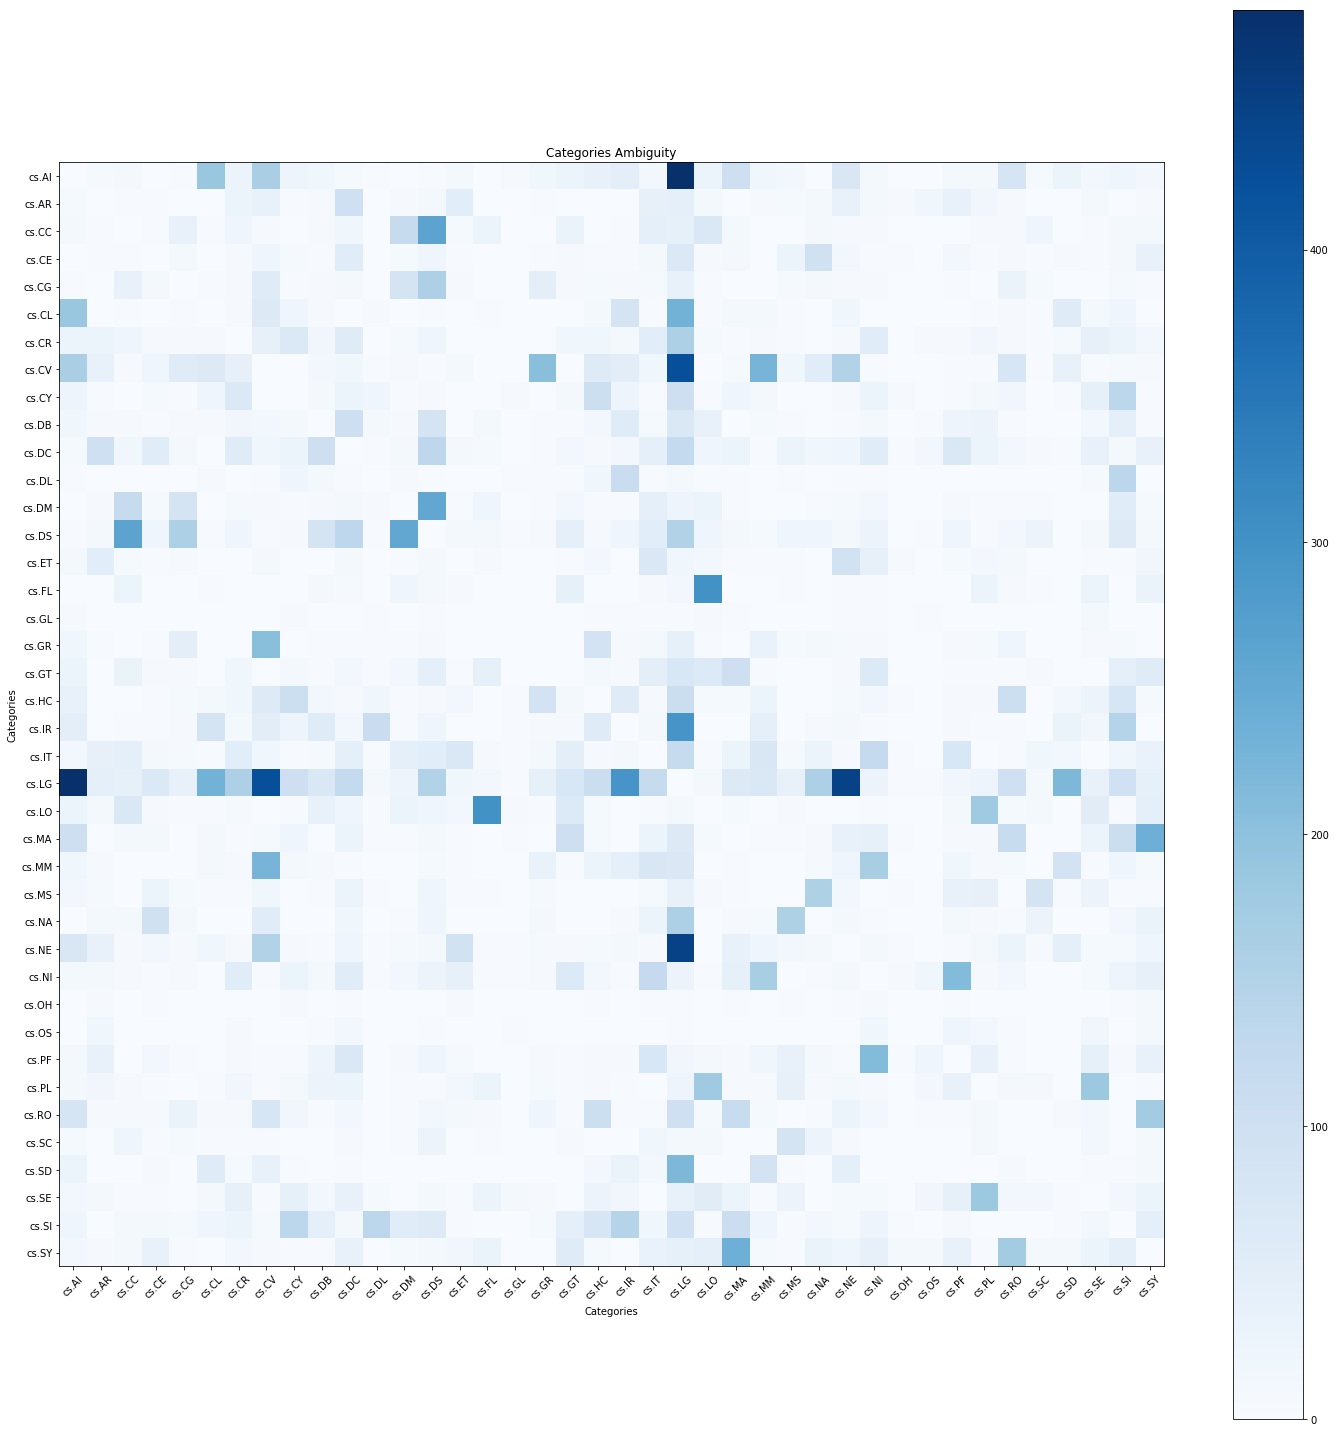

In [453]:
%matplotlib inline
import itertools

cmap = plt.cm.Blues
cm = class_corr
title="Categories Ambiguity"

plt.figure(figsize=(20,20))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks_y = np.arange(len(label_class))
tick_marks_x = np.arange(len(label_class))
plt.xticks(tick_marks_x, label_class, rotation=45)
plt.yticks(tick_marks_y, label_class)

fmt = '.2f'
#if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "",
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Categories')
plt.xlabel('Categories')

In [596]:
np.array(abstract_noun_list)[subjects_graphs["cs.GR"]["cs.HC"]["doc"]]

array(['application technology product development prototyping vp part deals planning simulation verification activities assembly va spite research development efforts decades adoption vp/va hardware limitations roadblocks software development lack models feedback models complexities objects shape conform computation time limitation frame rate requirements khz feedback hz rendering fulfillment objectives survey challenges opportunities directions vp/va focus assembly modeling reasoning perspective focus definitions classifications methods multibody simulation real-time approaches variety devices assembly constraints attention methods motion planning protein docking promise paradigm combinatorial methods ',
       'phenomena signals eye motion magnification techniques variations video knowledge target signal interference motions frequency video-processing framework ascent magnification color motion signals source presence motions velocities approach advantages deepmag task visualization

In [456]:
tokenizer.word_index

{'accumulation': 2979,
 'directory': 4096,
 'orbits': 3708,
 'sort': 2379,
 'csds': 4953,
 'symbols': 1207,
 'behavior': 116,
 'tablets': 4311,
 'predicates': 1626,
 'newton': 2028,
 'rooms': 3174,
 'something': 3450,
 'joint': 2037,
 'trajectories': 676,
 'congestion': 890,
 'intention': 2141,
 'measures': 326,
 'nations': 2996,
 'dags': 4558,
 'genericity': 4701,
 'fm': 4110,
 'preparation': 2505,
 'platoon': 4672,
 'invariants': 1400,
 'cop': 4262,
 'counterexample': 3392,
 'exchange': 899,
 'discoveries': 3503,
 'rewards': 1654,
 'status': 1112,
 'performance': 11,
 'cores': 847,
 'register': 2121,
 'coarse': 2729,
 'sides': 2183,
 'improvement': 259,
 'routing': 849,
 'pedestrians': 1857,
 'estimator': 927,
 'effort': 504,
 'compensation': 2186,
 'noisy': 1832,
 'kitti': 4069,
 'oil': 3172,
 'attacks': 297,
 'hands': 3456,
 'locomotion': 2280,
 'spectrogram': 2758,
 'blocks': 560,
 'bandit': 1845,
 'industry': 675,
 'confusion': 3319,
 'threads': 1369,
 'followers': 2587,
 'year':

In [582]:
cbow2.get_weights()[1].T.shape

(4979, 100)

In [648]:
cbow2.get_weights()[0].shape

(1499, 100)

In [649]:
with open("cbow2_vector_output.txt","w") as file:
    file.write('{} {}\n'.format(V-1, dim))
    vectors = cbow.get_weights()[0]
    for word, i in tokenizer.word_index.items():
        str_vec = ' '.join(map(str, list(vectors[i, :])))
        file.write('{} {}\n'.format(word, str_vec))

In [469]:
import gensim

In [650]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./cbow2_vector_output.txt', binary=False)

In [667]:
#?w2v.most_similar
w2v = gensim.models.KeyedVectors.load_word2vec_format('./cbow2_vector_output.txt', binary=False)
w2v.most_similar(positive=['csai','cslg'],topn=100)

[('cscc', 0.7203377485275269),
 ('csar', 0.7143324017524719),
 ('baselines', 0.6958892941474915),
 ('improvements', 0.6857105493545532),
 ('sensitivity', 0.6750956177711487),
 ('csdb', 0.6666980385780334),
 ('deployment', 0.6646673083305359),
 ('cssd', 0.6550191640853882),
 ('baseline', 0.652403712272644),
 ('root', 0.6512736082077026),
 ('fusion', 0.6511322259902954),
 ('attribution', 0.6477706432342529),
 ('benchmarks', 0.6458086371421814),
 ('pcs', 0.6456060409545898),
 ('csdc', 0.6448971033096313),
 ('parametric', 0.6440258026123047),
 ('review', 0.641896665096283),
 ('proof', 0.6414453387260437),
 ('completeness', 0.6380856037139893),
 ('os', 0.636755108833313),
 ('run', 0.6359990239143372),
 ('rl', 0.6345793604850769),
 ('footprint', 0.6343225240707397),
 ('assurance', 0.6341727375984192),
 ('cssc', 0.6340034604072571),
 ('csos', 0.6332195997238159),
 ('boost', 0.632007896900177),
 ('csdl', 0.6318899393081665),
 ('polymorphism', 0.6301610469818115),
 ('signatures', 0.629965245723

In [463]:
[x[0] for x in tokenizer.word_index.items()].index("csar")

677

In [460]:
cbow.get_weights()[0].shape

(4979, 100)

In [20]:
# make a neural net
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tflearn.data_utils import to_categorical, pad_sequences

Using TensorFlow backend.


In [24]:
from gensim import corpora
dictionary = corpora.Dictionary(abstract_tfidf)
corpus = [dictionary.doc2bow(text) for text in abstract_tfidf]

In [35]:
cvector = CountVectorizer()
abstract_tfidf_clean =  [" ".join(x) for x in abstract_tfidf]
bow = cvector.fit_transform(abstract_tfidf_clean)
label_class = dataset["class"].unique()
label_class

array(['cs.AI', 'cs.AR', 'cs.CC', 'cs.CE', 'cs.CG', 'cs.CL', 'cs.CR',
       'cs.CV', 'cs.CY', 'cs.DB', 'cs.DC', 'cs.DL', 'cs.DM', 'cs.DS',
       'cs.ET', 'cs.FL', 'cs.GL', 'cs.GR', 'cs.GT', 'cs.HC', 'cs.IR',
       'cs.IT', 'cs.LG', 'cs.LO', 'cs.MA', 'cs.MM', 'cs.MS', 'cs.NA',
       'cs.NE', 'cs.NI', 'cs.OH', 'cs.OS', 'cs.PF', 'cs.PL', 'cs.RO',
       'cs.SC', 'cs.SD', 'cs.SE', 'cs.SI', 'cs.SY'], dtype=object)

In [133]:
from keras.layers import Input
from keras.models import Model


model = Sequential()
# input layer
model.add(keras.layers.Dense(5000,input_shape=(bow.shape[1],),activation='relu'))

# hidden layer
model.add(keras.layers.Dense(1000,activation='relu'))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))

# output layer
model.add(keras.layers.Dense(len(label_class),activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [64]:
import json
def labeling_subjects(subjects):
    subs = json.loads(subjects)
    output = np.zeros(len(label_class),dtype=int)
    for sub in [np.argwhere(label_class==sub) for sub in subs]:
        if len(sub)>0:
            output[sub] = 1
    return output

In [65]:
y_ok = dataset["class"].apply(lambda x:np.argwhere(label_class==x)[0][0])

In [142]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
skf = StratifiedKFold(n_splits=10)
test_split = skf.split(tfidf, y_ok.values)
train, test = list(test_split)[0]

In [143]:
test

array([    0,     1,     2, ..., 36456, 36457, 36458])

In [144]:
# processing the model

import random

mini_batch = 1000
total_docs = len(train)
total_batch = int(len(train)/mini_batch)+1
#range_docs = range(0,total_docs)
range_docs = train

X_test = bow[test].toarray()
y_test = np.array([])
for x in dataset.iloc[test].subjects:
    y_test = np.append(y_test,labeling_subjects(x),axis=0)
y_test = y_test.reshape(len(test),len(label_class))

for batch in range(total_batch):
    # random sample dataset
    r_index = random.sample(list(range_docs),mini_batch)
    X_batch = bow[r_index].toarray()
    #y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
    y_batch = np.array([])
    for x in dataset.iloc[r_index].subjects:
        y_batch = np.append(y_batch,labeling_subjects(x),axis=0)

    y_batch = y_batch.reshape(len(r_index),len(label_class))
    model.fit(X_batch,y_batch,epochs=1,batch_size=200,validation_data=(X_test,y_test))

Train on 1000 samples, validate on 3739 samples
Epoch 1/1
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0141 - categorical_accuracy: 0.8210 - val_loss: 0.0958 - val_categorical_accuracy: 0.5381
Train on 1000 samples, validate on 3739 samples
Epoch 1/1
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0162 - categorical_accuracy: 0.7940 - val_loss: 0.0959 - val_categorical_accuracy: 0.5360
Train on 1000 samples, validate on 3739 samples
Epoch 1/1
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0156 - categorical_accuracy: 0.7930 - val_loss: 0.0972 - val_categorical_accuracy: 0.5469
Train on 1000 samples, validate on 3739 samples
Epoch 1/1
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0147 - categorical_accuracy: 0.8120 - val_loss: 0.0976 - val_categorical_accuracy: 0.5413
Train on 1000 samples, validate on 3739 samples
Epoch 1/1
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0161 

In [68]:
X_test = bow[test].toarray()
#y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
y_test = np.array([])
for x in dataset.iloc[test].subjects:
    y_test = np.append(y_test,labeling_subjects(x),axis=0)
y_test = y_test.reshape(len(test),len(label_class))

In [69]:
def labeling_subjects_normal(sub):
    output = np.zeros(len(label_class),dtype=int)
    output[sub] = 1
    return output

In [70]:
y_pred = np.array([])
for x in pred:
    y_pred = np.append(y_pred,labeling_subjects_normal(x),axis=0)
y_pred = y_pred.reshape(len(test),len(label_class))

In [71]:
pred = model.predict_classes(X_test)

In [72]:
sum(y_pred[y_pred==1]==y_test[y_pred==1])/y_pred.shape[0]

0.66140679326023

In [104]:
label_class[np.argsort(model.predict_proba(X_test[3001:3002]))[:,::-1]]

array([['cs.RO', 'cs.OH', 'cs.SY', 'cs.MA', 'cs.CY', 'cs.CV', 'cs.SE',
        'cs.SD', 'cs.NI', 'cs.FL', 'cs.LG', 'cs.GR', 'cs.CG', 'cs.HC',
        'cs.IR', 'cs.PL', 'cs.CE', 'cs.NE', 'cs.AI', 'cs.NA', 'cs.GT',
        'cs.MM', 'cs.LO', 'cs.SI', 'cs.PF', 'cs.ET', 'cs.CR', 'cs.AR',
        'cs.DL', 'cs.CL', 'cs.IT', 'cs.DM', 'cs.MS', 'cs.DC', 'cs.DB',
        'cs.SC', 'cs.GL', 'cs.DS', 'cs.OS', 'cs.CC']], dtype=object)

In [105]:
np.sort(model.predict_proba(X_test[3001:3002]))[:,::-1]

array([[6.6720152e-01, 1.3610247e-01, 6.9898769e-02, 5.1547684e-02,
        2.3630008e-02, 2.0518173e-02, 1.2041900e-02, 8.5129933e-03,
        8.1237480e-03, 6.8534394e-03, 5.0822864e-03, 3.8696520e-03,
        3.6587599e-03, 2.9616163e-03, 1.8139862e-03, 1.7539781e-03,
        1.4072191e-03, 7.3892059e-04, 7.2795292e-04, 6.1372720e-04,
        6.0378789e-04, 5.9071463e-04, 5.5125199e-04, 3.7447168e-04,
        2.9967091e-04, 2.0530540e-04, 1.7777954e-04, 1.5477311e-04,
        1.4178726e-04, 8.2605402e-05, 8.0479214e-05, 7.8171237e-05,
        6.9043177e-05, 6.1037717e-05, 1.5139238e-05, 1.3125244e-05,
        5.1788502e-06, 4.1684252e-06, 3.1821405e-06, 9.3186856e-07]],
      dtype=float32)

In [91]:
dataset.iloc[test].iloc[3:4,]

id                                              title  \
3  1809.03428v1  Not Just Privacy: Improving Performance of Pri...   

                                             authors  \
3  ["Ji Wang", "Jianguo Zhang", "Weidong Bao", "X...   

                                            abstract  \
3  The increasing demand for on-device deep learn...   

                                 subjects  class  is_pdf  is_source  \
3  ["cs.LG", "cs.AI", "cs.DC", "stat.ML"]  cs.AI     NaN        NaN   

              pub_date          update_date  
3  2018-09-10 16:09:58  2018-09-10 16:09:58

In [106]:
dataset.iloc[test].iloc[3001:3002,:]

id                                              title  \
29916  1807.11264v1  Real Time Lidar and Radar High-Level Fusion fo...   

                                       authors  \
29916  ["Hatem Hajri", "Mohamed-Cherif Rahal"]   

                                                abstract            subjects  \
29916  - Both Lidars and Radars are sensors for obsta...  ["cs.RO", "cs.PF"]   

       class  is_pdf  is_source             pub_date          update_date  
29916  cs.PF     NaN        NaN  2018-07-30 09:58:48  2018-07-30 09:58:48

In [107]:
dataset.iloc[test].iloc[3001:3002,:].abstract.values

array(['- Both Lidars and Radars are sensors for obstacle detection. While Lidars are\r\nvery accurate on obstacles positions and less accurate on their velocities,\r\nRadars are more precise on obstacles velocities and less precise on their\r\npositions. Sensor fusion between Lidar and Radar aims at improving obstacle\r\ndetection using advantages of the two sensors. The present paper proposes a\r\nreal-time Lidar/Radar data fusion algorithm for obstacle detection and tracking\r\nbased on the global nearest neighbour standard filter (GNN). This algorithm is\r\nimplemented and embedded in an automative vehicle as a component generated by a\r\nreal-time multisensor software. The benefits of data fusion comparing with the\r\nuse of a single sensor are illustrated through several tracking scenarios (on a\r\nhighway and on a bend) and using real-time kinematic sensors mounted on the ego\r\nand tracked vehicles as a ground truth.'],
      dtype=object)

In [150]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

# set number of topics
# breakdown into two times of the classes
num_topics = 80

lda = LatentDirichletAllocation(n_topics=num_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [214]:
def display_topics(model, feature_names, no_top_words):
    topic_result = {}
    for topic_idx, topic in enumerate(model.components_):
        #print("Topic %d:" % (topic_idx))
        topic_result["Topic %d" % (topic_idx)] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        #print(" ".join([feature_names[i]
        #                for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topic_result

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
topic_df = pd.DataFrame(display_topics(lda, tf_feature_names, no_top_words))
#topic_df.to_csv("topic_lda.csv")

In [225]:
topic_df["Topic 21"]

0         systems
1          system
2            data
3           users
4            user
5           paper
6    applications
7          design
8         present
9            many
Name: Topic 21, dtype: object

In [152]:
output_cluster = lda.transform(tf)

In [156]:
dataset["cluster"] = output_cluster.argmax(axis=1)

In [175]:
dataset.groupby(["class","cluster"],as_index=False).count().iloc[:,[0,1,2]].head()

class  cluster   id
0  cs.AI        3    3
1  cs.AI        4    6
2  cs.AI        5    5
3  cs.AI        7   10
4  cs.AI        8  360

In [177]:
dataset.groupby(["class","cluster"],as_index=False).count().iloc[:,[0,1,2]].values

array([['cs.AI', 3, 3],
       ['cs.AI', 4, 6],
       ['cs.AI', 5, 5],
       ...,
       ['cs.SY', 57, 18],
       ['cs.SY', 64, 2],
       ['cs.SY', 69, 1]], dtype=object)

In [180]:
#pd.DataFrame({"a":{"2":1,}})
digest = {}
for x in dataset.groupby(["class","cluster"],as_index=False).count().iloc[:,[0,1,2]].values:
    if x[0] not in digest.keys():
        digest[x[0]] = {}
    if x[1] not in digest[x[0]].keys():
        digest[x[0]][x[1]] = x[2]

In [183]:
digest_pd = pd.DataFrame(digest).transpose()

In [192]:
digest_pd[pd.isnull(digest_pd)]=0

In [218]:
digest_pd.head()

1     2    3    4      5     7      8     9      12   13  ...    65  \
cs.AI  0.0   0.0  3.0  6.0    5.0  10.0  360.0  17.0   75.0  3.0  ...   0.0   
cs.AR  0.0   0.0  1.0  5.0  174.0   1.0   33.0   0.0  139.0  0.0  ...   0.0   
cs.CC  0.0   8.0  0.0  4.0    0.0   1.0    7.0   2.0    6.0  0.0  ...   0.0   
cs.CE  0.0   0.0  0.0  0.0    1.0   3.0  112.0   3.0  215.0  0.0  ...   0.0   
cs.CG  1.0  18.0  3.0  0.0    0.0   2.0   63.0   0.0   56.0  0.0  ...   0.0   

        67    69   71   72    73   74   76   77    78  
cs.AI  1.0   1.0  2.0  1.0  16.0  1.0  1.0  3.0   2.0  
cs.AR  0.0   0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0  
cs.CC  0.0  13.0  0.0  1.0   0.0  0.0  0.0  0.0  33.0  
cs.CE  0.0   0.0  0.0  0.0   4.0  0.0  0.0  1.0   1.0  
cs.CG  0.0   2.0  0.0  1.0   4.0  0.0  0.0  4.0  97.0  

[5 rows x 59 columns]

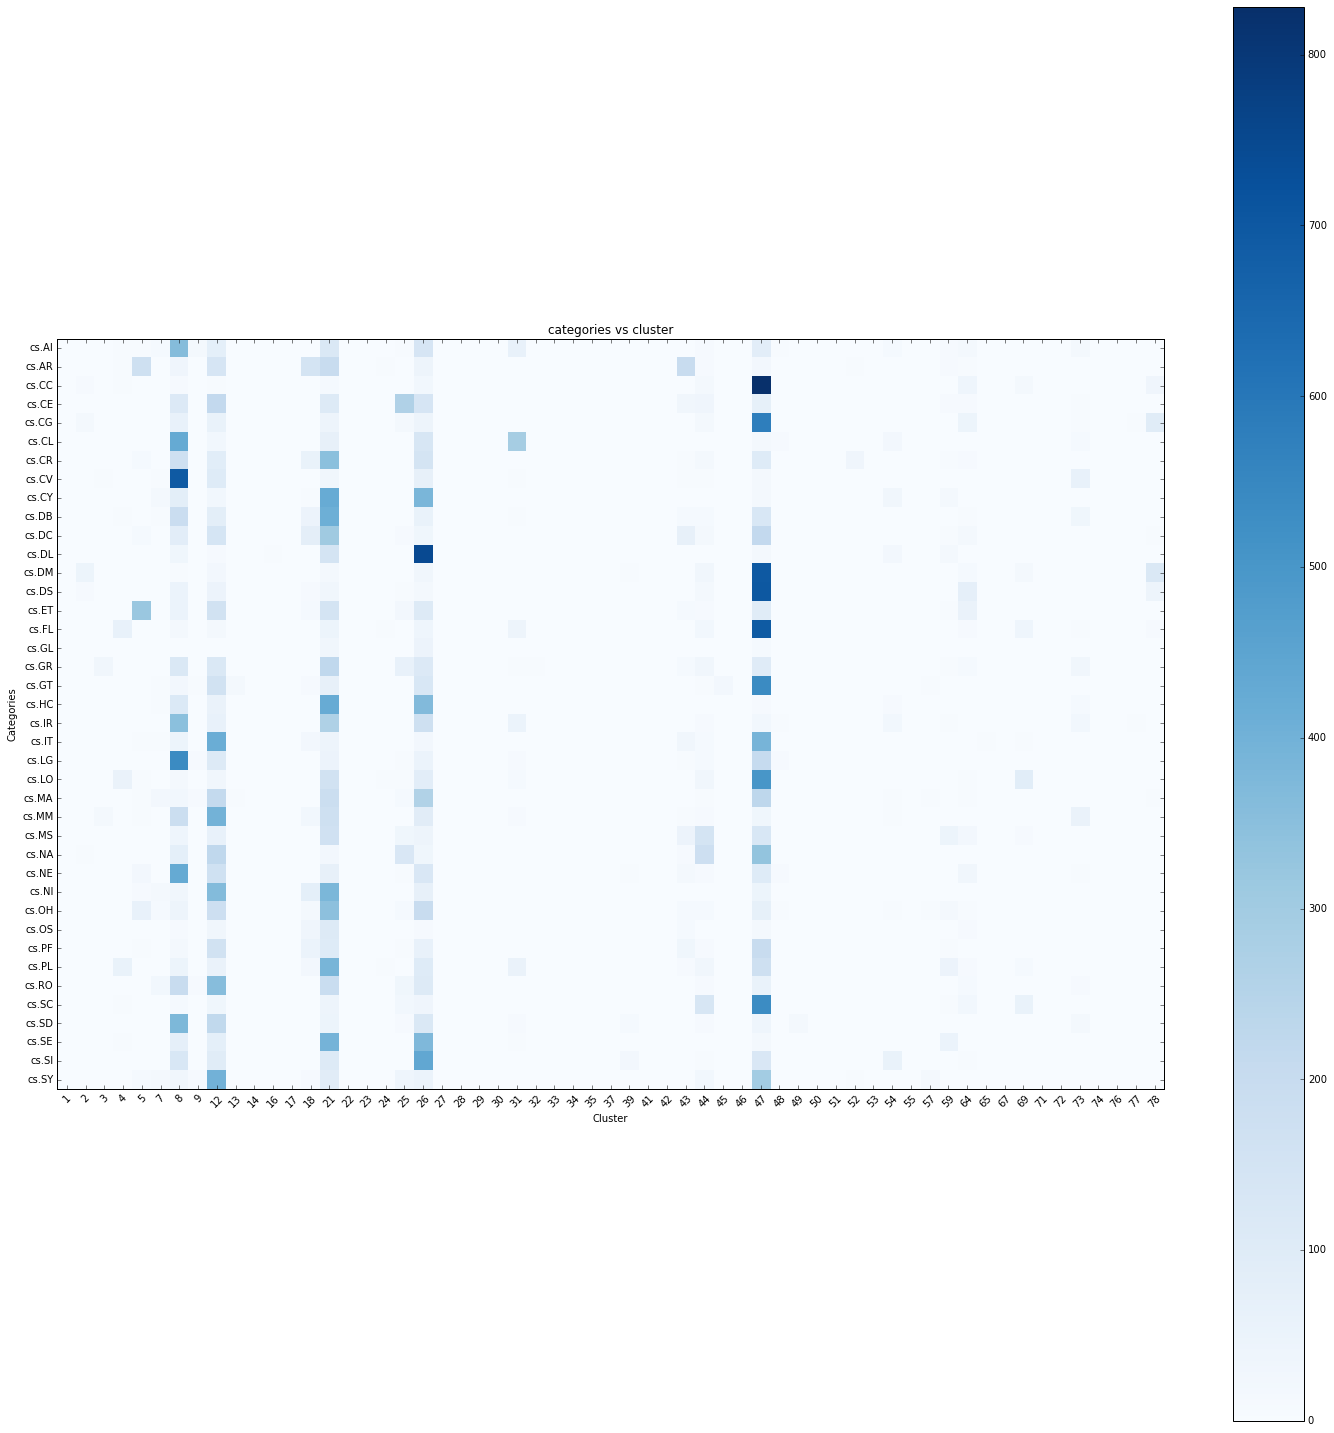

In [211]:
%matplotlib inline
import itertools

cmap = plt.cm.Blues
cm = digest_pd.as_matrix()
title="categories vs cluster"

plt.figure(figsize=(20,20))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks_y = np.arange(len(digest_pd.index.values))
tick_marks_x = np.arange(len(digest_pd.columns.values))
plt.xticks(tick_marks_x, digest_pd.columns.values, rotation=45)
plt.yticks(tick_marks_y, digest_pd.index.values)

fmt = '.2f'
#if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "",
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Categories')
plt.xlabel('Cluster')


In [9]:
abstract_clean_l = dataset.abstract.apply(lambda my_str: alphabetic_only_l(my_str))
from gensim import corpora
dictionary = corpora.Dictionary(abstract_clean_l)
corpus = [dictionary.doc2bow(text) for text in abstract_clean_l]

In [219]:
import gensim
NUM_TOPICS = 80
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

In [220]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [229]:
import pickle
with open("lda_model.pickle","wb") as checkpoint:
    pickle.dump((lda,ldamodel),checkpoint)

In [46]:
from hlda.sampler import HierarchicalLDA


In [47]:
n_samples = 500       # no of iterations for the sampler
alpha = 10.0          # smoothing over level distributions
gamma = 1.0           # CRP smoothing parameter; number of imaginary customers at next, as yet unused table
eta = 0.1             # smoothing over topic-word distributions
num_levels = 3        # the number of levels in the tree
display_topics = 50   # the number of iterations between printing a brief summary of the topics so far
n_words = 5           # the number of most probable words to print for each topic after model estimation
with_weights = False  # whether to print the words with the weights

In [11]:
new_corpus=[]
new_vocab=[ x[1] for x in sorted(list(dictionary.items()),key=lambda x:x[0]) ]

In [12]:
for x in abstract_clean_l.values:
    one_doc = []
    for y in x:
        one_doc.append(dictionary.token2id[y])
        
    new_corpus.append(one_doc)

In [13]:
len(new_vocab)

51903

In [101]:
hlda = HierarchicalLDA(new_corpus, new_vocab, alpha=alpha, gamma=gamma, eta=eta, num_levels=num_levels)

In [102]:
hlda.estimate(n_samples, display_topics=display_topics, n_words=n_words, with_weights=with_weights)

HierarchicalLDA sampling
.................................................. 50
topic 0 (level=0, total_words=1018138, documents=37359): data, paper, model, approach, using, 
    topic 1 (level=1, total_words=293323, documents=12064): algorithm, time, network, show, results, 
        topic 2 (level=2, total_words=85947, documents=2813): problem, algorithm, model, learning, networks, 
        topic 6 (level=2, total_words=86362, documents=2190): graph, problem, graphs, algorithm, time, 
        topic 8 (level=2, total_words=605, documents=18): lumen, robot, speech, module, face, 
        topic 12 (level=2, total_words=104014, documents=3117): power, design, performance, memory, energy, 
        topic 17 (level=2, total_words=108918, documents=3210): data, system, software, systems, users, 
        topic 23 (level=2, total_words=515, documents=30): team, teams, sports, coach, competition, 
        topic 31 (level=2, total_words=2729, documents=103): cancer, genes, gene, patients, drug, 
 

        topic 76 (level=2, total_words=101, documents=11): theme, saccade, mias, subgraph, funny, 
        topic 87 (level=2, total_words=37, documents=3): stepgan, tent, seqgan, goodness, parasitic, 
        topic 89 (level=2, total_words=77, documents=7): itemsets, hins, infrequent, diffeomorphisms, rule, 
        topic 100 (level=2, total_words=116, documents=7): noisin, concessions, syriac, argumentative, minds, 
        topic 118 (level=2, total_words=20, documents=2): verifiers, original, boogie, link, insert, 
.................................................. 100
topic 0 (level=0, total_words=1012291, documents=37359): data, model, paper, approach, system, 
    topic 1 (level=1, total_words=298425, documents=12159): algorithm, time, show, results, paper, 
        topic 2 (level=2, total_words=77673, documents=2677): networks, model, problem, learning, network, 
        topic 6 (level=2, total_words=86277, documents=2325): graph, graphs, problem, algorithm, time, 
        topic 

.................................................. 150
topic 0 (level=0, total_words=1007545, documents=37359): data, paper, model, system, approach, 
    topic 1 (level=1, total_words=301868, documents=12223): algorithm, show, time, results, problem, 
        topic 2 (level=2, total_words=74769, documents=2572): networks, learning, network, model, problem, 
        topic 6 (level=2, total_words=87357, documents=2361): graph, graphs, problem, algorithm, time, 
        topic 8 (level=2, total_words=750, documents=22): lumen, module, robot, skull, speech, 
        topic 12 (level=2, total_words=93964, documents=2667): power, design, energy, memory, neural, 
        topic 17 (level=2, total_words=99810, documents=2878): data, software, system, systems, users, 
        topic 23 (level=2, total_words=1083, documents=54): team, game, teams, sports, ranking, 
        topic 31 (level=2, total_words=5881, documents=203): cancer, patients, clinical, medical, gene, 
        topic 32 (level=2, tot

.........

KeyboardInterrupt: 

[(0, 'able'),
 (1, 'accurate'),
 (2, 'action'),
 (3, 'adopted'),
 (4, 'also'),
 (5, 'analysis'),
 (6, 'answer'),
 (7, 'autonomous'),
 (8, 'based'),
 (9, 'baseline'),
 (10, 'behavior'),
 (11, 'benchmark'),
 (12, 'brier'),
 (13, 'caused'),
 (14, 'comparing'),
 (15, 'consequences'),
 (16, 'conservatism'),
 (17, 'construct'),
 (18, 'corresponding'),
 (19, 'criticality'),
 (20, 'defined'),
 (21, 'designated'),
 (22, 'different'),
 (23, 'discuss'),
 (24, 'driving'),
 (25, 'employ'),
 (26, 'entities'),
 (27, 'evaluated'),
 (28, 'evaluation'),
 (29, 'exemplar'),
 (30, 'existing'),
 (31, 'fatality'),
 (32, 'formulate'),
 (33, 'formulation'),
 (34, 'framework'),
 (35, 'future'),
 (36, 'generate'),
 (37, 'generated'),
 (38, 'graphical'),
 (39, 'highly'),
 (40, 'highway'),
 (41, 'homogenize'),
 (42, 'inaccurate'),
 (43, 'indicate'),
 (44, 'indicator'),
 (45, 'intention'),
 (46, 'interacting'),
 (47, 'interactive'),
 (48, 'inverse'),
 (49, 'learning'),
 (50, 'method'),
 (51, 'methods'),
 (52, 'metr

In [10]:
# build skipgrams feature from sentences over the abstract
from nltk.util import skipgrams

In [11]:
def alphabetic_only_sentence(x_string):
    sentences = x_string.lower().split(".")
    all_sentence = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        # remove all tokens that are not alphabetic
        words = [word for word in tokens if word.isalpha() and word not in stop_words and len(word)>3]
        all_sentence.append(words)
    return all_sentence

In [13]:
test = alphabetic_only_sentence(dataset.iloc[0].abstract)

In [14]:
list(skipgrams(test[2],3,2))

[('existing', 'unified', 'framework'),
 ('existing', 'unified', 'homogenize'),
 ('existing', 'unified', 'problem'),
 ('existing', 'framework', 'homogenize'),
 ('existing', 'framework', 'problem'),
 ('existing', 'homogenize', 'problem'),
 ('unified', 'framework', 'homogenize'),
 ('unified', 'framework', 'problem'),
 ('unified', 'framework', 'formulation'),
 ('unified', 'homogenize', 'problem'),
 ('unified', 'homogenize', 'formulation'),
 ('unified', 'problem', 'formulation'),
 ('framework', 'homogenize', 'problem'),
 ('framework', 'homogenize', 'formulation'),
 ('framework', 'homogenize', 'representation'),
 ('framework', 'problem', 'formulation'),
 ('framework', 'problem', 'representation'),
 ('framework', 'formulation', 'representation'),
 ('homogenize', 'problem', 'formulation'),
 ('homogenize', 'problem', 'representation'),
 ('homogenize', 'problem', 'simplification'),
 ('homogenize', 'formulation', 'representation'),
 ('homogenize', 'formulation', 'simplification'),
 ('homogenize',

# using bag of words for classification

In [13]:
dictionary.from_corpus()

TypeError: from_corpus() missing 1 required positional argument: 'corpus'

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cvector = CountVectorizer()

In [16]:
bow = cvector.fit_transform(abstract_clean)

In [17]:
# we have 51,903 features / words
bow.shape

(37359, 51903)

In [18]:
bow[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [19]:
bow[0,np.argwhere(bow[0]!=0)[:,1]].toarray()

array([[1, 1, 1, 1, 2, 1, 1, 2, 2, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
        1, 2, 1, 2, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 3, 5, 4, 1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2,
        1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2]],
      dtype=int64)

In [20]:
# make a neural net
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tflearn.data_utils import to_categorical, pad_sequences

Using TensorFlow backend.


In [21]:
label_class = dataset["class"].unique()
label_class

array(['cs.AI', 'cs.AR', 'cs.CC', 'cs.CE', 'cs.CG', 'cs.CL', 'cs.CR',
       'cs.CV', 'cs.CY', 'cs.DB', 'cs.DC', 'cs.DL', 'cs.DM', 'cs.DS',
       'cs.ET', 'cs.FL', 'cs.GL', 'cs.GR', 'cs.GT', 'cs.HC', 'cs.IR',
       'cs.IT', 'cs.LG', 'cs.LO', 'cs.MA', 'cs.MM', 'cs.MS', 'cs.NA',
       'cs.NE', 'cs.NI', 'cs.OH', 'cs.OS', 'cs.PF', 'cs.PL', 'cs.RO',
       'cs.SC', 'cs.SD', 'cs.SE', 'cs.SI', 'cs.SY'], dtype=object)

In [22]:
from keras.layers import Input
from keras.models import Model


model = Sequential()
# input layer
model.add(keras.layers.Dense(5000,input_shape=(bow.shape[1],),activation='relu'))

# hidden layer
model.add(keras.layers.Dense(1000,activation='relu'))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))

# output layer
model.add(keras.layers.Dense(len(label_class),activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5000)              259520000 
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              5001000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_5 (Dense)              (None, 40)                4040      
Total params: 265,075,640
Trainable params: 265,075,640
Non-trainable params: 0
_________________________________________________________________


In [24]:
import json
def labeling_subjects(subjects):
    subs = json.loads(subjects)
    output = np.zeros(len(label_class),dtype=int)
    for sub in [np.argwhere(label_class==sub) for sub in subs]:
        if len(sub)>0:
            output[sub] = 1
    return output

In [25]:
test = np.array([])
for x in dataset.iloc[0:10].subjects:
    test = np.append(test,labeling_subjects(x),axis=0)

test = test.reshape(10,40)
test.shape
#dataset.iloc[0:10].subjects.apply(lambda x:)

(10, 40)

In [36]:
# processing the model

import random

mini_batch = 1000
total_docs = len(train)
total_batch = int(len(train)/mini_batch)+1
#range_docs = range(0,total_docs)
range_docs = train

for batch in range(total_batch):
    # random sample dataset
    r_index = random.sample(list(range_docs),mini_batch)
    X_batch = bow[r_index].toarray()
    #y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
    y_batch = np.array([])
    for x in dataset.iloc[r_index].subjects:
        y_batch = np.append(y_batch,labeling_subjects(x),axis=0)

    y_batch = y_batch.reshape(len(r_index),len(label_class))
    model.fit(X_batch,y_batch,epochs=1,batch_size=200)


Epoch 1/1
1000/1000 [==============================] - 56s 56ms/step - loss: 5.0074 - acc: 0.0500
Epoch 1/1
1000/1000 [==============================] - 40s 40ms/step - loss: 4.5948 - acc: 0.1530
Epoch 1/1
1000/1000 [==============================] - 43s 43ms/step - loss: 3.6858 - acc: 0.3090
Epoch 1/1
1000/1000 [==============================] - 43s 43ms/step - loss: 3.0752 - acc: 0.4180
Epoch 1/1
1000/1000 [==============================] - 40s 40ms/step - loss: 3.0857 - acc: 0.4640
Epoch 1/1
1000/1000 [==============================] - 38s 38ms/step - loss: 2.8985 - acc: 0.4690
Epoch 1/1
1000/1000 [==============================] - 35s 35ms/step - loss: 2.6622 - acc: 0.4900
Epoch 1/1
1000/1000 [==============================] - 40s 40ms/step - loss: 2.7248 - acc: 0.5150
Epoch 1/1
1000/1000 [==============================] - 36s 36ms/step - loss: 2.5286 - acc: 0.5470
Epoch 1/1
1000/1000 [==============================] - 35s 35ms/step - loss: 2.5867 - acc: 0.5470
Epoch 1/1
1000/1000 

In [37]:
# save model
#model.save_weights('model-keras-bow-01-train.h5')    

In [38]:
print("Test")

Test


In [83]:
X_test = bow[test].toarray()
#y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
y_test = np.array([])
for x in dataset.iloc[test].subjects:
    y_test = np.append(y_test,labeling_subjects(x),axis=0)
y_test = y_test.reshape(len(test),len(label_class))

In [84]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [42]:
pred = model.predict_classes(X_batch)

In [45]:
pred_proba = model.predict_proba(X_batch)

In [47]:
from keras.layers import Input
from keras.models import Model


model_multilabel = Sequential()
# input layer
model_multilabel.add(keras.layers.Dense(5000,input_shape=(bow.shape[1],),activation='relu'))

# hidden layer
model_multilabel.add(keras.layers.Dense(1000,activation='relu'))
model_multilabel.add(keras.layers.Dense(500,activation='relu'))
model_multilabel.add(keras.layers.Dense(100,activation='relu'))

# output layer
model_multilabel.add(keras.layers.Dense(len(label_class),activation='sigmoid'))
model_multilabel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [48]:
# processing the model

import random

mini_batch = 1000
total_docs = len(train)
total_batch = int(len(train)/mini_batch)+1
#range_docs = range(0,total_docs)
range_docs = train

for batch in range(total_batch):
    # random sample dataset
    r_index = random.sample(list(range_docs),mini_batch)
    X_batch = bow[r_index].toarray()
    #y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
    y_batch = np.array([])
    for x in dataset.iloc[r_index].subjects:
        y_batch = np.append(y_batch,labeling_subjects(x),axis=0)

    y_batch = y_batch.reshape(len(r_index),len(label_class))
    model_multilabel.fit(X_batch,y_batch,epochs=1,batch_size=200)

Epoch 1/1
1000/1000 [==============================] - 68s 68ms/step - loss: 0.4860 - acc: 0.7684
Epoch 1/1
1000/1000 [==============================] - 46s 46ms/step - loss: 0.2238 - acc: 0.9567
Epoch 1/1
1000/1000 [==============================] - 44s 44ms/step - loss: 0.1891 - acc: 0.9659
Epoch 1/1
1000/1000 [==============================] - 41s 41ms/step - loss: 0.1757 - acc: 0.9649
Epoch 1/1
1000/1000 [==============================] - 37s 37ms/step - loss: 0.1629 - acc: 0.9659
Epoch 1/1
1000/1000 [==============================] - 35s 35ms/step - loss: 0.1586 - acc: 0.9651
Epoch 1/1
1000/1000 [==============================] - 36s 36ms/step - loss: 0.1489 - acc: 0.9656
Epoch 1/1
1000/1000 [==============================] - 41s 41ms/step - loss: 0.1428 - acc: 0.9656
Epoch 1/1
1000/1000 [==============================] - 37s 37ms/step - loss: 0.1396 - acc: 0.9643
Epoch 1/1
1000/1000 [==============================] - 37s 37ms/step - loss: 0.1296 - acc: 0.9657
Epoch 1/1
1000/1000 

In [122]:
model_multilabel.save_weights('model-keras-bow-01-multi.h5')    

In [135]:
# processing the model

import random

mini_batch = 1000
total_docs = len(train)
total_batch = int(len(train)/mini_batch)+1
#range_docs = range(0,total_docs)
range_docs = train

for batch in range(total_batch):
    # random sample dataset
    r_index = random.sample(list(range_docs),mini_batch)
    X_batch = bow[r_index].toarray()
    #y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
    y_batch = np.array([])
    for x in dataset.iloc[r_index].subjects:
        y_batch = np.append(y_batch,labeling_subjects(x),axis=0)

    y_batch = y_batch.reshape(len(r_index),len(label_class))
    model_multilabel.fit(X_batch,y_batch,epochs=1,batch_size=200)

Epoch 1/1
1000/1000 [==============================] - 74s 74ms/step - loss: 0.0544 - acc: 0.9824
Epoch 1/1
1000/1000 [==============================] - 62s 62ms/step - loss: 0.0520 - acc: 0.9834
Epoch 1/1
1000/1000 [==============================] - 48s 48ms/step - loss: 0.0495 - acc: 0.9836
Epoch 1/1
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0500 - acc: 0.9837
Epoch 1/1
1000/1000 [==============================] - 46s 46ms/step - loss: 0.0529 - acc: 0.9833
Epoch 1/1
1000/1000 [==============================] - 45s 45ms/step - loss: 0.0464 - acc: 0.9858
Epoch 1/1
1000/1000 [==============================] - 46s 46ms/step - loss: 0.0468 - acc: 0.9847
Epoch 1/1
1000/1000 [==============================] - 46s 46ms/step - loss: 0.0456 - acc: 0.9861
Epoch 1/1
1000/1000 [==============================] - 47s 47ms/step - loss: 0.0466 - acc: 0.9846
Epoch 1/1
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0442 - acc: 0.9856
Epoch 1/1
1000/1000 

In [136]:
model_multilabel.save_weights('model-keras-bow-02-multi.h5')    

In [137]:
pred = model_multilabel.predict_classes(X_test)

In [138]:
pred

array([22,  0,  5, ..., 28, 39, 39])

In [139]:
y_test[1]

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [140]:
def labeling_subjects_normal(sub):
    output = np.zeros(len(label_class),dtype=int)
    output[sub] = 1
    return output

In [141]:
y_pred = np.array([])
for x in pred:
    y_pred = np.append(y_pred,labeling_subjects_normal(x),axis=0)
y_pred = y_pred.reshape(len(test),len(label_class))

In [142]:
y_pred[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [143]:
y_test[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0.])

In [144]:
sum(y_pred[y_pred==1]==y_test[y_pred==1])/y_pred.shape[0]

0.6555228670767584

In [119]:
pred_cat = model.predict_classes(X_test)

In [126]:
y_pred_cat = np.array([])
for x in pred_cat:
    y_pred_cat = np.append(y_pred_cat,labeling_subjects_normal(x),axis=0)
y_pred_cat = y_pred_cat.reshape(len(test),len(label_class))

In [127]:
sum(y_pred_cat[y_pred_cat==1]==y_test[y_pred_cat==1])/y_pred_cat.shape[0]

0.6453597218507623

In [133]:
pred_batch = model.predict_proba(X_batch)

In [131]:
y_pred_batch = np.array([])
for x in pred_batch:
    y_pred_batch = np.append(y_pred_batch,labeling_subjects_normal(x),axis=0)
y_pred_batch = y_pred_batch.reshape(len(pred_batch),len(label_class))

In [134]:
sum(y_batch[pred_batch>0.5]==True)/y_pred_batch.shape[0]

0.669

In [171]:
for batch in range(total_batch):
    # random sample dataset
    r_index = random.sample(range_docs,mini_batch)
    X_batch = bow[r_index].toarray()
    #y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
    y_batch = np.array([])
    for x in dataset.iloc[r_index].subjects:
        y_batch = np.append(y_batch,labeling_subjects(x),axis=0)

    y_batch = y_batch.reshape(len(r_index),len(label_class))
    model.fit(X_batch,y_batch,epochs=1,batch_size=200)

Epoch 1/1
1000/1000 [==============================] - 56s 56ms/step - loss: 1.6598 - acc: 0.7150
Epoch 1/1
1000/1000 [==============================] - 43s 43ms/step - loss: 1.6303 - acc: 0.6910
Epoch 1/1
1000/1000 [==============================] - 44s 44ms/step - loss: 1.6704 - acc: 0.6920
Epoch 1/1
1000/1000 [==============================] - 44s 44ms/step - loss: 1.5685 - acc: 0.7070
Epoch 1/1
1000/1000 [==============================] - 41s 41ms/step - loss: 1.6707 - acc: 0.7090
Epoch 1/1
1000/1000 [==============================] - 46s 46ms/step - loss: 1.5935 - acc: 0.7110
Epoch 1/1
1000/1000 [==============================] - 46s 46ms/step - loss: 1.6225 - acc: 0.6740
Epoch 1/1
1000/1000 [==============================] - 52s 52ms/step - loss: 1.6219 - acc: 0.7130
Epoch 1/1
1000/1000 [==============================] - 47s 47ms/step - loss: 1.5140 - acc: 0.7400
Epoch 1/1
1000/1000 [==============================] - 41s 41ms/step - loss: 1.6930 - acc: 0.7100
Epoch 1/1
1000/1000 

In [172]:
model.save_weights('model-keras-bow-02.h5')    

In [42]:
bow.shape

(37359, 51903)

In [43]:
label

<37359x51903 sparse matrix of type '<class 'numpy.int64'>'
	with 2405773 stored elements in Compressed Sparse Row format>

In [28]:
def test_subject(subjects):
    subs = json.loads(subjects)
    output = np.zeros(len(label_class),dtype=int)
    for sub in [np.argwhere(label_class==sub) for sub in subs]:
        try:
            if len(sub)>0:
                return sub[0][0]
                #output[sub] = 1
        except BaseException as ex:
            return -1
    return output

In [29]:
y_ok = dataset["class"].apply(lambda x:np.argwhere(label_class==x)[0][0])

In [31]:
bow.toarray

<bound method _cs_matrix.toarray of <37359x51903 sparse matrix of type '<class 'numpy.int64'>'
	with 2405773 stored elements in Compressed Sparse Row format>>

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# decrease to only using 10thousands feature
no_features = 5000
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features)
tfidf = tfidf_vectorizer.fit_transform(abstract_clean)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [33]:
tfidf.shape

(37359, 5000)

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
skf = StratifiedKFold(n_splits=10)
test_split = skf.split(tfidf, y_ok.values)
train, test = list(test_split)[0]

In [35]:
print("train",len(list(train)))
print("test",len(list(test)))

train 33620
test 3739


In [127]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(tfidf[train],y_ok.values[train])

In [128]:
clf.score(tfidf[test], y_ok[test])

0.5792992778817866

## Words Embedding with categories

In [130]:
from keras.layers import Input
from keras.models import Model


model_embed = Sequential()
# input layer
model_embed.add(keras.layers.Dense(5000,input_shape=(bow.shape[1],),activation='relu'))

# hidden layer
model_embed.add(keras.layers.Dense(1000,activation='relu'))
model_embed.add(keras.layers.Dense(500,activation='relu'))
model_embed.add(keras.layers.Dense(100,activation='relu'))
model_embed.add(keras.layers.Dense(500,activation='relu'))
model_embed.add(keras.layers.Dense(1000,activation='relu'))
model_embed.add(keras.layers.Dense(5000,activation='relu'))

# output layer
model_embed.add(keras.layers.Dense(bow.shape[1],activation='sigmoid'))
model_embed.compile(loss='binary_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])



In [131]:
model_embed.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 5000)              50005000  
_________________________________________________________________
dense_24 (Dense)             (None, 1000)              5001000   
_________________________________________________________________
dense_25 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_26 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_27 (Dense)             (None, 500)               50500     
_________________________________________________________________
dense_28 (Dense)             (None, 1000)              501000    
_________________________________________________________________
dense_29 (Dense)             (None, 5000)              5005000   
__________

In [113]:
abstract_tfidf

[['autonomous',
  'vehicles',
  'able',
  'generate',
  'accurate',
  'probabilistic',
  'predictions',
  'uncertain',
  'behavior',
  'road',
  'users',
  'moreover',
  'reactive',
  'predictions',
  'necessary',
  'highly',
  'interactive',
  'driving',
  'scenarios',
  'answer',
  'take',
  'action',
  'future',
  'autonomous',
  'vehicles',
  'existing',
  'unified',
  'framework',
  'problem',
  'formulation',
  'representation',
  'simplification',
  'evaluation',
  'metric',
  'various',
  'prediction',
  'methods',
  'probabilistic',
  'graphical',
  'models',
  'neural',
  'networks',
  'inverse',
  'reinforcement',
  'learning',
  'paper',
  'formulate',
  'probabilistic',
  'reaction',
  'prediction',
  'problem',
  'reveal',
  'relationship',
  'reaction',
  'situation',
  'prediction',
  'problems',
  'employ',
  'prototype',
  'trajectories',
  'designated',
  'motion',
  'patterns',
  'intention',
  'representation',
  'probabilities',
  'corresponding',
  'trajectory',


In [132]:
# processing the model

import random

mini_batch = 1000
total_docs = len(train)
total_batch = int(len(train)/mini_batch)+1
range_docs = range(0,total_docs)


for batch in range(total_batch):
    # random sample dataset
    r_index = random.sample(range_docs,mini_batch)
    X_batch = bow[r_index].toarray()
    #y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
    y_batch = np.array([])
    for x in dataset.iloc[r_index].subjects:
        y_batch = np.append(y_batch,labeling_subjects(x),axis=0)

    y_batch = y_batch.reshape(len(r_index),len(label_class))
    model_embed.fit(X_batch,X_batch,epochs=1,batch_size=200)


Epoch 1/1
1000/1000 [==============================] - 23s 23ms/step - loss: 0.4123 - categorical_accuracy: 0.0270
Epoch 1/1
1000/1000 [==============================] - 19s 19ms/step - loss: 0.1662 - categorical_accuracy: 0.0050
Epoch 1/1
1000/1000 [==============================] - 19s 19ms/step - loss: 0.1454 - categorical_accuracy: 0.0020
Epoch 1/1
1000/1000 [==============================] - 17s 17ms/step - loss: 0.1383 - categorical_accuracy: 0.0030
Epoch 1/1
1000/1000 [==============================] - 17s 17ms/step - loss: 0.1379 - categorical_accuracy: 0.0020
Epoch 1/1


KeyboardInterrupt: 

In [118]:
test = model_embed.predict_proba(X_batch)

In [124]:
np.argwhere(test[0])[:,0]

array([ 290,  328,  383,  478, 2493, 2546, 3288, 3903, 5324, 5498, 5896,
       6001, 6302, 6818, 6937, 6946, 7004, 7459, 8317, 8517, 8994, 9622])

In [129]:
np.argwhere(X_batch[0])[:,0]

array([  40,   79,  179,  215,  328,  810, 1203, 1269, 1317, 1561, 1590,
       1618, 1742, 2132, 2323, 2444, 2450, 2482, 2483, 2491, 2497, 2842,
       2845, 2880, 2881, 2885, 2988, 3055, 3083, 3394, 3447, 3582, 3670,
       3672, 3696, 3700, 3774, 3903, 4119, 4342, 4418, 4443, 4483, 4648,
       4673, 5015, 5053, 5087, 5345, 5816, 5954, 6169, 6370, 6439, 6600,
       6908, 7125, 7135, 7466, 8173, 8305, 8309, 8325, 8395, 8536, 8643,
       8660, 8746, 8810, 8921, 8998, 9615, 9617, 9619, 9656, 9667, 9878,
       9957, 9963, 9979])